In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


# Load the data
player_play_data = pd.read_csv('nfl-big-data-bowl-2025/player_play.csv')
plays_data = pd.read_csv('nfl-big-data-bowl-2025/plays.csv')
audible_tracking_data = pd.read_csv('nfl-big-data-bowl-2025/Audibles_Tracking1500.csv')
player_data = pd.read_csv('nfl-big-data-bowl-2025/players.csv')


audible_tracking_data.head()



/var/folders/2c/p9xpkn711kx3pz68qqm4rbzh0000gn/T/ipykernel_99090/2776982729.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  audible_tracking_data = pd.read_csv('nfl-big-data-bowl-2025/Audibles_Tracking1500.csv')


gameId  playId    nflId displayName  frameId    frameType  \
0  2022091200      64  39987.0  Geno Smith        1  BEFORE_SNAP   
1  2022091200      64  39987.0  Geno Smith        2  BEFORE_SNAP   
2  2022091200      64  39987.0  Geno Smith        3  BEFORE_SNAP   
3  2022091200      64  39987.0  Geno Smith        4  BEFORE_SNAP   
4  2022091200      64  39987.0  Geno Smith        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection  ...   dis      o  \
0  2022-09-13 00:16:03.5           7.0  SEA         right  ...  0.03  44.04   
1  2022-09-13 00:16:03.6           7.0  SEA         right  ...  0.04  56.72   
2  2022-09-13 00:16:03.7           7.0  SEA         right  ...  0.04  71.65   
3  2022-09-13 00:16:03.8           7.0  SEA         right  ...  0.05  83.46   
4  2022-09-13 00:16:03.9           7.0  SEA         right  ...  0.05  91.62   

     dir                 event  height  weight   birthDate    collegeName  \
0  17.42  huddle_break_offense     6-3     221  1990-10-10  West Virginia   
1  19.89                   NaN     6-3     221  1990-10-10  West Virginia   
2  19.91                   NaN     6-3     221  1990-10-10  West Virginia   
3  24.17                   NaN     6-3     221  1990-10-10  West Virginia   
4  27.66                   NaN     6-3     221  1990-10-10  West Virginia   

  position  is_audible  
0       QB        True  
1       QB        True  
2       QB        True  
3       QB        True  
4       QB        True  

[5 rows x 24 columns]

In [285]:

#load defensive formation data
defensive_formation_week1 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_1.csv')
defensive_formation_week2 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_2.csv')
defensive_formation_week3 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_3.csv')
defensive_formation_week4 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_4.csv')
defensive_formation_week5 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_5.csv')
defensive_formation_week6 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_6.csv')
defensive_formation_week7 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_7.csv')
defensive_formation_week8 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_8.csv')
defensive_formation_week9 = pd.read_csv('nfl-big-data-bowl-2025/defensive_formations/defensive_formation_9.csv')




In [286]:
#add is_audible to plays data by merging with audible tracking data on playId and gameId

audible_tracking_data = audible_tracking_data[['gameId', 'playId', 'frameId','is_audible']]

#only include first frame of each play
audible_tracking_data = audible_tracking_data[audible_tracking_data['frameId'] == 1]

plays_audible_data = pd.merge(plays_data, audible_tracking_data, on=['gameId', 'playId'], how='left')

#print is_audible data
print(plays_audible_data['is_audible'].value_counts())
print(plays_audible_data['is_audible'].unique())
print(plays_audible_data['is_audible'].isnull().sum())

#fill null values with 0
plays_audible_data['is_audible'] = plays_audible_data['is_audible'].fillna(0)

is_audible
False    14736
True      1479
Name: count, dtype: int64
[False True nan]
1


In [287]:
#merge defensive formation data with plays data
defensive_formation_data = pd.concat([defensive_formation_week1, defensive_formation_week2, defensive_formation_week3, defensive_formation_week4, defensive_formation_week5, defensive_formation_week6, defensive_formation_week7, defensive_formation_week8, defensive_formation_week9])

plays_audible_data = pd.merge(plays_audible_data, defensive_formation_data, on=['gameId', 'playId'], how='left')

In [288]:
print(plays_audible_data.head())
print(plays_audible_data.columns)

       gameId  playId                                    playDescription  \
0  2022102302    2655  (1:54) (Shotgun) J.Burrow pass short middle to...   
1  2022091809    3698  (2:13) (Shotgun) J.Burrow pass short right to ...   
2  2022103004    3146  (2:00) (Shotgun) D.Mills pass short right to D...   
3  2022110610     348  (9:28) (Shotgun) P.Mahomes pass short left to ...   
4  2022102700    2799  (2:16) (Shotgun) L.Jackson up the middle to TB...   

   quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0        3     1         10            CIN           ATL          CIN   
1        4     1         10            CIN           DAL          CIN   
2        4     3         12            HOU           TEN          HOU   
3        1     2         10             KC           TEN          TEN   
4        3     2          8            BAL            TB           TB   

   yardlineNumber  ... pff_runConceptPrimary  pff_runConceptSecondary  \
0              21  ...         

['']


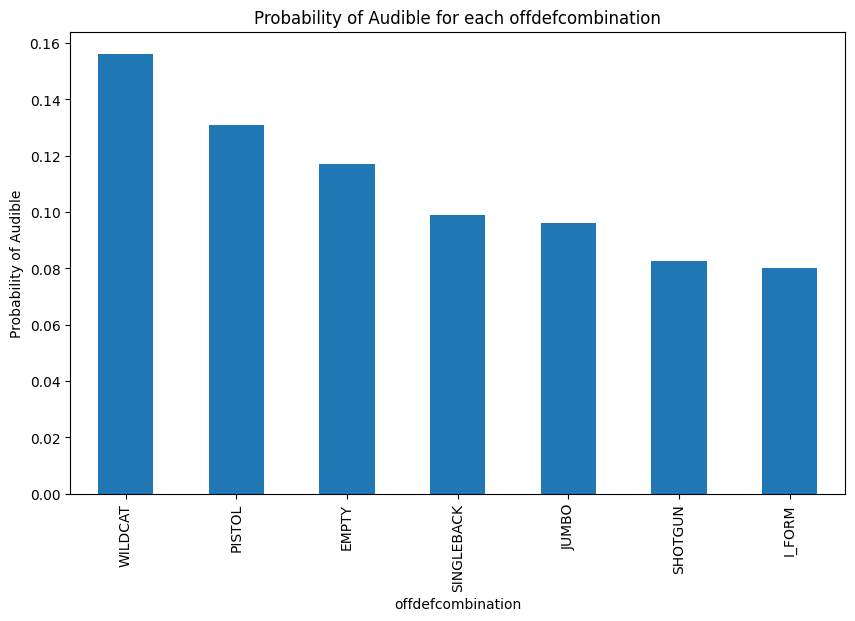

In [289]:

plays_audible_data['deffensiveFomration'] = ''
#append '00'
# plays_audible_data['deffensiveFomration'] = 'XX' + plays_audible_data['deffensiveFomration'] 
plays_audible_data['deffensiveFomrationFull'] = plays_audible_data['N_LOS'].astype(str) + plays_audible_data['N_BOX'].astype(str) + plays_audible_data['N_DEEP'].astype(str)
print(plays_audible_data['deffensiveFomration'].unique())
plays_audible_data['offdefcombination'] = plays_audible_data['offenseFormation'] + plays_audible_data['deffensiveFomration']


#graph offdefcombination vs is audible
plays_audible_data['is_audible'] = plays_audible_data['is_audible'].astype(int)

#calculate probability of audible for each offdefcombination
prob_audible = plays_audible_data.groupby('offdefcombination')
prob_audible = prob_audible['is_audible'].mean()


# Calculate probability of audible for each offdefcombination
prob_audible = plays_audible_data.groupby('offdefcombination')['is_audible'].mean()

# Sort by probability of audible
prob_audible = prob_audible.sort_values(ascending=False)
#print top 10 and botoom 10

#remove combinations with less than .05 probability of audible
#prob_audible = prob_audible[prob_audible > .4]

#graph probability of audible for each offdefcombination
plt.figure(figsize=(10, 6))
prob_audible.plot(kind='bar')
plt.xlabel('offdefcombination')
plt.ylabel('Probability of Audible')
plt.title('Probability of Audible for each offdefcombination')
plt.show()




(16216, 58)
is_audible            0    1
offdefcombination           
SHOTGUN            8097  731
SINGLEBACK         3554  391
EMPTY              1193  158
I_FORM              953   83
PISTOL              558   84
JUMBO               113   12
WILDCAT              81   15


<Figure size 1000x600 with 0 Axes>

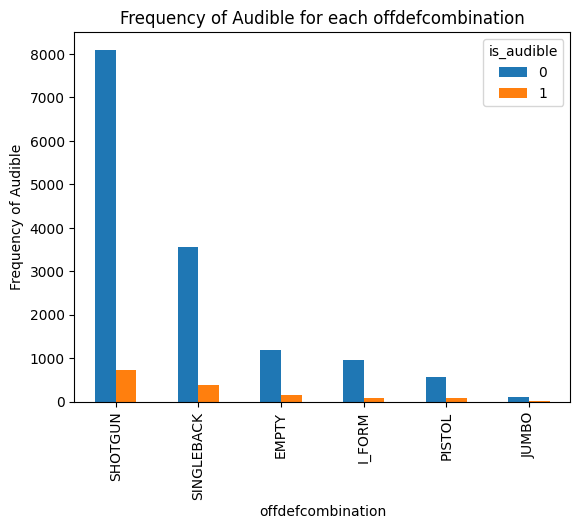

In [290]:
#Frequency of each audibles in each offdefcombination
print(plays_audible_data.shape)
audible_counts = plays_audible_data.groupby('offdefcombination')['is_audible'].value_counts()
audible_counts = audible_counts.unstack()
audible_counts = audible_counts.fillna(0)
audible_counts['total'] = audible_counts.sum(axis=1)
audible_counts = audible_counts.sort_values('total', ascending=False)
audible_counts = audible_counts.drop('total', axis=1)
print(audible_counts.head(10))


#remove combinations with less than 10 plays
audible_counts = audible_counts[audible_counts.sum(axis=1) > 100]

#Histogram of audible counts for each offdefcombination
plt.figure(figsize=(10, 6))
audible_counts.plot(kind='bar')
plt.xlabel('offdefcombination')
plt.ylabel('Frequency of Audible')
plt.title('Frequency of Audible for each offdefcombination')
plt.show()



<Figure size 1000x600 with 0 Axes>

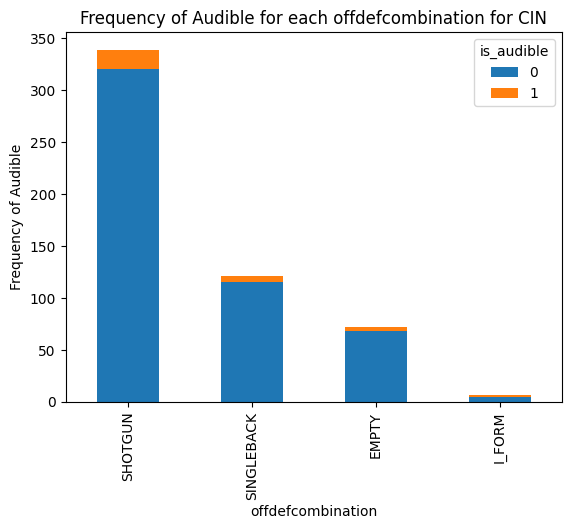

is_audible             0     1
offdefcombination             
SHOTGUN            320.0  19.0
SINGLEBACK         115.0   6.0
EMPTY               68.0   4.0
I_FORM               5.0   1.0


<Figure size 1000x600 with 0 Axes>

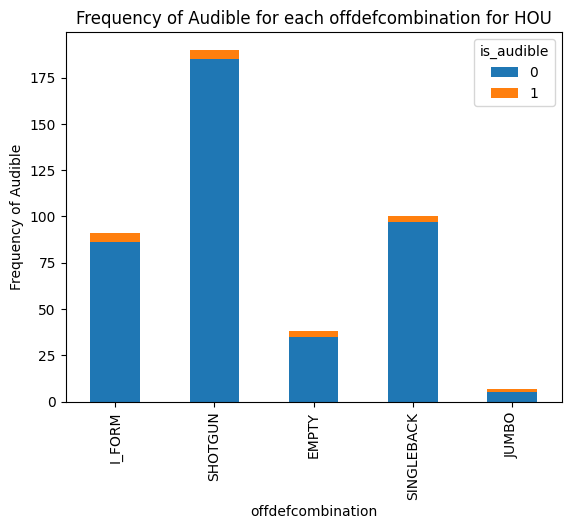

is_audible             0    1
offdefcombination            
I_FORM              86.0  5.0
SHOTGUN            185.0  5.0
EMPTY               35.0  3.0
SINGLEBACK          97.0  3.0
JUMBO                5.0  2.0


<Figure size 1000x600 with 0 Axes>

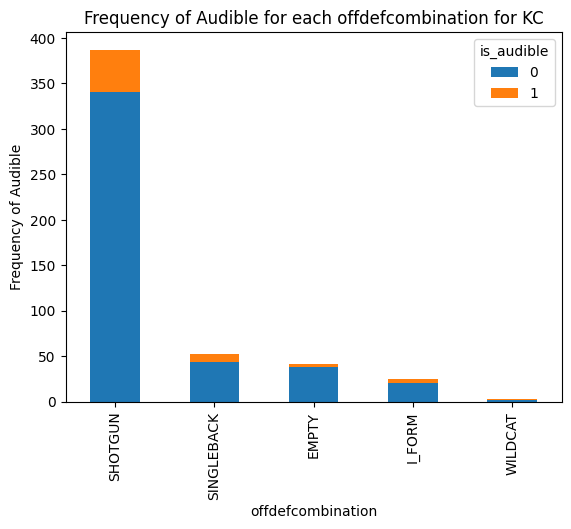

is_audible             0     1
offdefcombination             
SHOTGUN            341.0  46.0
SINGLEBACK          44.0   9.0
EMPTY               38.0   4.0
I_FORM              21.0   4.0
WILDCAT              2.0   1.0


<Figure size 1000x600 with 0 Axes>

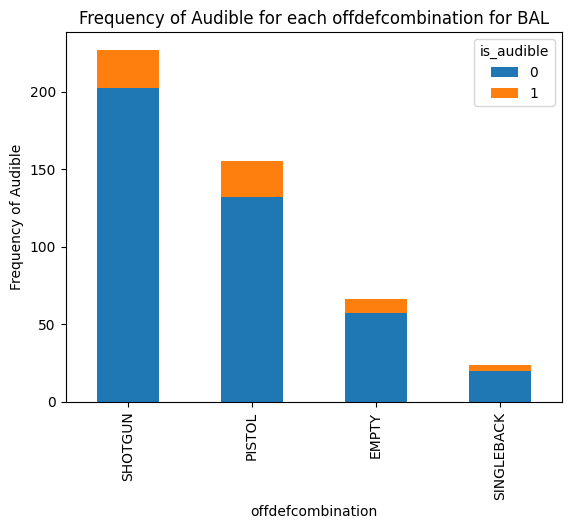

is_audible             0     1
offdefcombination             
SHOTGUN            202.0  25.0
PISTOL             132.0  23.0
EMPTY               57.0   9.0
SINGLEBACK          20.0   4.0


<Figure size 1000x600 with 0 Axes>

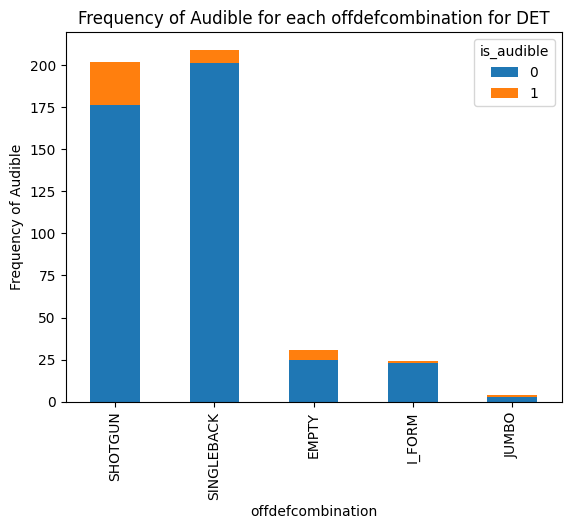

is_audible             0     1
offdefcombination             
SHOTGUN            176.0  26.0
SINGLEBACK         201.0   8.0
EMPTY               25.0   6.0
I_FORM              23.0   1.0
JUMBO                3.0   1.0


<Figure size 1000x600 with 0 Axes>

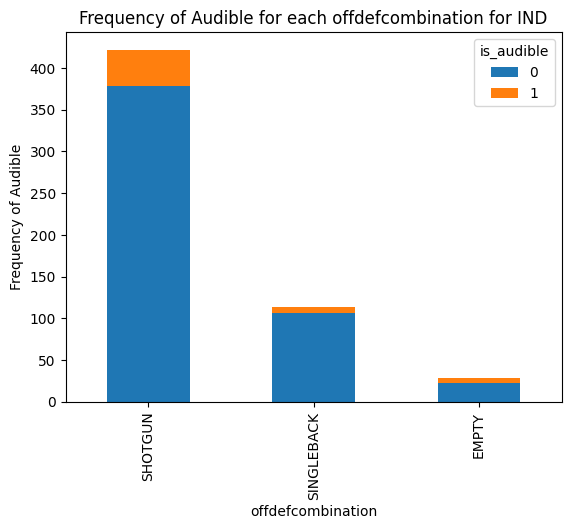

is_audible             0     1
offdefcombination             
SHOTGUN            379.0  43.0
SINGLEBACK         106.0   8.0
EMPTY               23.0   5.0


<Figure size 1000x600 with 0 Axes>

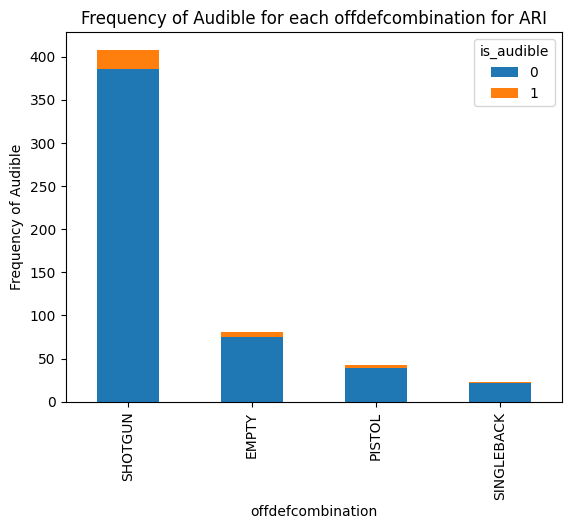

is_audible             0     1
offdefcombination             
SHOTGUN            386.0  22.0
EMPTY               75.0   6.0
PISTOL              39.0   4.0
SINGLEBACK          22.0   1.0


<Figure size 1000x600 with 0 Axes>

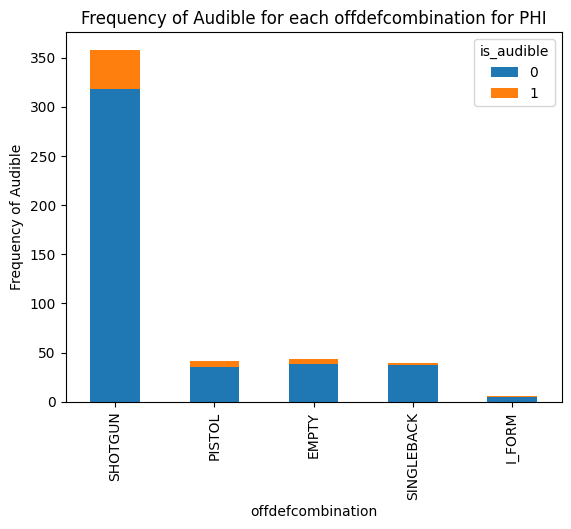

is_audible             0     1
offdefcombination             
SHOTGUN            318.0  40.0
PISTOL              35.0   6.0
EMPTY               38.0   5.0
SINGLEBACK          37.0   2.0
I_FORM               5.0   1.0


<Figure size 1000x600 with 0 Axes>

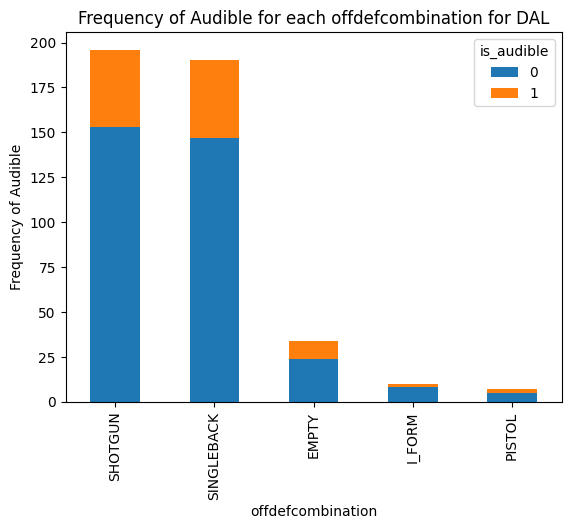

is_audible             0     1
offdefcombination             
SHOTGUN            153.0  43.0
SINGLEBACK         147.0  43.0
EMPTY               24.0  10.0
I_FORM               8.0   2.0
PISTOL               5.0   2.0


<Figure size 1000x600 with 0 Axes>

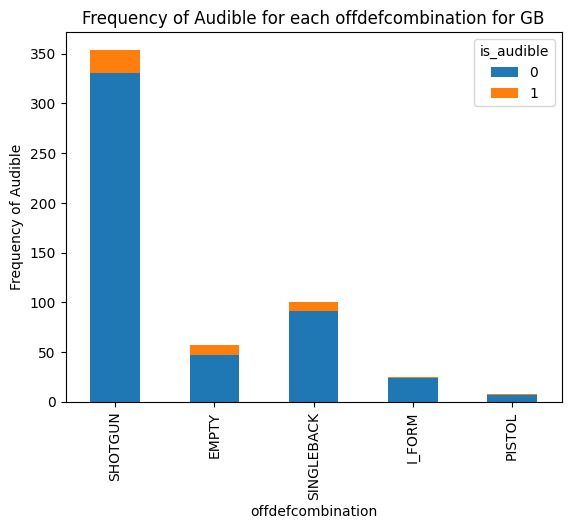

is_audible           0   1
offdefcombination         
SHOTGUN            331  23
EMPTY               47  10
SINGLEBACK          91   9
I_FORM              24   1
PISTOL               7   1


<Figure size 1000x600 with 0 Axes>

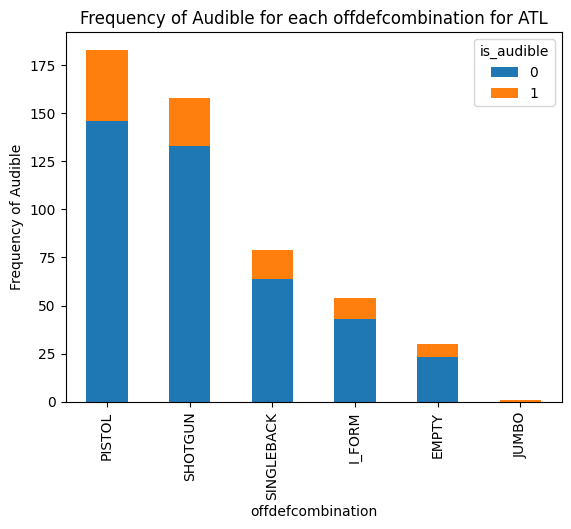

is_audible             0     1
offdefcombination             
PISTOL             146.0  37.0
SHOTGUN            133.0  25.0
SINGLEBACK          64.0  15.0
I_FORM              43.0  11.0
EMPTY               23.0   7.0
JUMBO                0.0   1.0


<Figure size 1000x600 with 0 Axes>

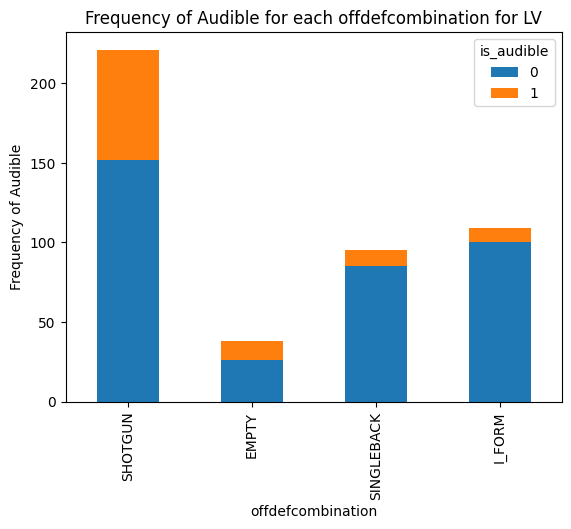

is_audible             0     1
offdefcombination             
SHOTGUN            152.0  69.0
EMPTY               26.0  12.0
SINGLEBACK          85.0  10.0
I_FORM             100.0   9.0


<Figure size 1000x600 with 0 Axes>

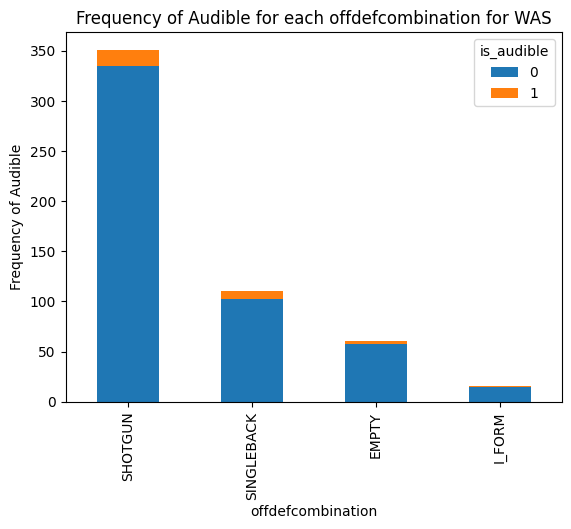

is_audible             0     1
offdefcombination             
SHOTGUN            335.0  16.0
SINGLEBACK         102.0   8.0
EMPTY               58.0   3.0
I_FORM              15.0   1.0


<Figure size 1000x600 with 0 Axes>

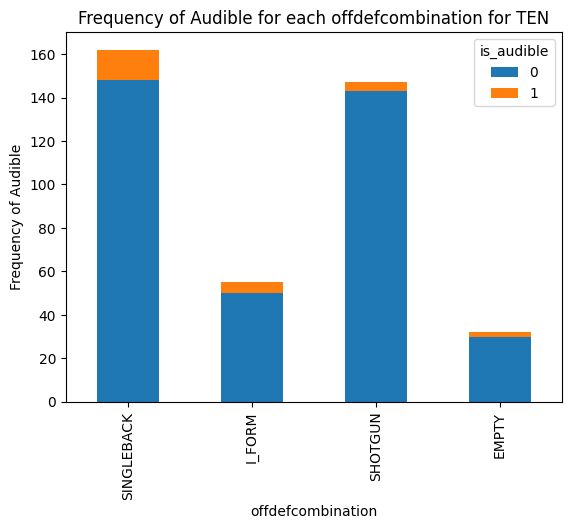

is_audible             0     1
offdefcombination             
SINGLEBACK         148.0  14.0
I_FORM              50.0   5.0
SHOTGUN            143.0   4.0
EMPTY               30.0   2.0


<Figure size 1000x600 with 0 Axes>

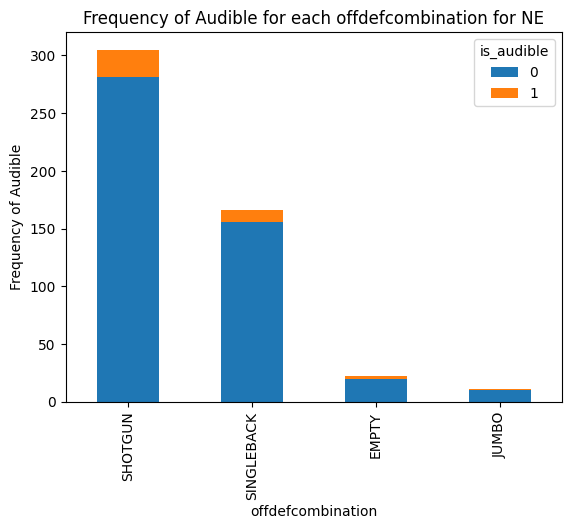

is_audible             0     1
offdefcombination             
SHOTGUN            281.0  24.0
SINGLEBACK         156.0  10.0
EMPTY               20.0   2.0
JUMBO               10.0   1.0


<Figure size 1000x600 with 0 Axes>

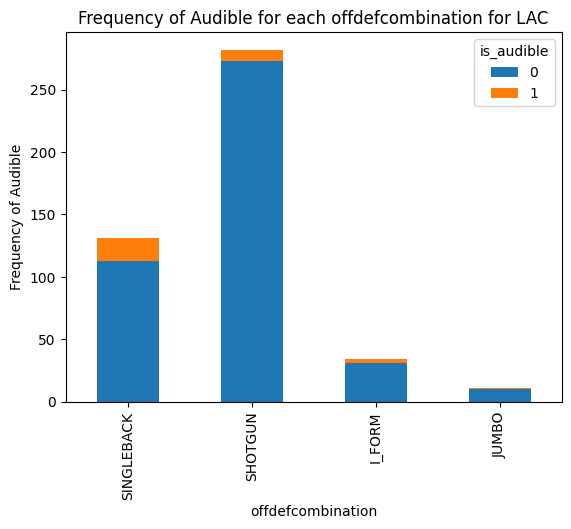

is_audible             0     1
offdefcombination             
SINGLEBACK         113.0  18.0
SHOTGUN            273.0   9.0
I_FORM              31.0   3.0
JUMBO               10.0   1.0


<Figure size 1000x600 with 0 Axes>

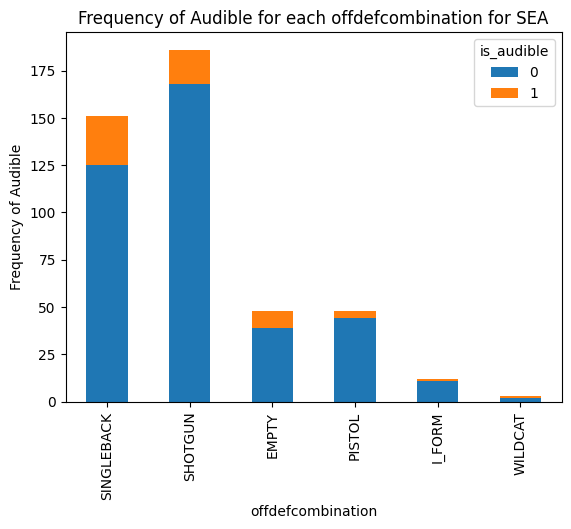

is_audible             0     1
offdefcombination             
SINGLEBACK         125.0  26.0
SHOTGUN            168.0  18.0
EMPTY               39.0   9.0
PISTOL              44.0   4.0
I_FORM              11.0   1.0
WILDCAT              2.0   1.0


<Figure size 1000x600 with 0 Axes>

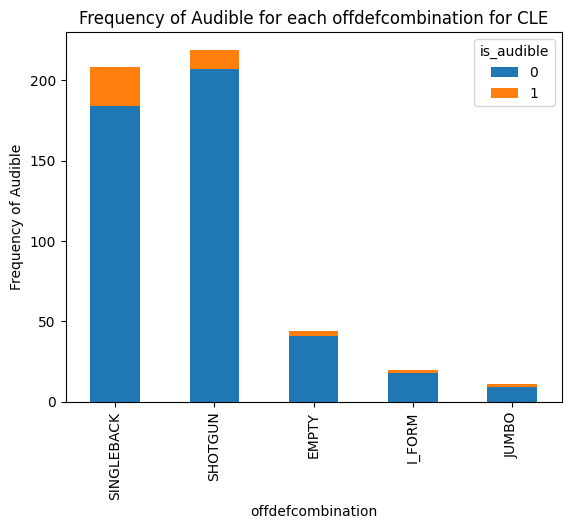

is_audible             0     1
offdefcombination             
SINGLEBACK         184.0  24.0
SHOTGUN            207.0  12.0
EMPTY               41.0   3.0
I_FORM              18.0   2.0
JUMBO                9.0   2.0


<Figure size 1000x600 with 0 Axes>

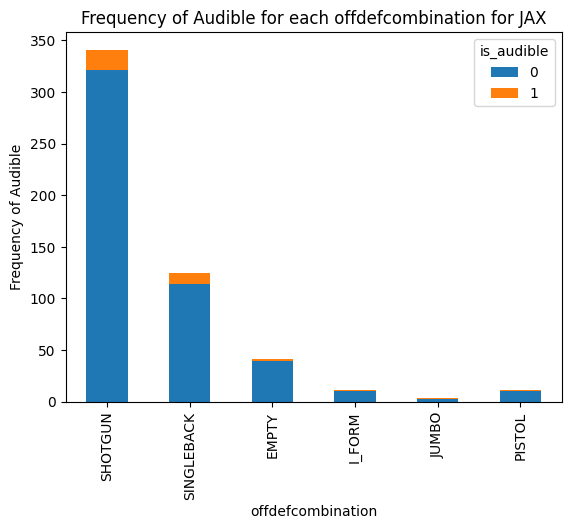

is_audible             0     1
offdefcombination             
SHOTGUN            321.0  20.0
SINGLEBACK         114.0  11.0
EMPTY               39.0   2.0
I_FORM              10.0   1.0
JUMBO                3.0   1.0
PISTOL              10.0   1.0


<Figure size 1000x600 with 0 Axes>

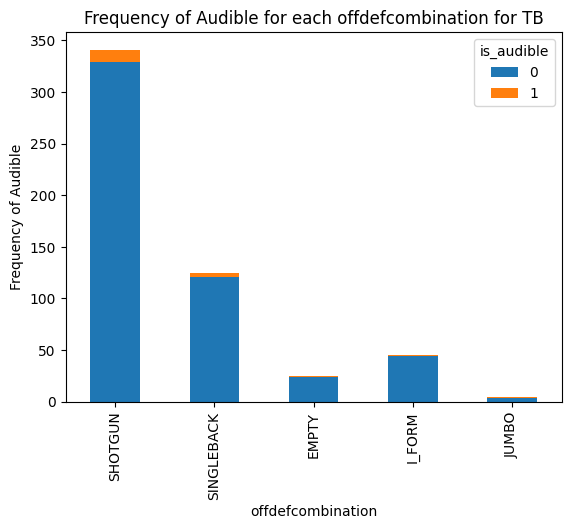

is_audible             0     1
offdefcombination             
SHOTGUN            329.0  12.0
SINGLEBACK         121.0   4.0
EMPTY               24.0   1.0
I_FORM              44.0   1.0
JUMBO                4.0   1.0


<Figure size 1000x600 with 0 Axes>

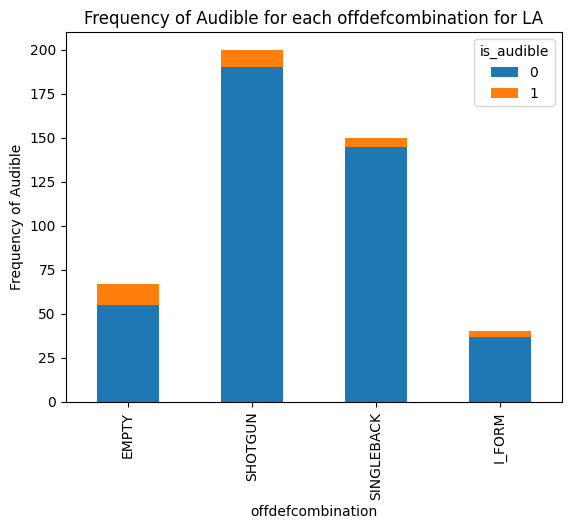

is_audible             0     1
offdefcombination             
EMPTY               55.0  12.0
SHOTGUN            190.0  10.0
SINGLEBACK         145.0   5.0
I_FORM              37.0   3.0


<Figure size 1000x600 with 0 Axes>

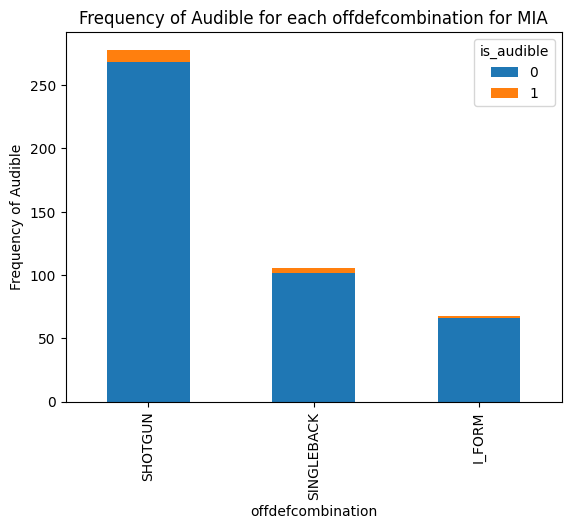

is_audible             0     1
offdefcombination             
SHOTGUN            268.0  10.0
SINGLEBACK         102.0   4.0
I_FORM              66.0   2.0


<Figure size 1000x600 with 0 Axes>

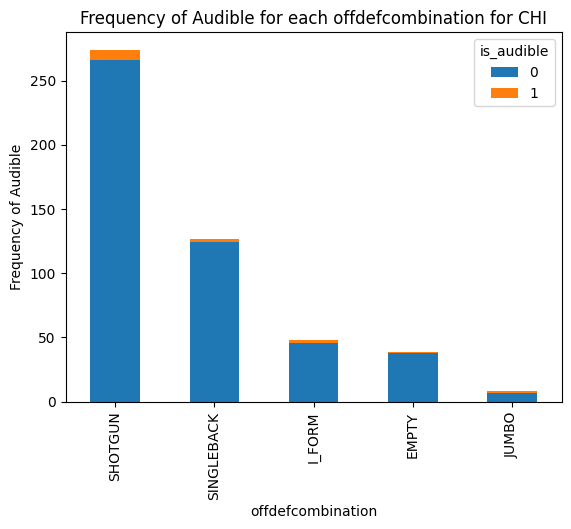

is_audible             0    1
offdefcombination            
SHOTGUN            266.0  8.0
SINGLEBACK         124.0  3.0
I_FORM              46.0  2.0
EMPTY               38.0  1.0
JUMBO                7.0  1.0


<Figure size 1000x600 with 0 Axes>

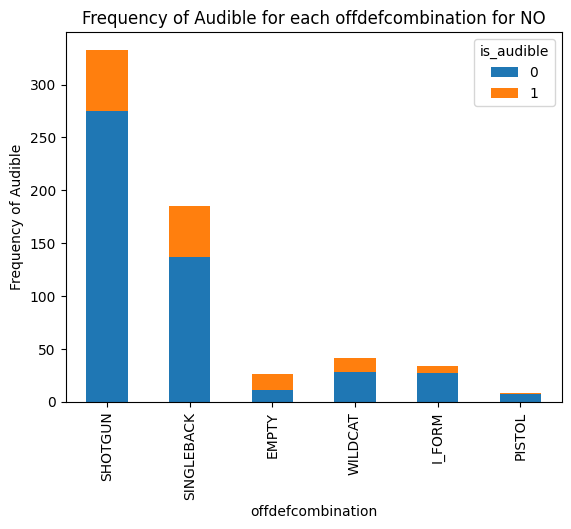

is_audible             0     1
offdefcombination             
SHOTGUN            275.0  58.0
SINGLEBACK         137.0  48.0
EMPTY               11.0  15.0
WILDCAT             28.0  13.0
I_FORM              27.0   7.0
PISTOL               7.0   1.0


<Figure size 1000x600 with 0 Axes>

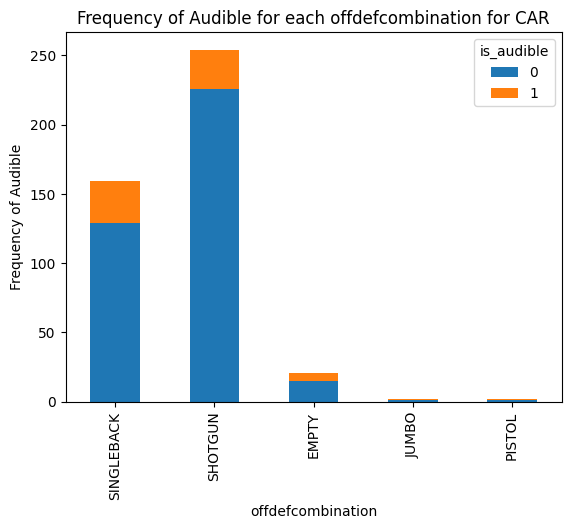

is_audible             0     1
offdefcombination             
SINGLEBACK         129.0  30.0
SHOTGUN            226.0  28.0
EMPTY               15.0   6.0
JUMBO                1.0   1.0
PISTOL               1.0   1.0


<Figure size 1000x600 with 0 Axes>

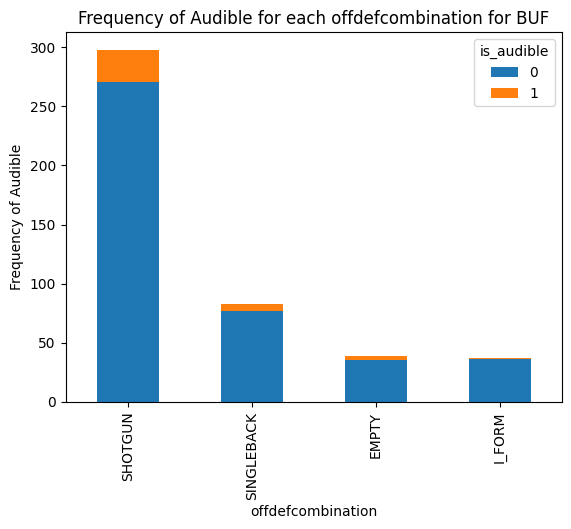

is_audible             0     1
offdefcombination             
SHOTGUN            271.0  27.0
SINGLEBACK          77.0   6.0
EMPTY               35.0   4.0
I_FORM              36.0   1.0


<Figure size 1000x600 with 0 Axes>

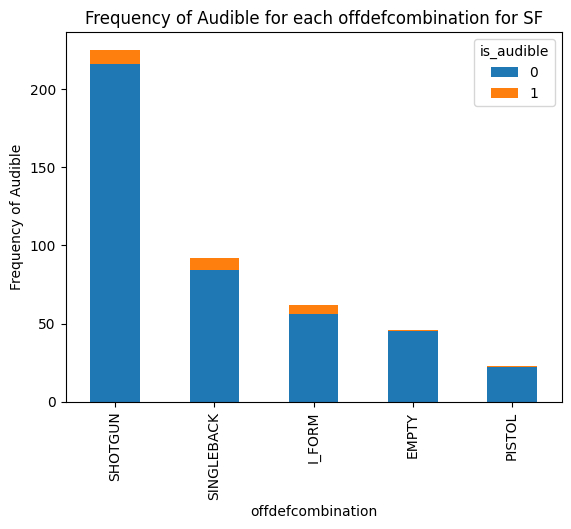

is_audible             0    1
offdefcombination            
SHOTGUN            216.0  9.0
SINGLEBACK          84.0  8.0
I_FORM              56.0  6.0
EMPTY               45.0  1.0
PISTOL              22.0  1.0


<Figure size 1000x600 with 0 Axes>

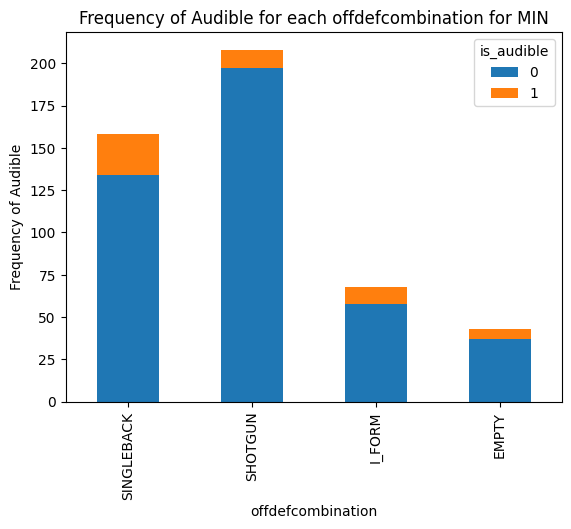

is_audible             0     1
offdefcombination             
SINGLEBACK         134.0  24.0
SHOTGUN            197.0  11.0
I_FORM              58.0  10.0
EMPTY               37.0   6.0


<Figure size 1000x600 with 0 Axes>

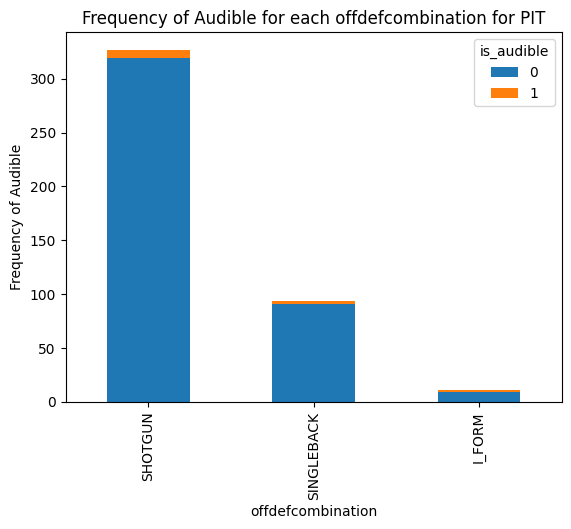

is_audible             0    1
offdefcombination            
SHOTGUN            319.0  8.0
SINGLEBACK          91.0  3.0
I_FORM               9.0  2.0


<Figure size 1000x600 with 0 Axes>

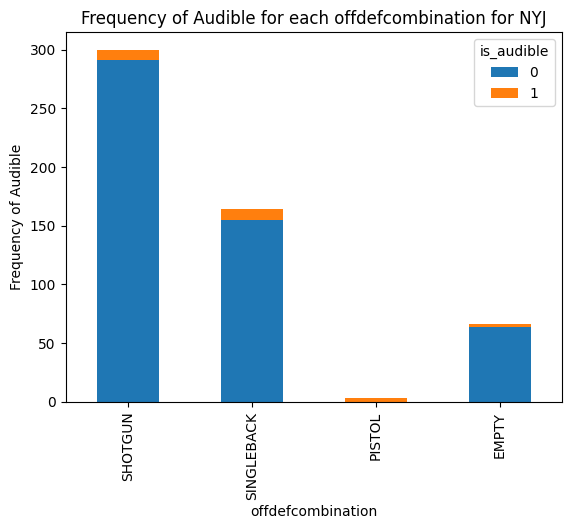

is_audible             0    1
offdefcombination            
SHOTGUN            291.0  9.0
SINGLEBACK         155.0  9.0
PISTOL               0.0  3.0
EMPTY               64.0  2.0


<Figure size 1000x600 with 0 Axes>

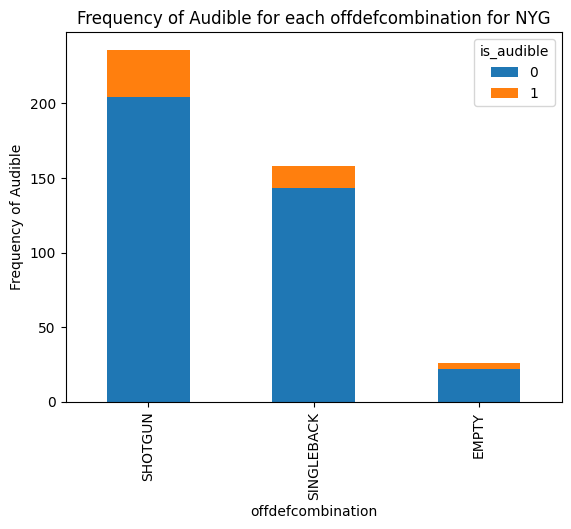

is_audible             0     1
offdefcombination             
SHOTGUN            204.0  32.0
SINGLEBACK         143.0  15.0
EMPTY               22.0   4.0


<Figure size 1000x600 with 0 Axes>

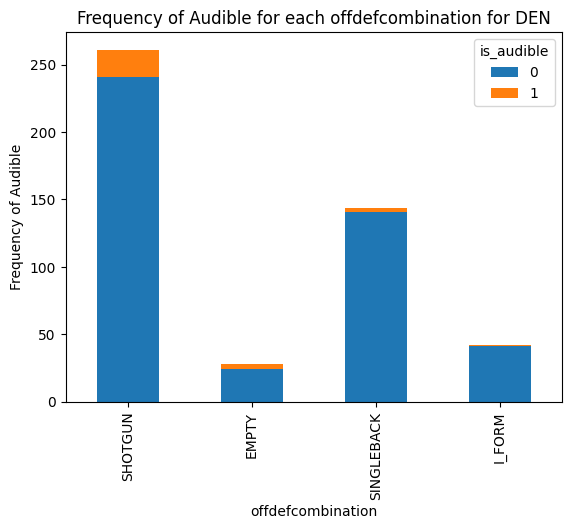

is_audible             0     1
offdefcombination             
SHOTGUN            241.0  20.0
EMPTY               24.0   4.0
SINGLEBACK         141.0   3.0
I_FORM              41.0   1.0


In [291]:
#graph each teams frequencys separately
for team in plays_audible_data['possessionTeam'].unique(): 
    team_data = plays_audible_data[plays_audible_data['possessionTeam'] == team]
    audible_counts = team_data.groupby('offdefcombination')['is_audible'].value_counts()
    audible_counts = audible_counts.unstack()
    audible_counts = audible_counts.fillna(0)
    audible_counts['total'] = audible_counts[1]
    audible_counts = audible_counts.sort_values('total', ascending=False)
    audible_counts = audible_counts.drop('total', axis=1)
    audible_counts = audible_counts[audible_counts[1] > 0]
    plt.figure(figsize=(10, 6))
    audible_counts.plot(kind='bar', stacked=True)
    plt.xlabel('offdefcombination')
    plt.ylabel('Frequency of Audible')
    plt.title('Frequency of Audible for each offdefcombination for ' + team)
    plt.show()
    print(audible_counts.head(10))

<Figure size 1000x600 with 0 Axes>

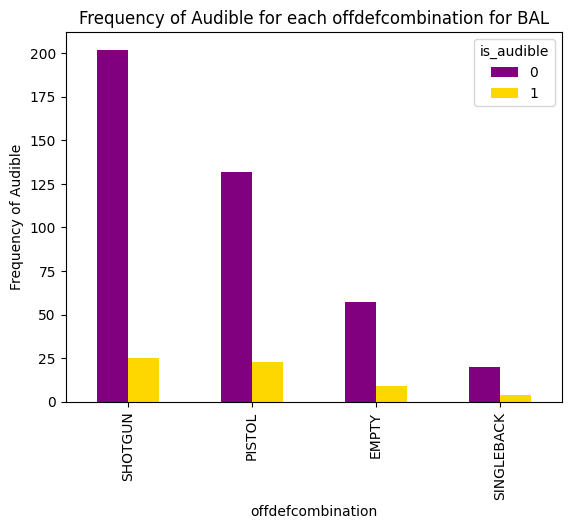

is_audible             0     1
offdefcombination             
SHOTGUN            202.0  25.0
PISTOL             132.0  23.0
EMPTY               57.0   9.0
SINGLEBACK          20.0   4.0


In [292]:
#graph each teams frequencys separately

team_data = plays_audible_data[plays_audible_data['possessionTeam'] == 'BAL']
audible_counts = team_data.groupby('offdefcombination')['is_audible'].value_counts()
audible_counts = audible_counts.unstack()
audible_counts = audible_counts.fillna(0)
audible_counts['total'] = audible_counts[1]
audible_counts = audible_counts.sort_values('total', ascending=False)
audible_counts = audible_counts.drop('total', axis=1)
audible_counts = audible_counts[audible_counts[1] > 0]

#overlap bars


plt.figure(figsize=(10, 6))
audible_counts.plot(kind='bar', color = ['purple', 'gold'])
plt.xlabel('offdefcombination')
plt.ylabel('Frequency of Audible')
plt.title('Frequency of Audible for each offdefcombination for ' + 'BAL')
plt.show()
print(audible_counts.head(10))

#save data to csv
audible_counts.to_csv('ravens_audible_freq.csv')

offdefcombination
EMPTY         6.012658
SHOTGUN       5.913817
SINGLEBACK    5.317136
PISTOL        5.250000
I_FORM        5.024096
WILDCAT       4.333333
JUMBO         2.750000
Name: yardsGained, dtype: float64
offdefcombination
EMPTY         6.012658
SHOTGUN       5.913817
SINGLEBACK    5.317136
PISTOL        5.250000
I_FORM        5.024096
WILDCAT       4.333333
JUMBO         2.750000
Name: yardsGained, dtype: float64


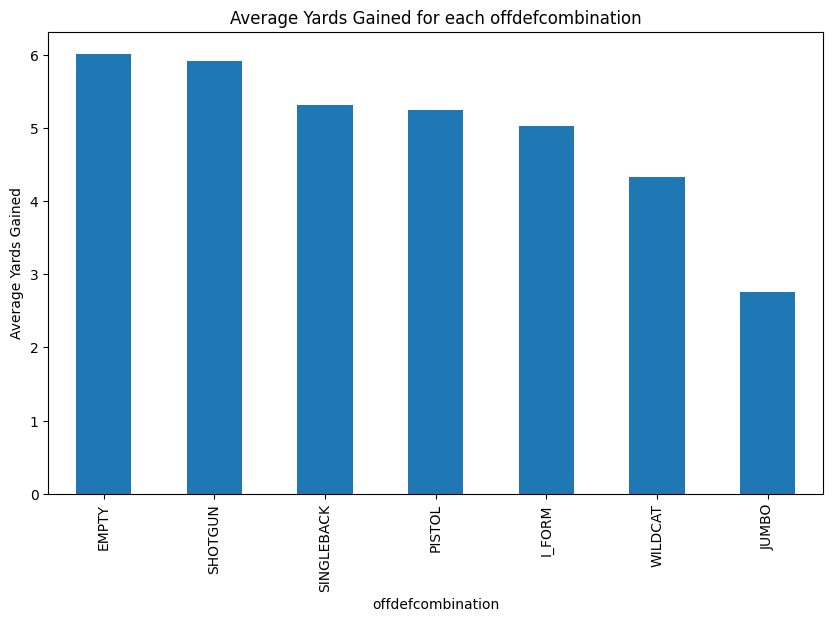

In [293]:
 #graph average yards gained for each offdefcombination when audible is called
avg_yards = plays_audible_data[plays_audible_data['is_audible'] == 1].groupby('offdefcombination')['yardsGained'].mean()


# Sort by average yards gained
avg_yards = avg_yards.sort_values(ascending=False)

# Print top 10 and bottom 10
print(avg_yards.head(10))
print(avg_yards.tail(10))

# Graph average yards gained for each offdefcombination
plt.figure(figsize=(10, 6))
avg_yards.plot(kind='bar')
plt.xlabel('offdefcombination')
plt.ylabel('Average Yards Gained')
plt.title('Average Yards Gained for each offdefcombination')
plt.show()

offdefcombination
EMPTY         5.759430
SHOTGUN       5.731876
WILDCAT       5.432099
SINGLEBACK    5.367755
PISTOL        5.014337
I_FORM        4.989507
JUMBO         2.283186
Name: yardsGained, dtype: float64
offdefcombination
EMPTY         5.759430
SHOTGUN       5.731876
WILDCAT       5.432099
SINGLEBACK    5.367755
PISTOL        5.014337
I_FORM        4.989507
JUMBO         2.283186
Name: yardsGained, dtype: float64
offdefcombination
EMPTY         6.012658
SHOTGUN       5.913817
SINGLEBACK    5.317136
PISTOL        5.250000
I_FORM        5.024096
WILDCAT       4.333333
JUMBO         2.750000
Name: yardsGained, dtype: float64


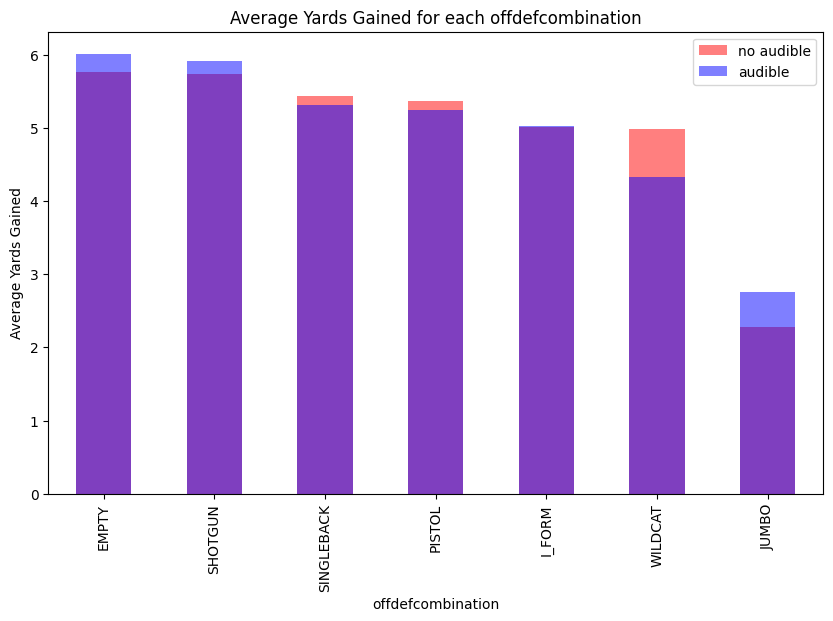

In [294]:
#Average yards gained for each offdefcombination when audible is not called vs when it is called
avg_yards = plays_audible_data[plays_audible_data['is_audible'] == 0].groupby('offdefcombination')['yardsGained'].mean()
avg_yards_audible = plays_audible_data[plays_audible_data['is_audible'] == 1].groupby('offdefcombination')['yardsGained'].mean()

# Sort by average yards gained
avg_yards = avg_yards.sort_values(ascending=False)
avg_yards_audible = avg_yards_audible.sort_values(ascending=False)

# Print top 10 and bottom 10
print(avg_yards.head(10))
print(avg_yards.tail(10))
print(avg_yards_audible.head(10))




# Graph average yards gained for each offdefcombination
plt.figure(figsize=(10, 6))
avg_yards.plot(kind='bar', alpha=0.5, label='no audible', color='red')
avg_yards_audible.plot(kind='bar', alpha=0.5, label='audible', color='blue')
plt.xlabel('offdefcombination')
plt.ylabel('Average Yards Gained')
plt.title('Average Yards Gained for each offdefcombination')
plt.legend(loc='upper right')
plt.show()


offdefcombination
JUMBO         0.466814
EMPTY         0.253228
PISTOL        0.235663
SHOTGUN       0.181941
I_FORM        0.034590
SINGLEBACK   -0.050619
WILDCAT      -1.098765
Name: yardsGained, dtype: float64
offdefcombination
JUMBO         0.466814
EMPTY         0.253228
PISTOL        0.235663
SHOTGUN       0.181941
I_FORM        0.034590
SINGLEBACK   -0.050619
WILDCAT      -1.098765
Name: yardsGained, dtype: float64


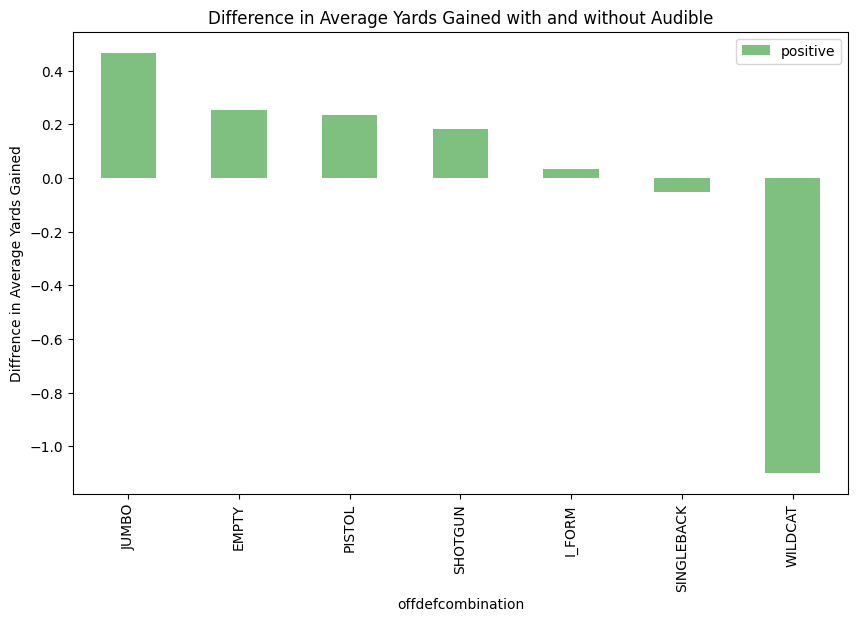

In [295]:


#Only graph the 10 highest and lowerst differences between average yards gained when audible is called vs when it is not called
avg_yards_diff = avg_yards_audible - avg_yards
avg_yards_diff = avg_yards_diff.sort_values(ascending=False)

#remove nan values
avg_yards_diff = avg_yards_diff.dropna()

top_yards_diff = avg_yards_diff.head(10)
low_yards_diff = avg_yards_diff.tail(10)

# Print top 10 and bottom 10
print(top_yards_diff)
print(low_yards_diff)




# Graph average yards gained for each offdefcombination
plt.figure(figsize=(10, 6))
top_yards_diff.plot(kind='bar', alpha=0.5, label='positive', color='green')
#low_yards_diff.plot(kind='bar', alpha=0.5, label='negative', color='red')
plt.xlabel('offdefcombination')
plt.ylabel('Diffrence in Average Yards Gained')
plt.title('Difference in Average Yards Gained with and without Audible')
plt.legend(loc='upper right')
plt.show()


Top 10 average yards gained when audible is called:
offdefcombination  possessionTeam
I_FORM             DEN               25.000000
EMPTY              DEN               17.500000
WILDCAT            SEA               17.000000
I_FORM             PHI               16.000000
EMPTY              CIN               15.750000
JUMBO              JAX               15.000000
PISTOL             DAL               14.500000
SHOTGUN            SF                13.222222
PISTOL             JAX               13.000000
EMPTY              CLE               12.000000
Name: yardsGained, dtype: float64

Bottom 10 average yards gained when audible is called:
offdefcombination  possessionTeam
I_FORM             CIN               0.000000
                   CHI              -0.500000
EMPTY              ATL              -0.571429
I_FORM             JAX              -1.000000
JUMBO              NE               -1.000000
SINGLEBACK         PIT              -1.666667
EMPTY              TB               -2.00000

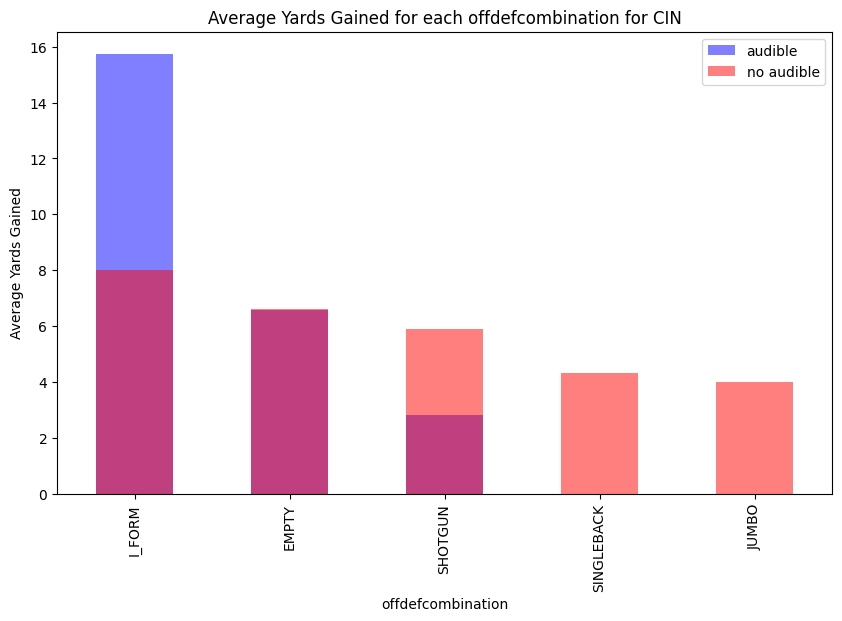

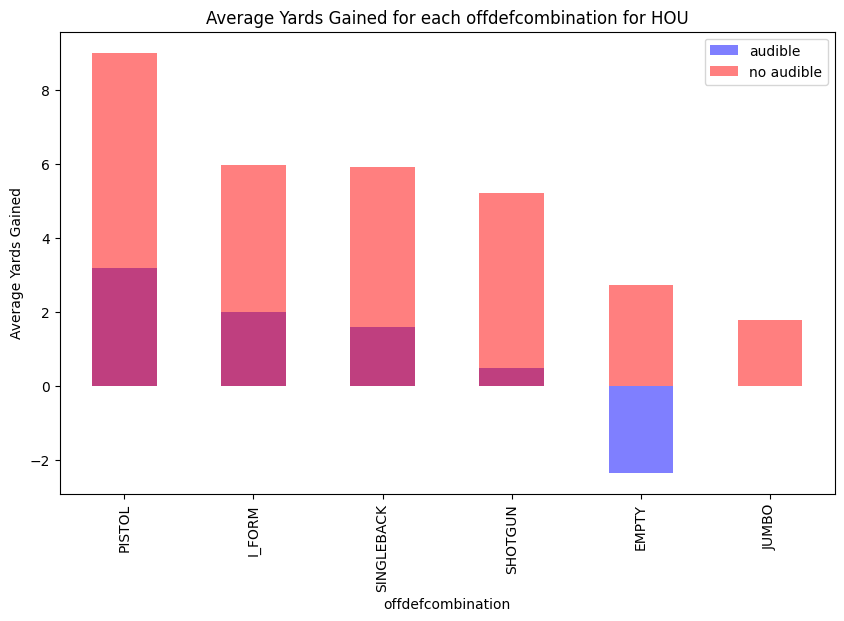

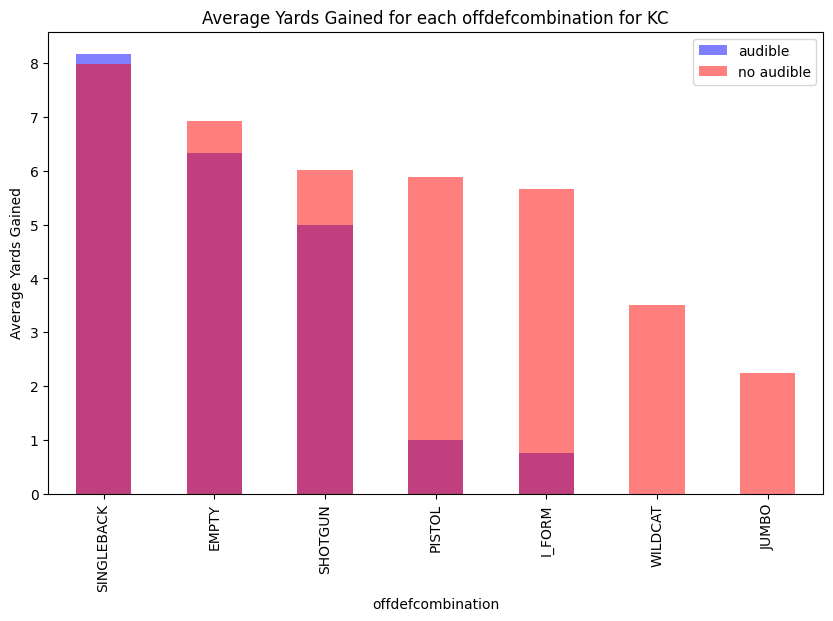

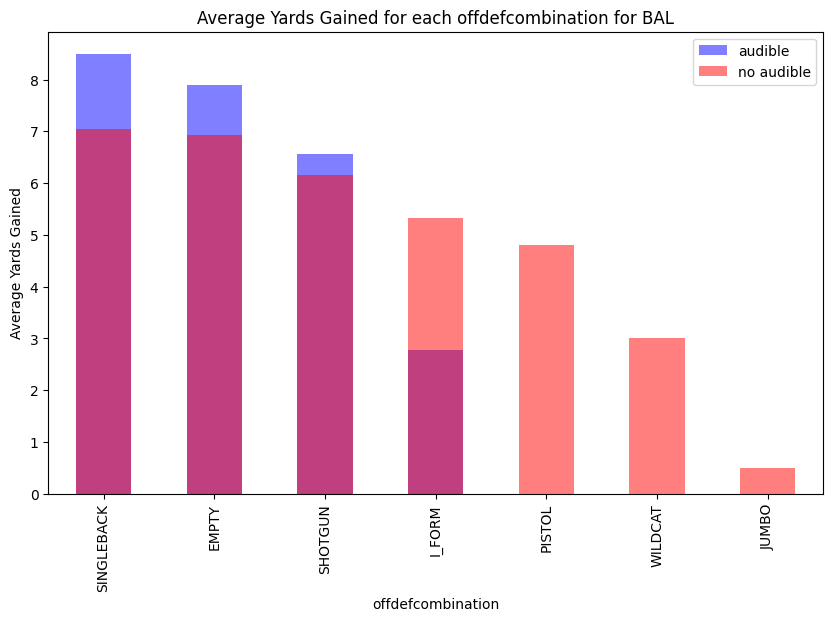

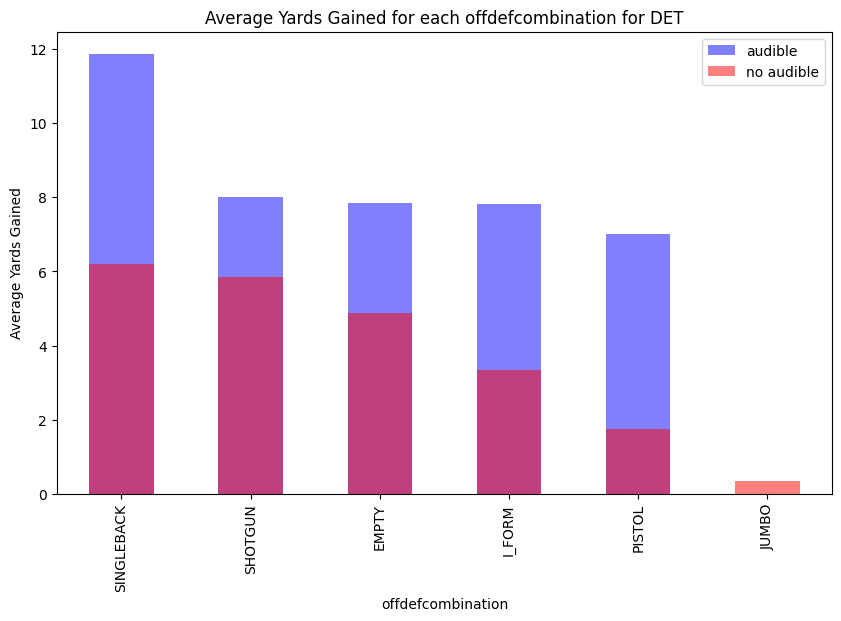

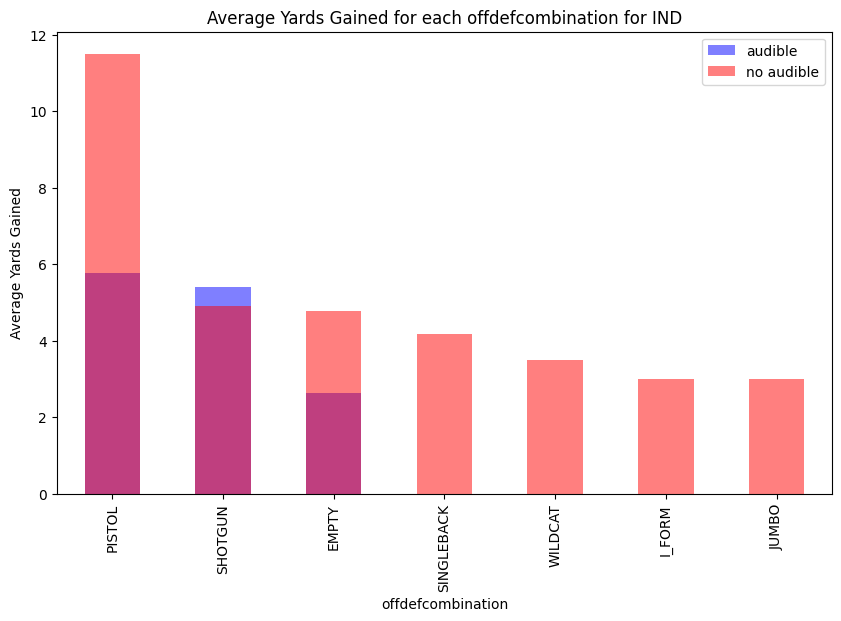

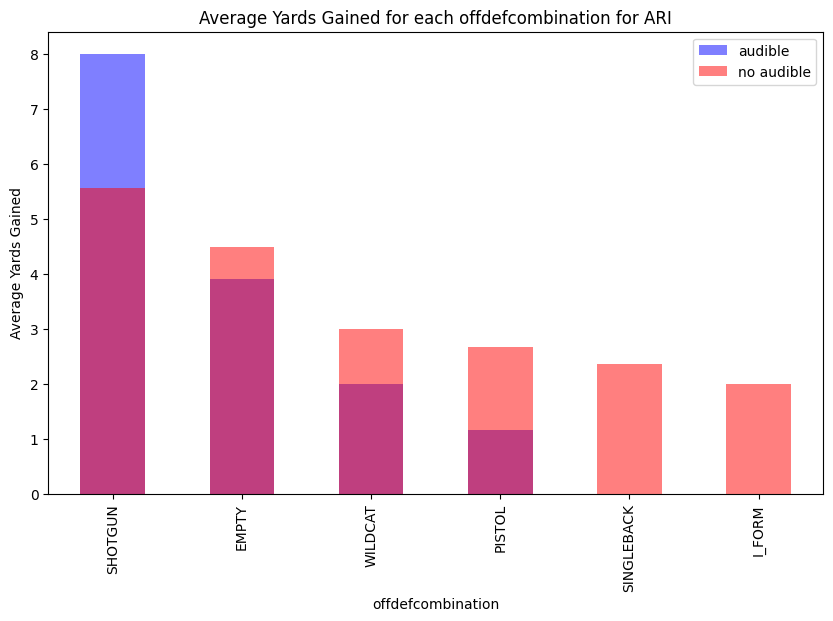

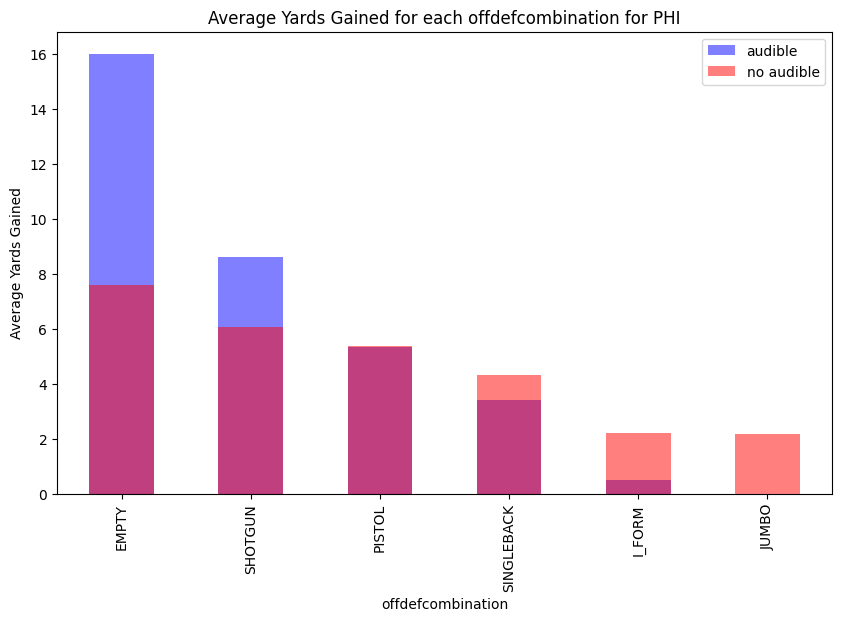

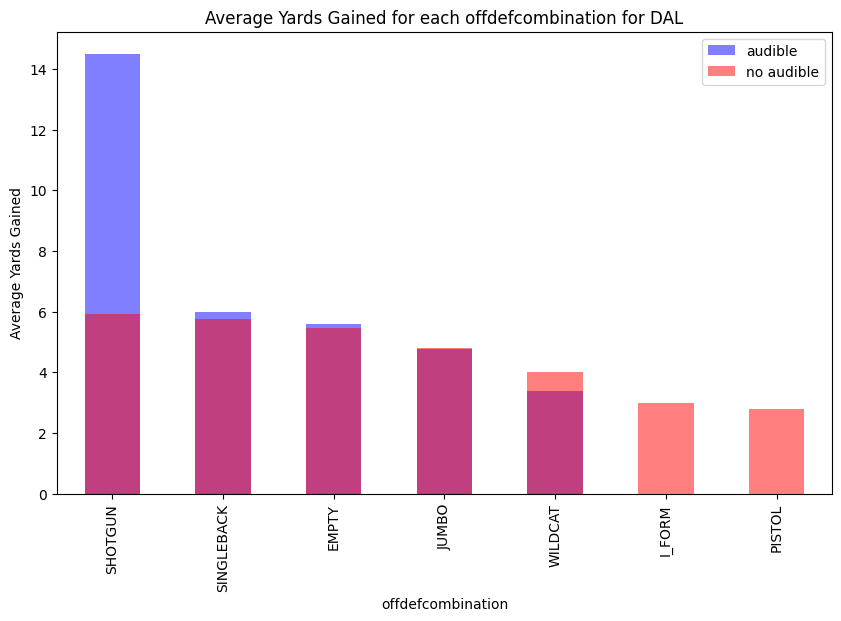

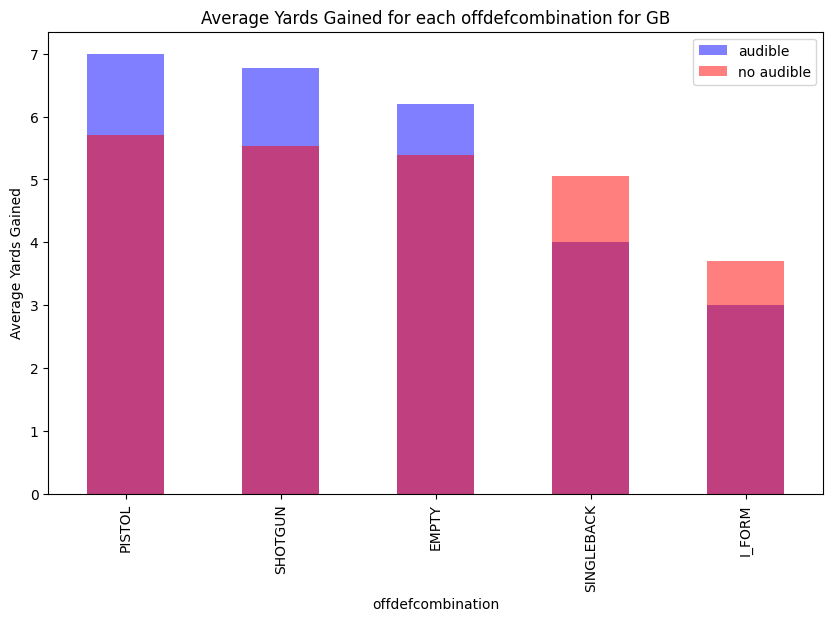

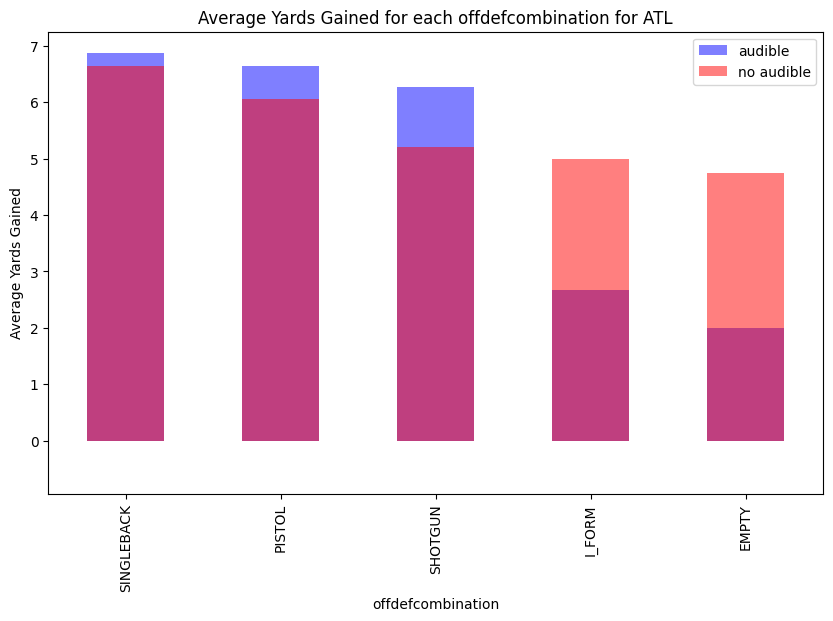

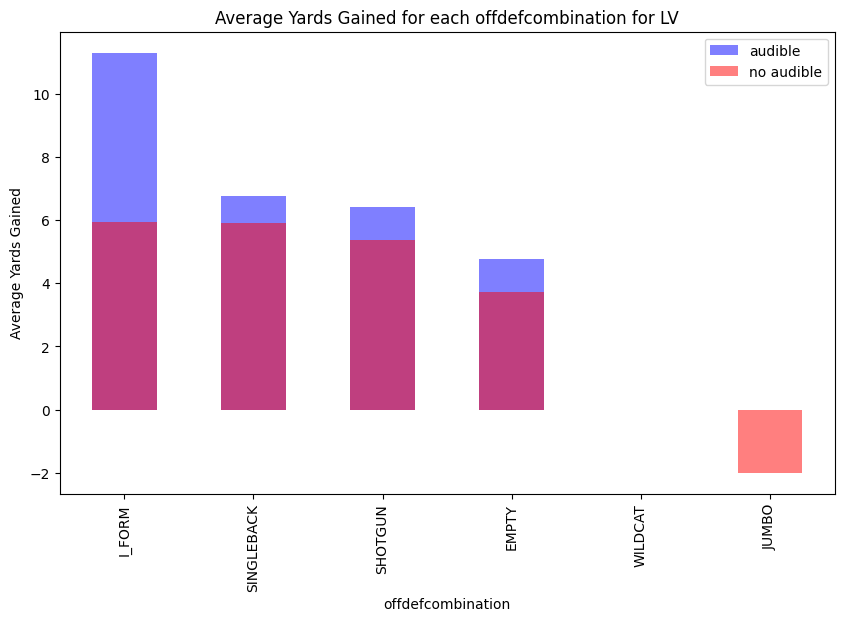

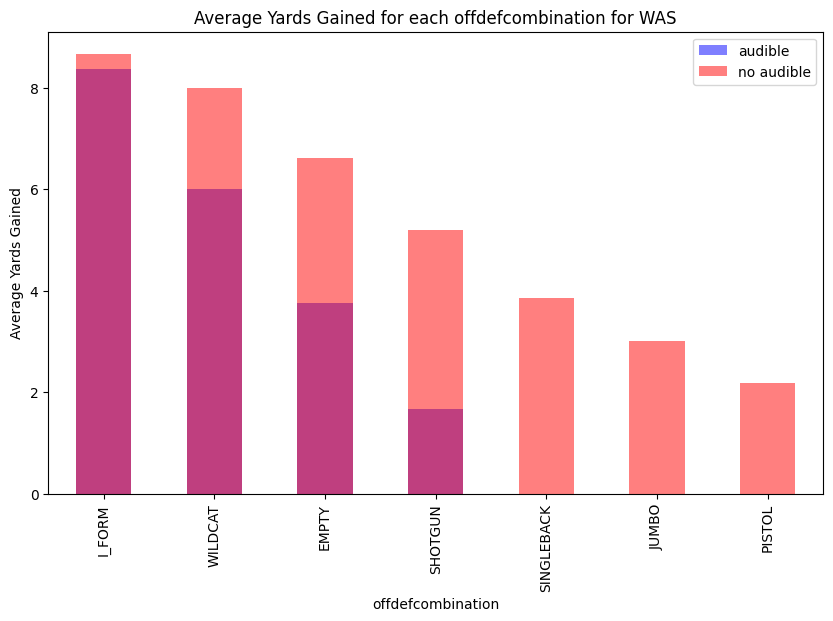

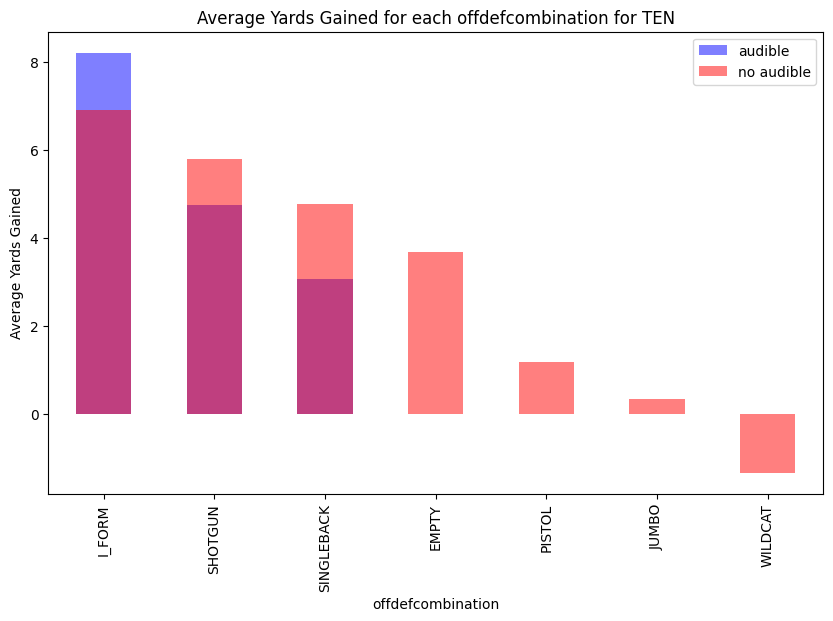

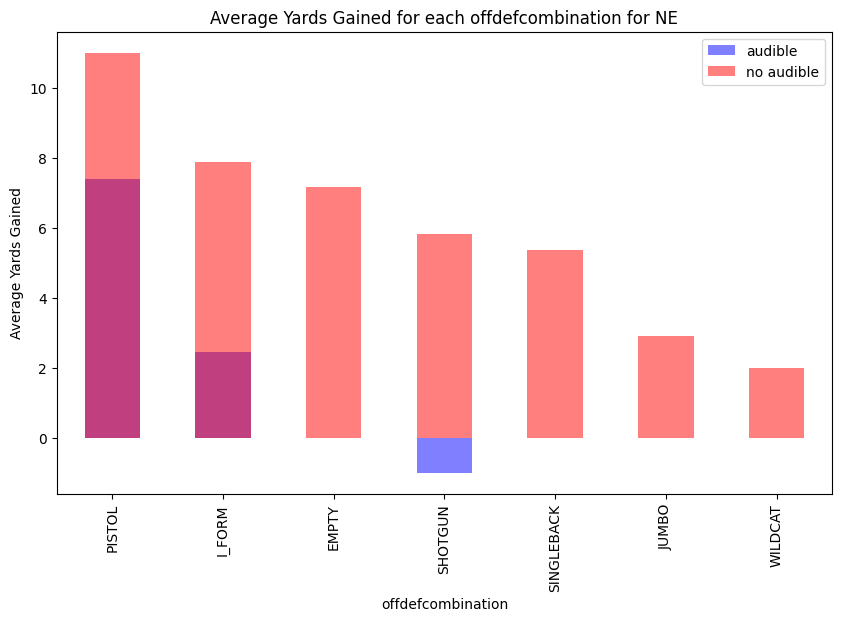

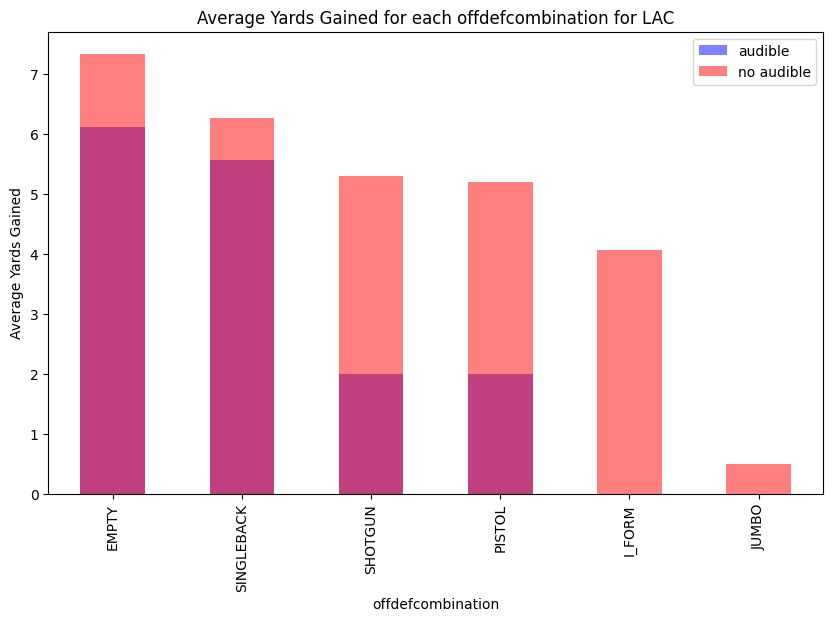

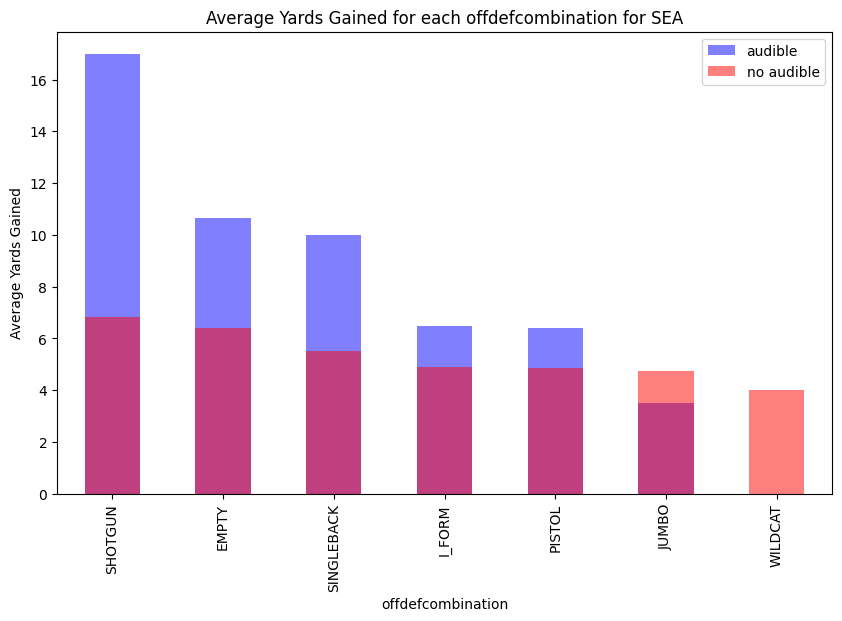

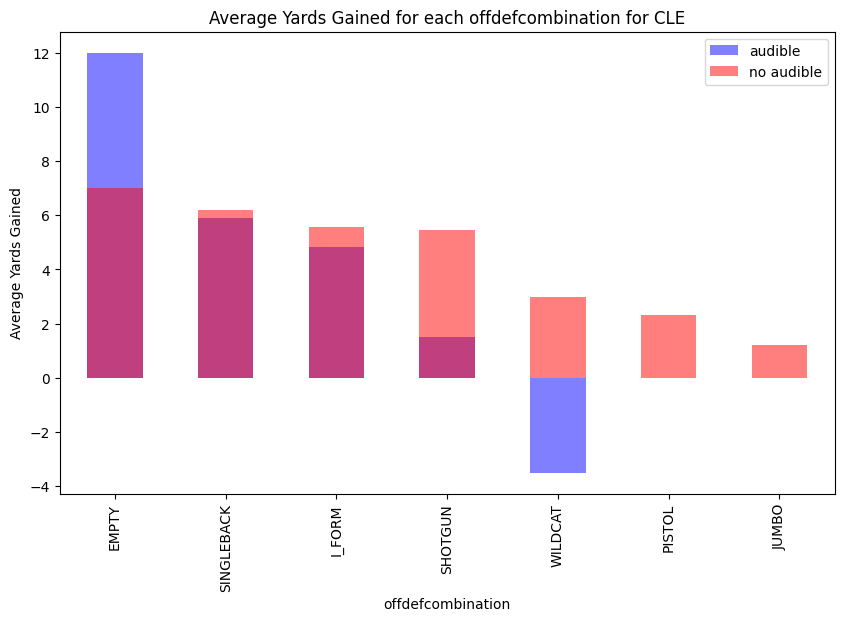

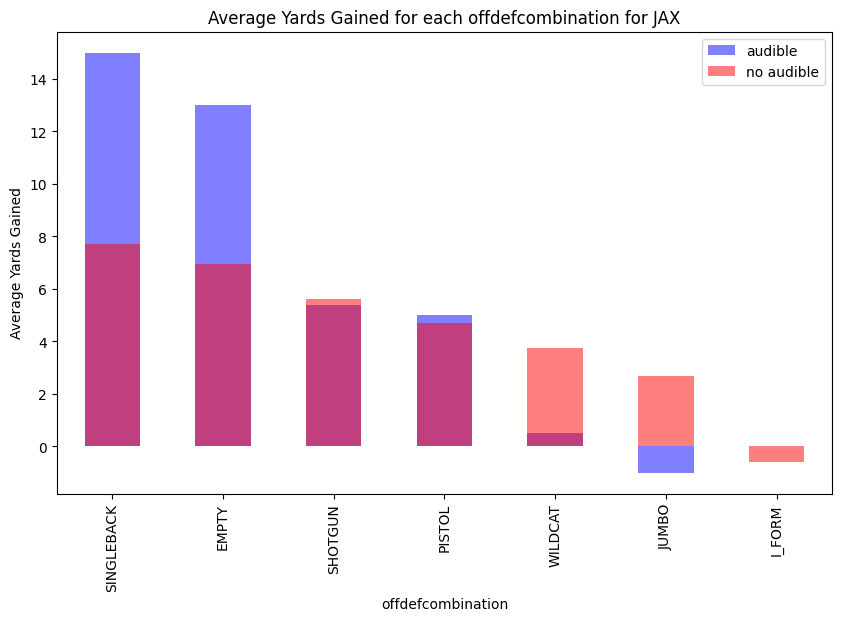

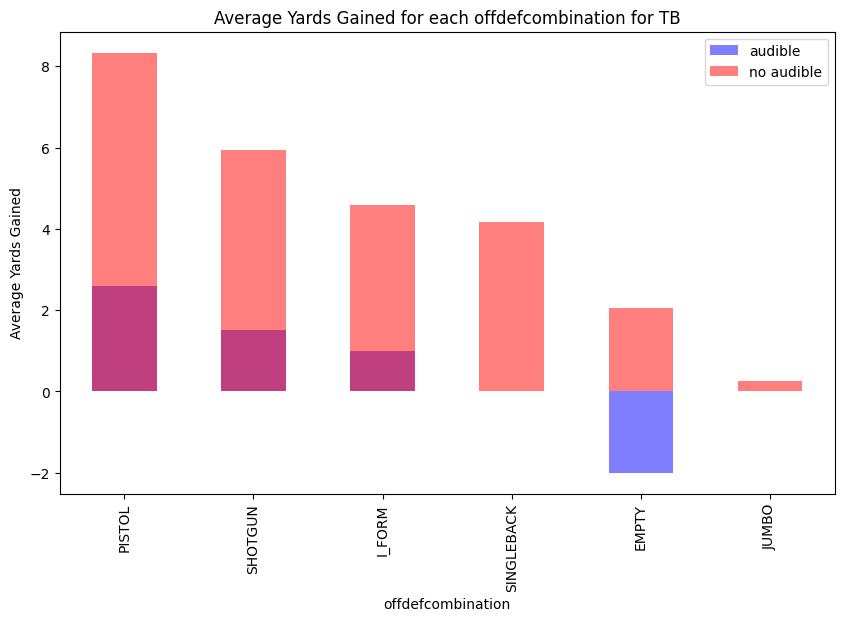

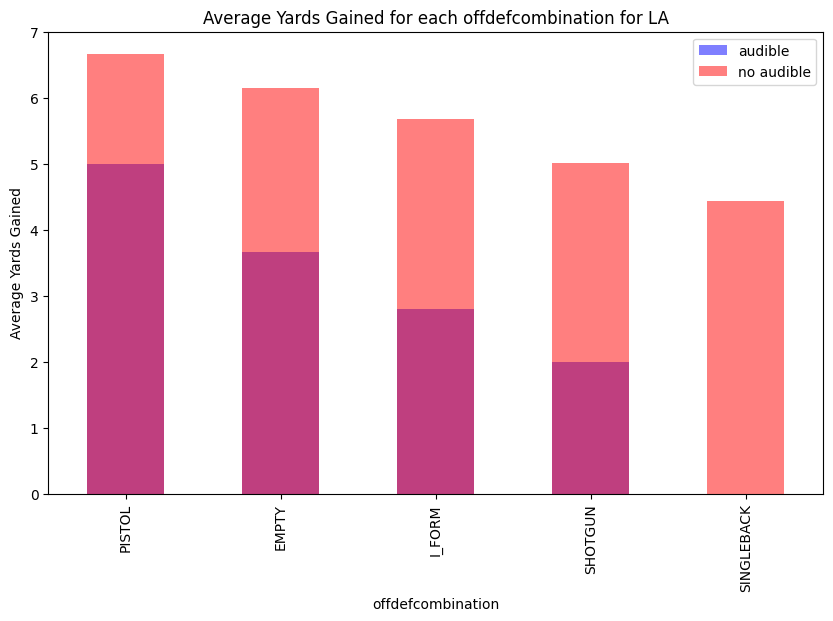

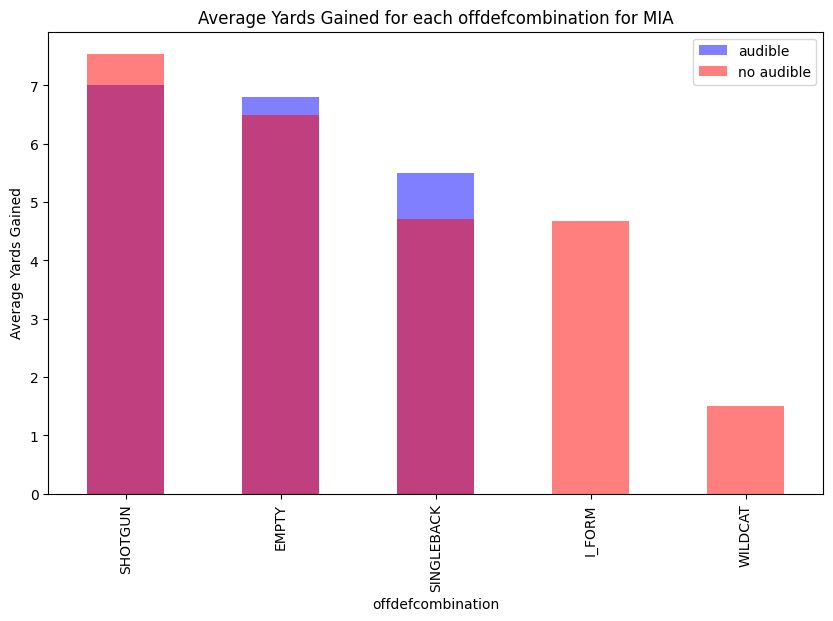

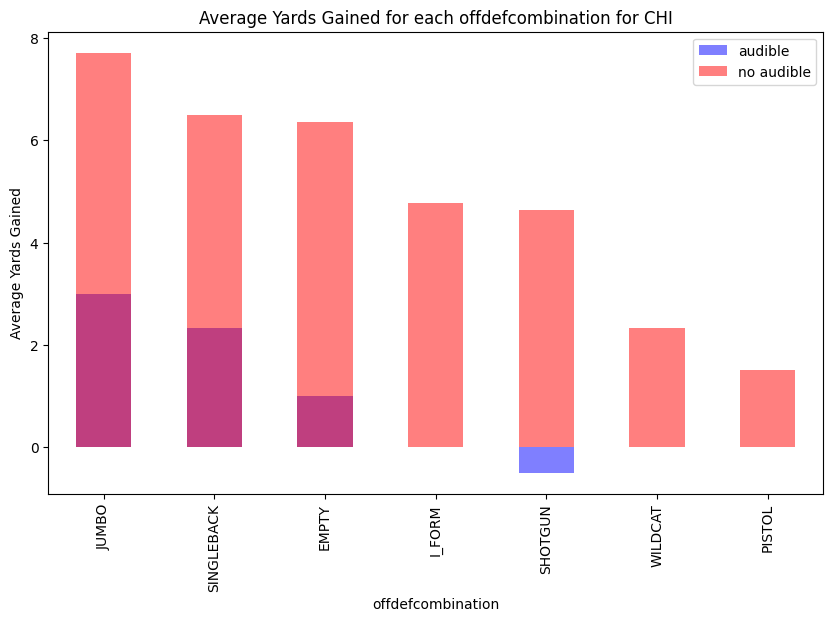

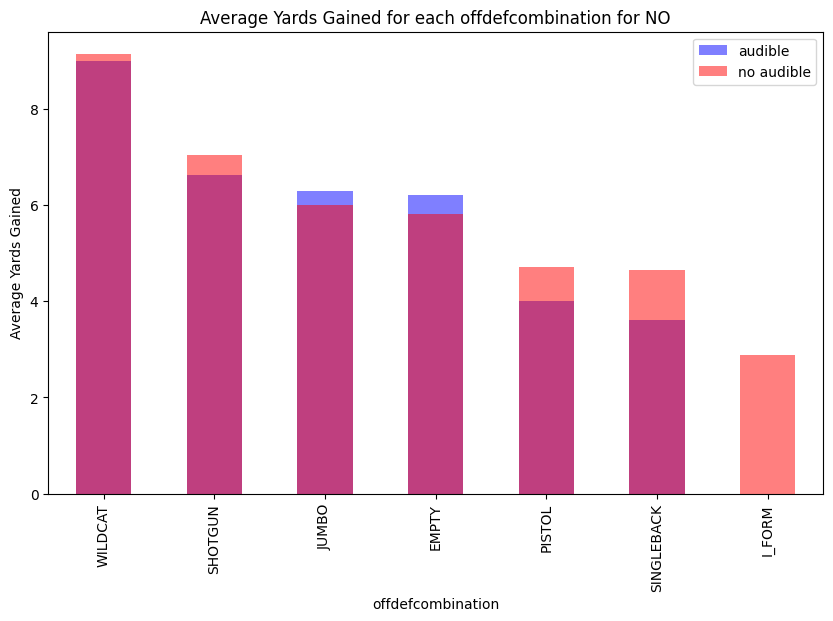

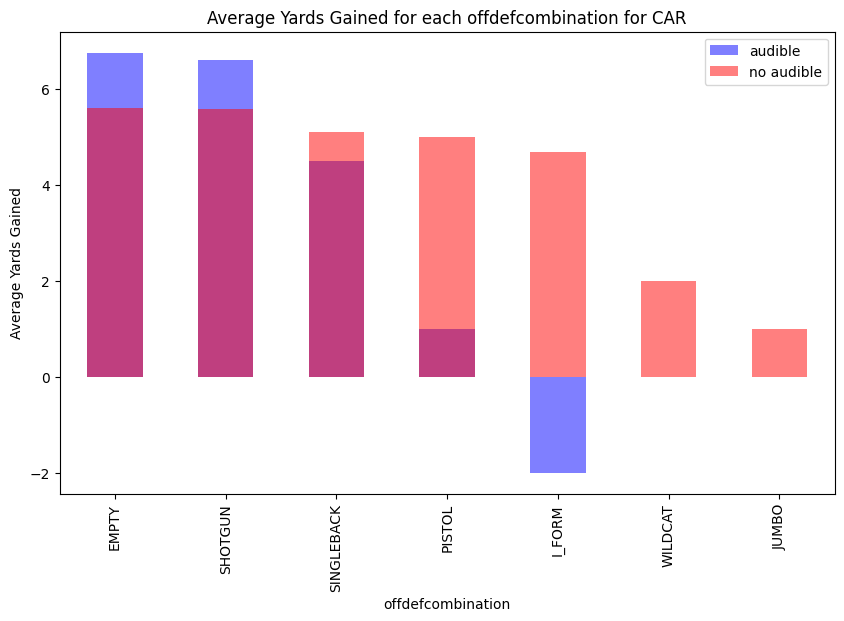

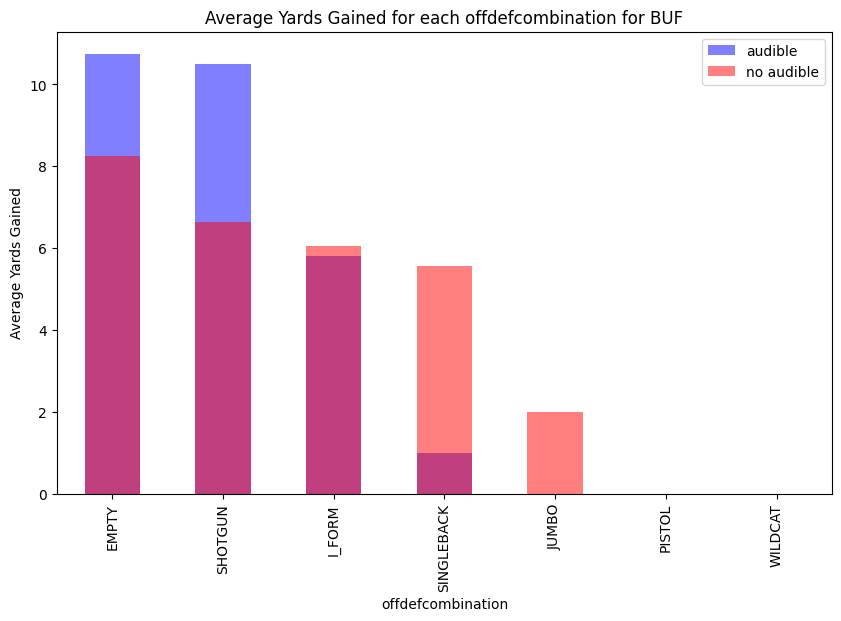

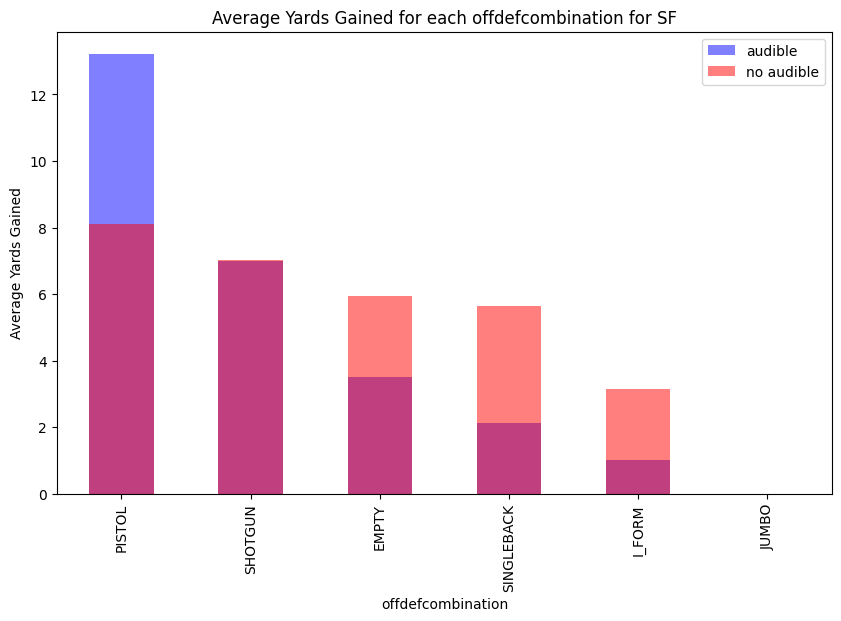

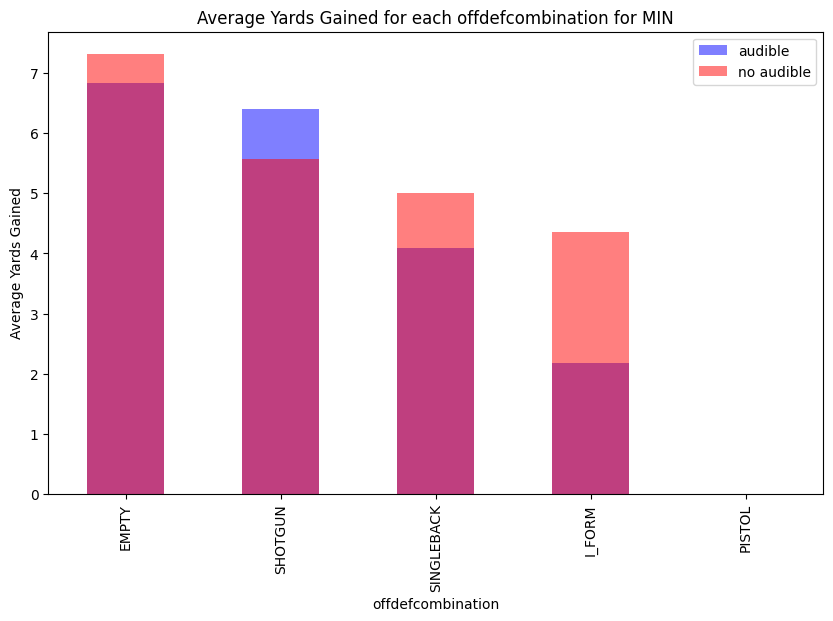

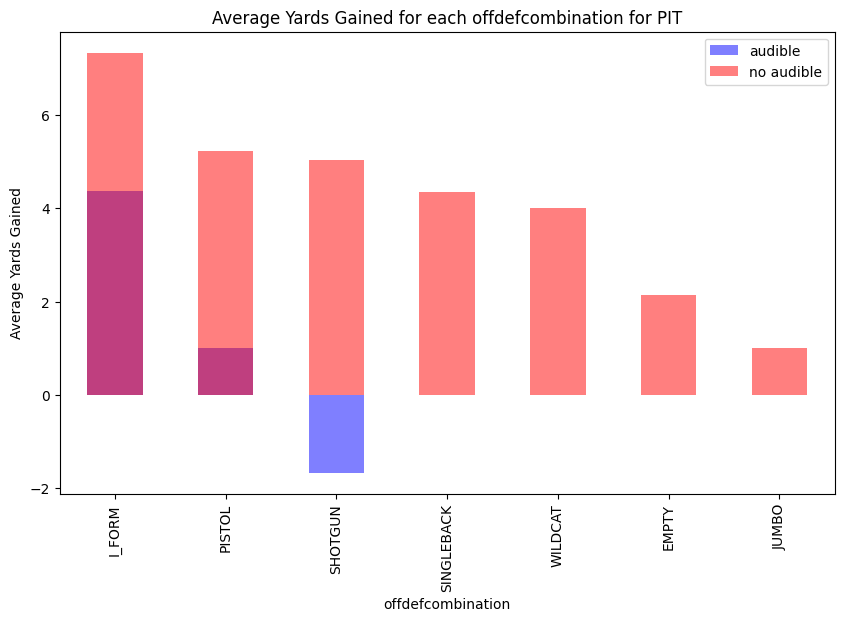

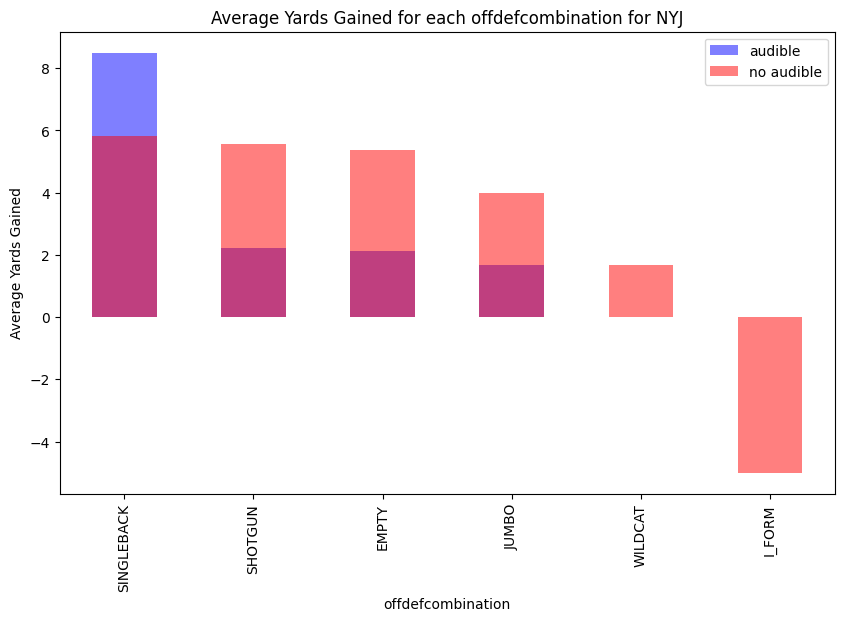

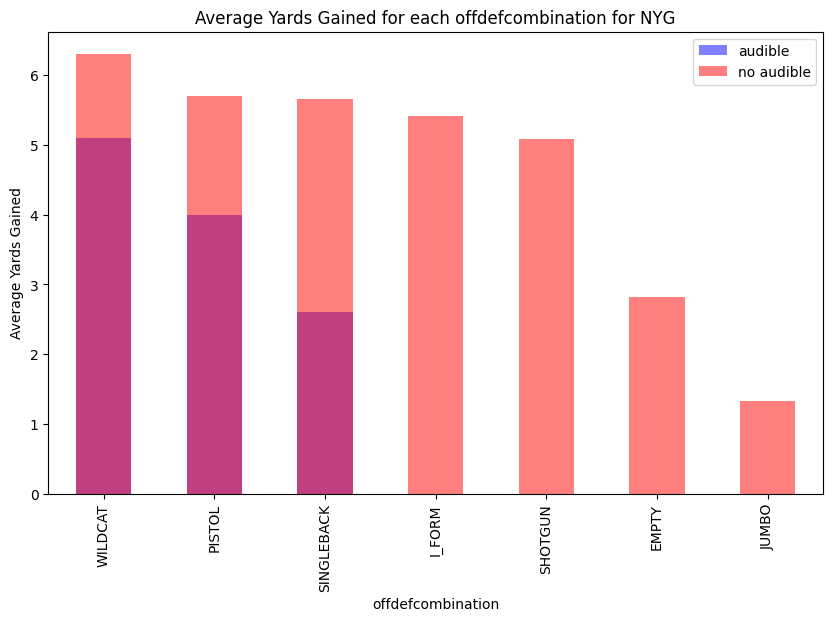

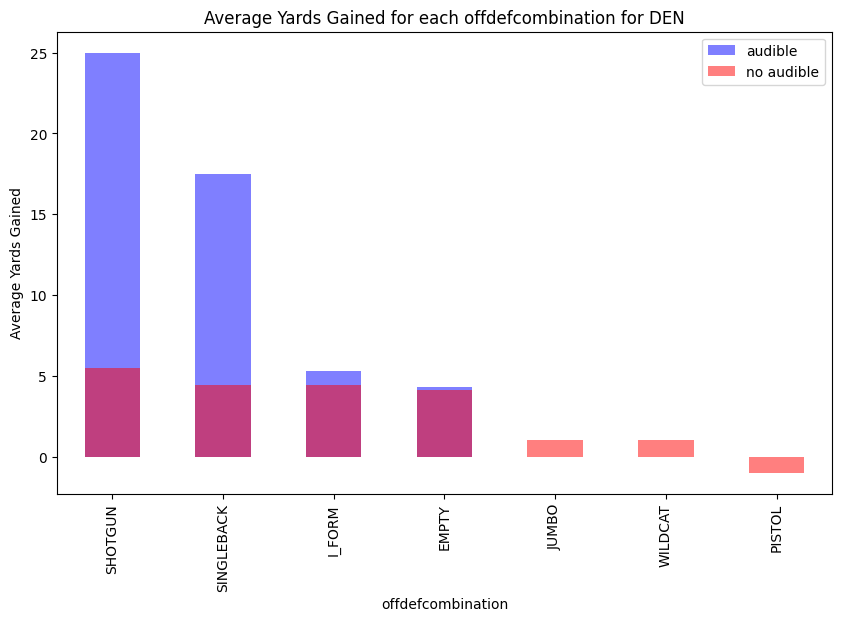

In [296]:
# Calculate average yards gained for each offdefcombination when audible is called for each team
avg_yards_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 1].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()

# Calculate average yards gained for each offdefcombination when audible is not called for each team
avg_yards_no_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 0].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()

# Sort by average yards gained
avg_yards_audible_team = avg_yards_audible_team.sort_values(ascending=False)
avg_yards_no_audible_team = avg_yards_no_audible_team.sort_values(ascending=False)

# Print top 10 and bottom 10 for audibles
print("Top 10 average yards gained when audible is called:")
print(avg_yards_audible_team.head(10))
print("\nBottom 10 average yards gained when audible is called:")
print(avg_yards_audible_team.tail(10))

# Print top 10 and bottom 10 for no audibles
print("\nTop 10 average yards gained when audible is not called:")
print(avg_yards_no_audible_team.head(10))
print("\nBottom 10 average yards gained when audible is not called:")
print(avg_yards_no_audible_team.tail(10))

#graph each teams data individually
for team in plays_audible_data['possessionTeam'].unique():
    avg_yards_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 1) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()
    avg_yards_no_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 0) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()

    # Sort by average yards gained
    avg_yards_audible_team = avg_yards_audible_team.sort_values(ascending=False)
    avg_yards_no_audible_team = avg_yards_no_audible_team.sort_values(ascending=False)

    # Graph average yards gained for each offdefcombination
    plt.figure(figsize=(10, 6))
    avg_yards_audible_team.plot(kind='bar', alpha=0.5, label='audible', color='blue')
    avg_yards_no_audible_team.plot(kind='bar', alpha=0.5, label='no audible', color='red')
    plt.xlabel('offdefcombination')
    plt.ylabel('Average Yards Gained')
    plt.title('Average Yards Gained for each offdefcombination for ' + team)
    plt.legend(loc='upper right')
    plt.show()

Top 10 average yards gained when audible is called:
offdefcombination  possessionTeam
I_FORM             DEN               25.000000
EMPTY              DEN               17.500000
WILDCAT            SEA               17.000000
I_FORM             PHI               16.000000
EMPTY              CIN               15.750000
JUMBO              JAX               15.000000
PISTOL             DAL               14.500000
SHOTGUN            SF                13.222222
PISTOL             JAX               13.000000
EMPTY              CLE               12.000000
Name: yardsGained, dtype: float64

Bottom 10 average yards gained when audible is called:
offdefcombination  possessionTeam
I_FORM             CIN               0.000000
                   CHI              -0.500000
EMPTY              ATL              -0.571429
I_FORM             JAX              -1.000000
JUMBO              NE               -1.000000
SINGLEBACK         PIT              -1.666667
EMPTY              TB               -2.00000

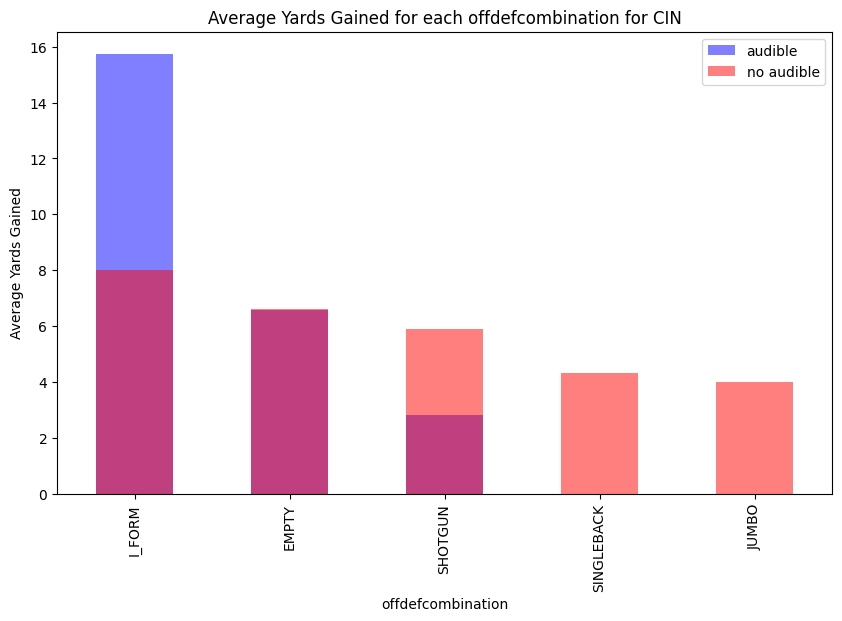

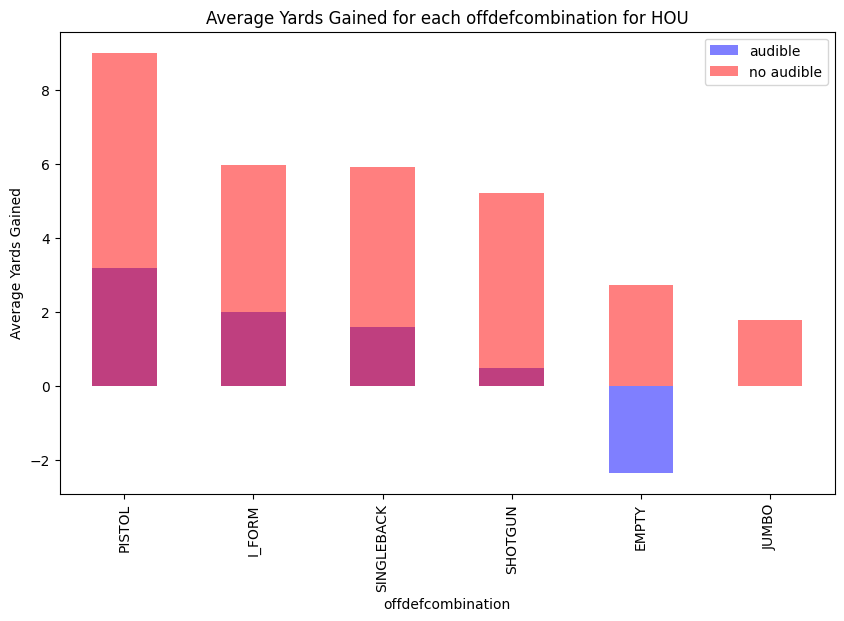

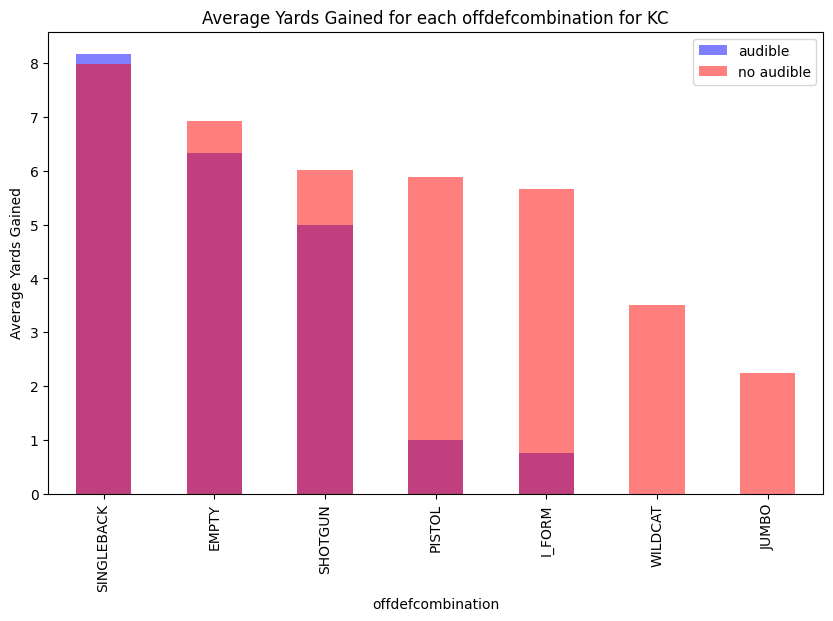

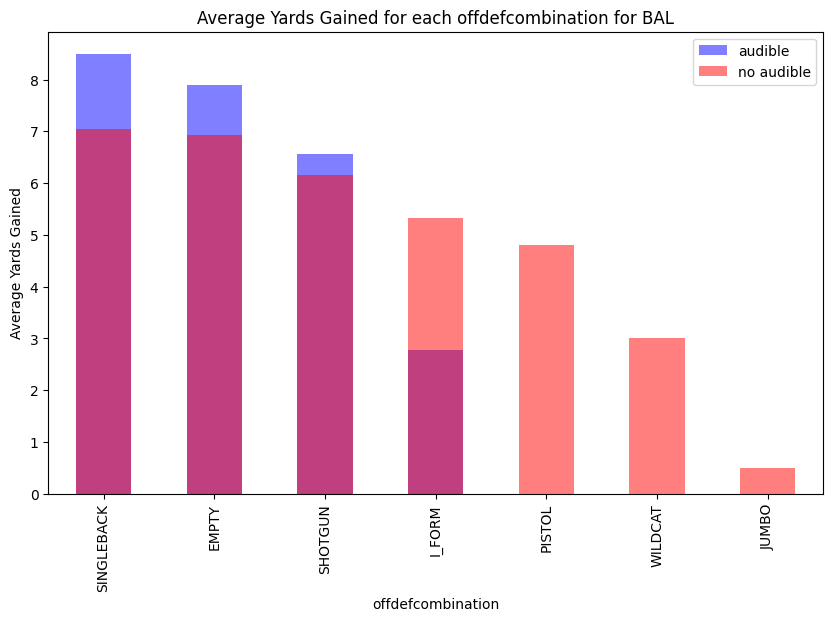

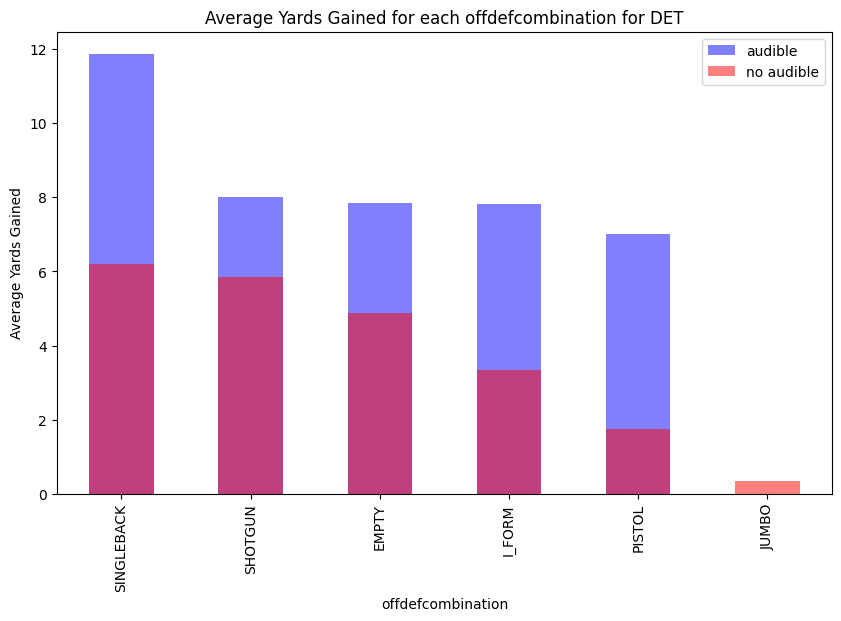

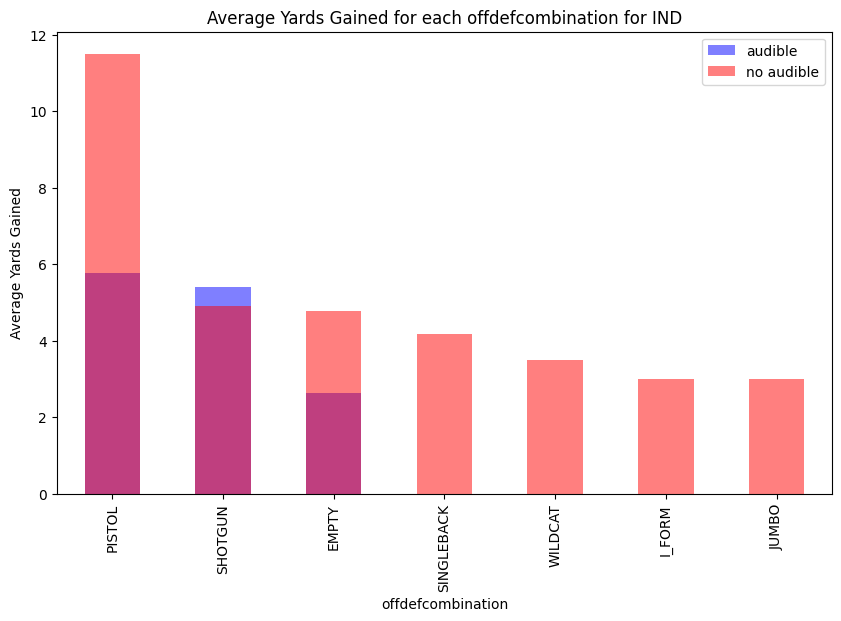

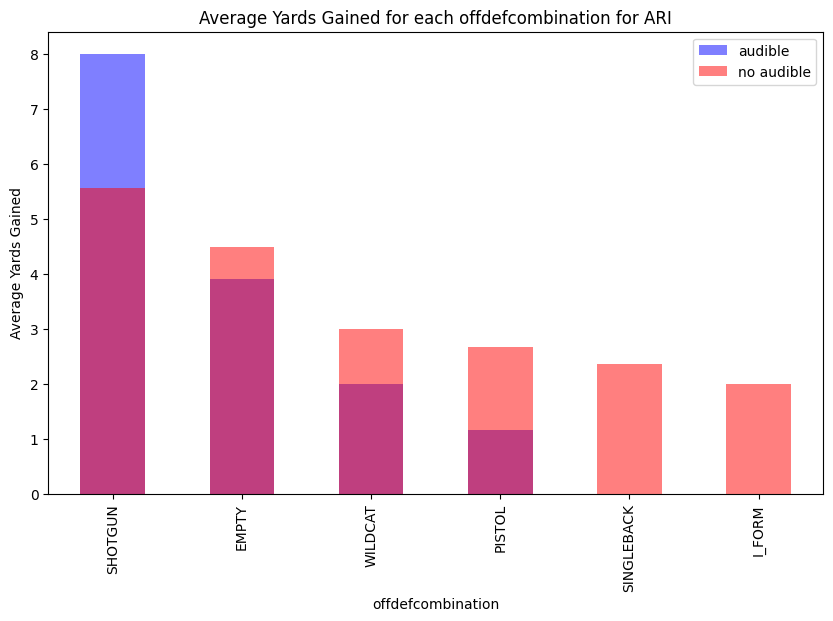

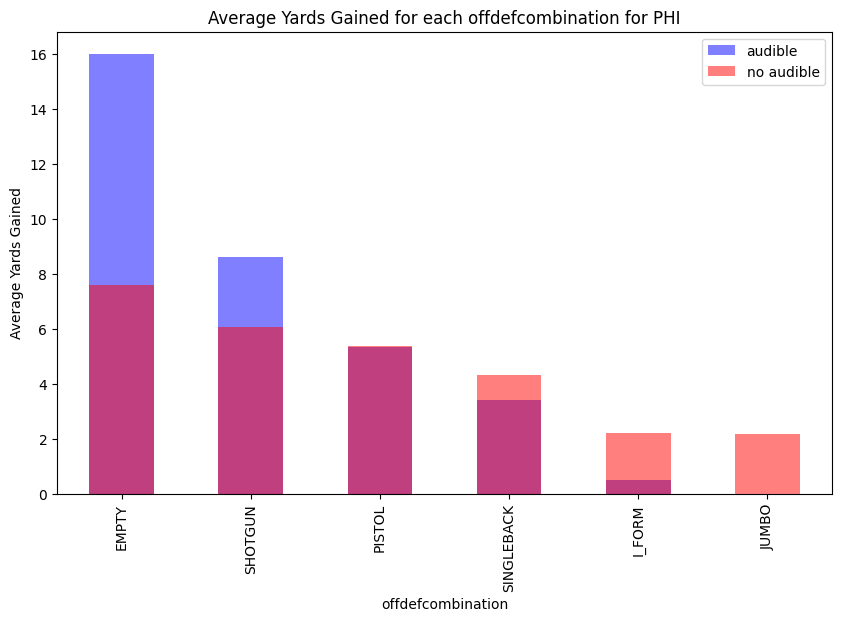

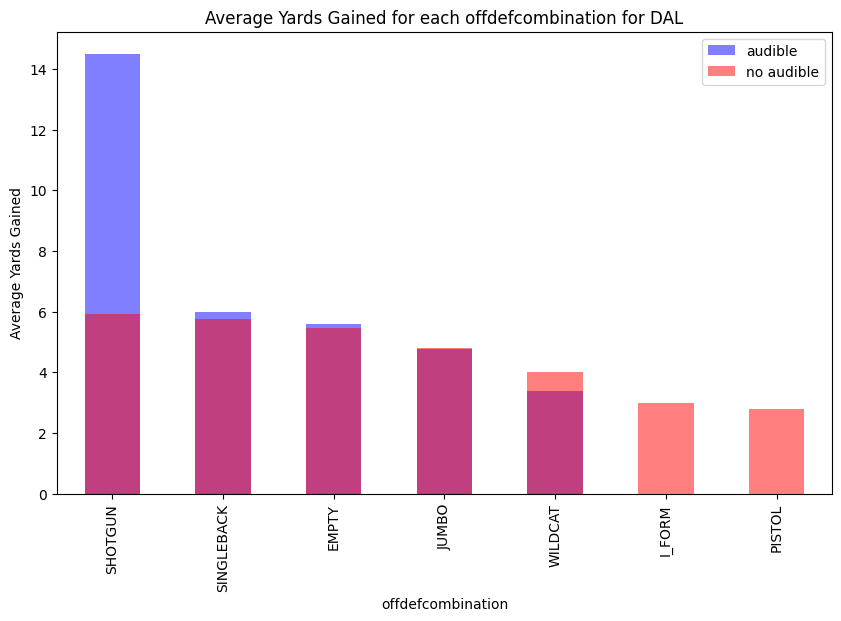

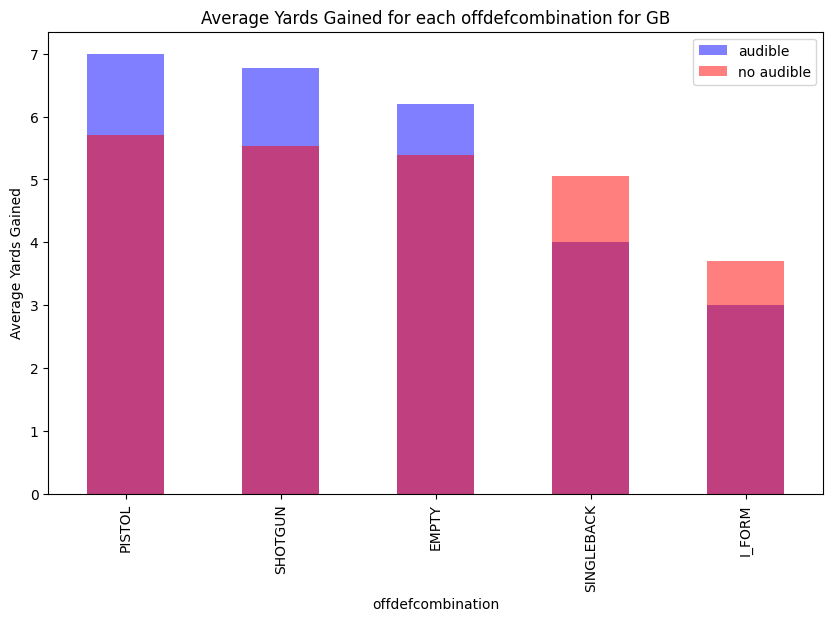

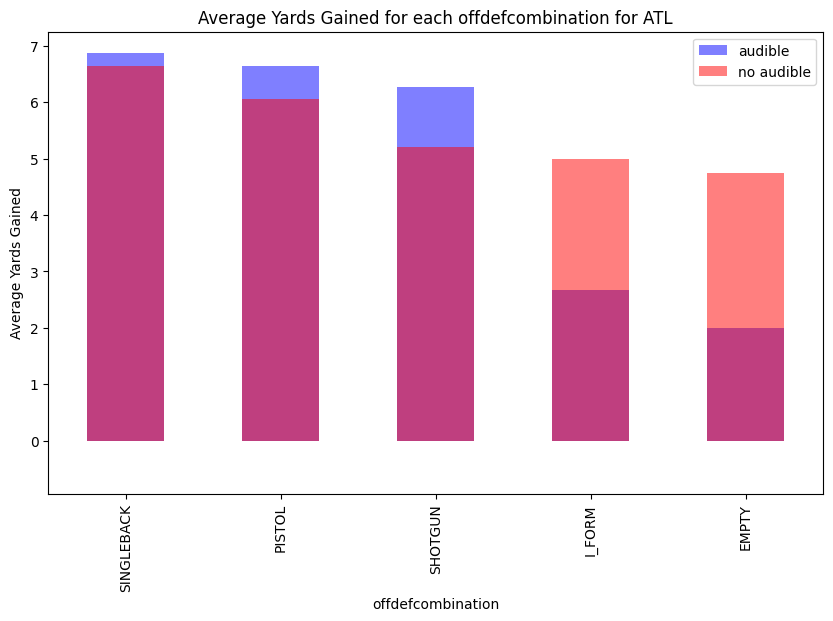

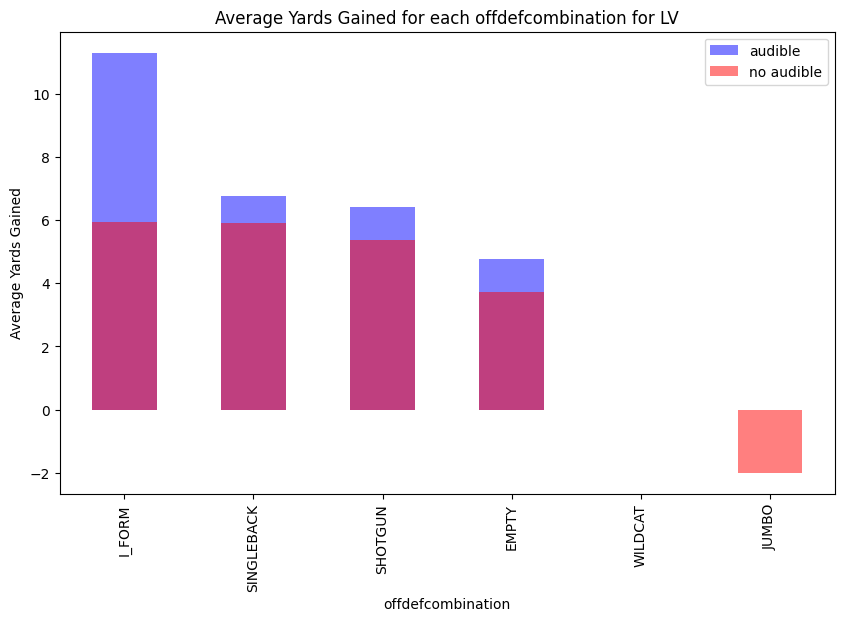

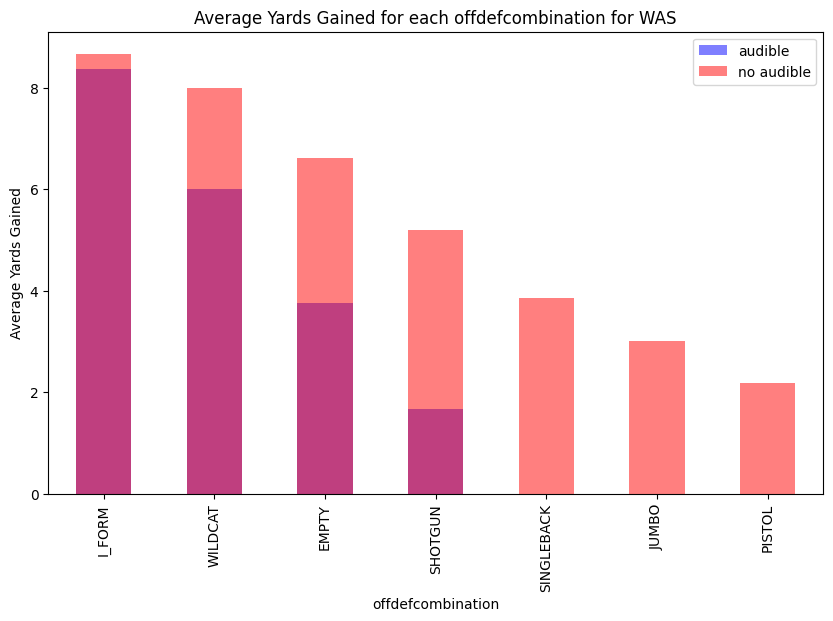

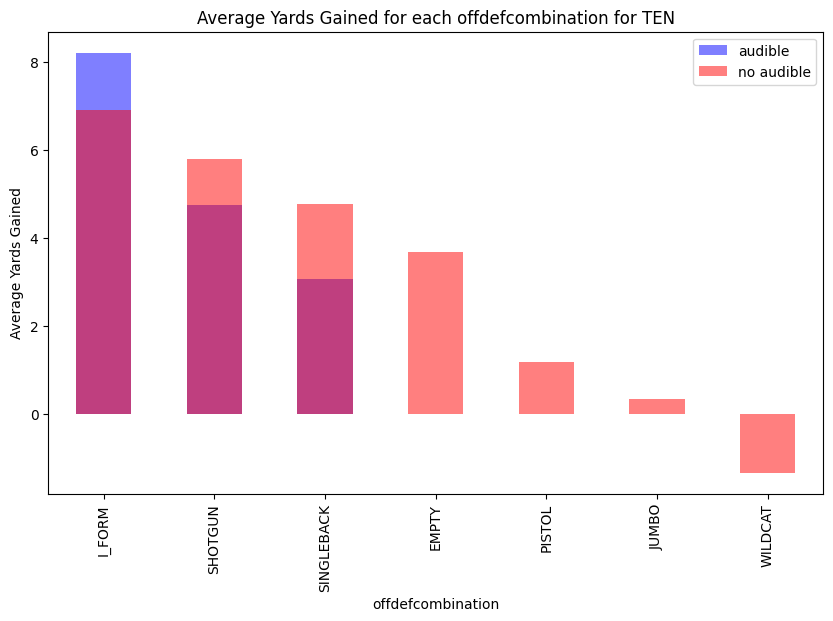

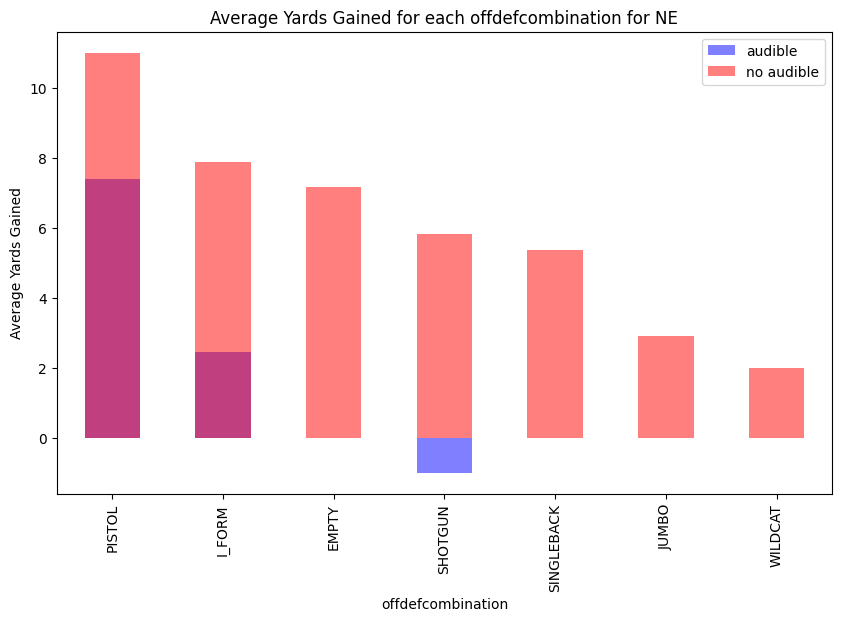

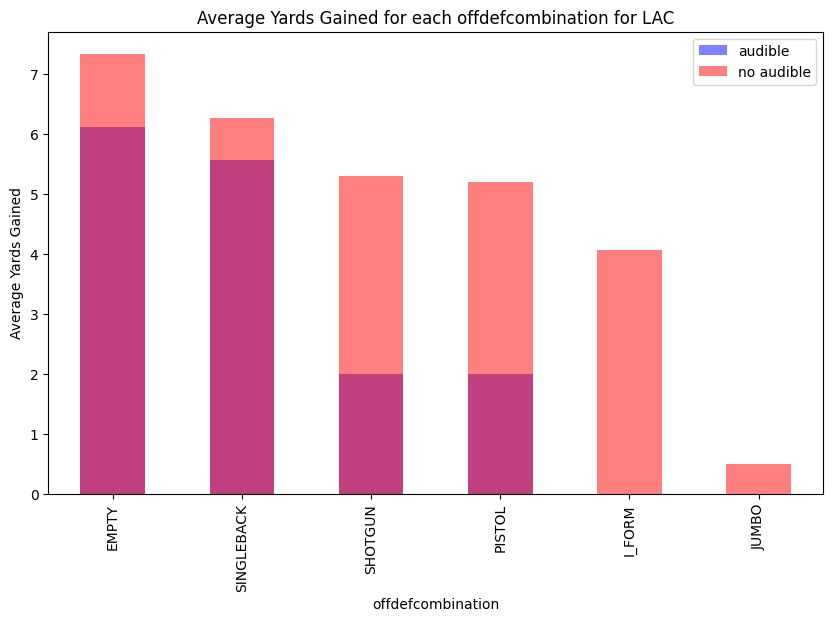

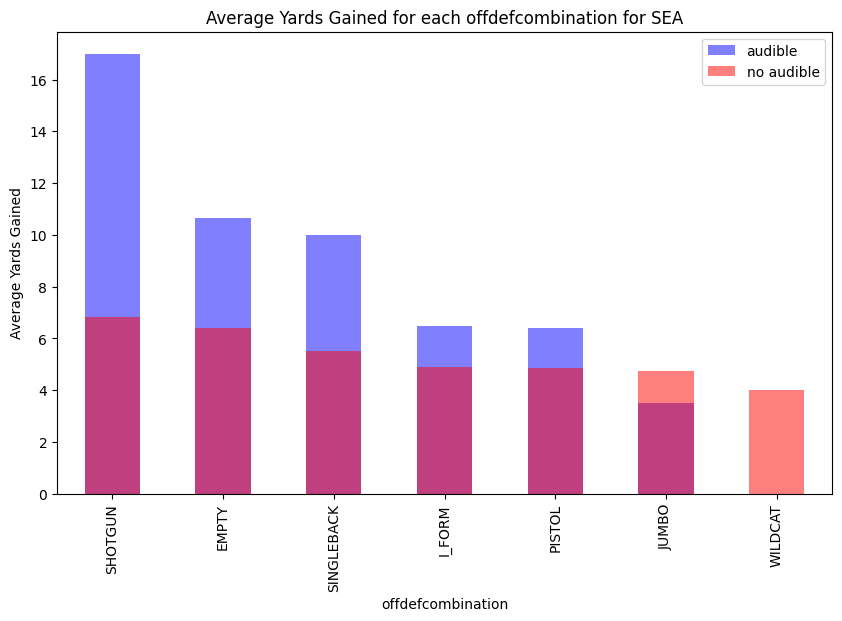

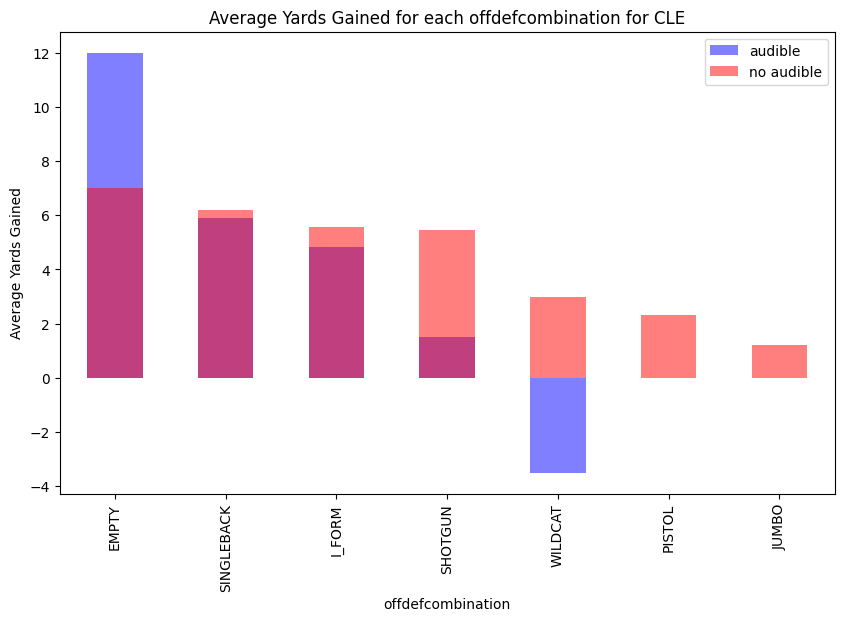

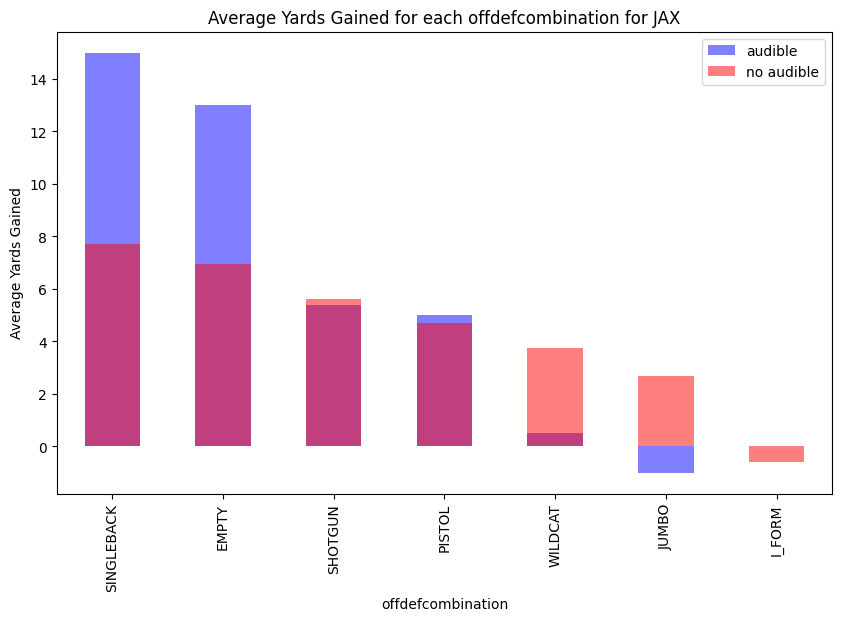

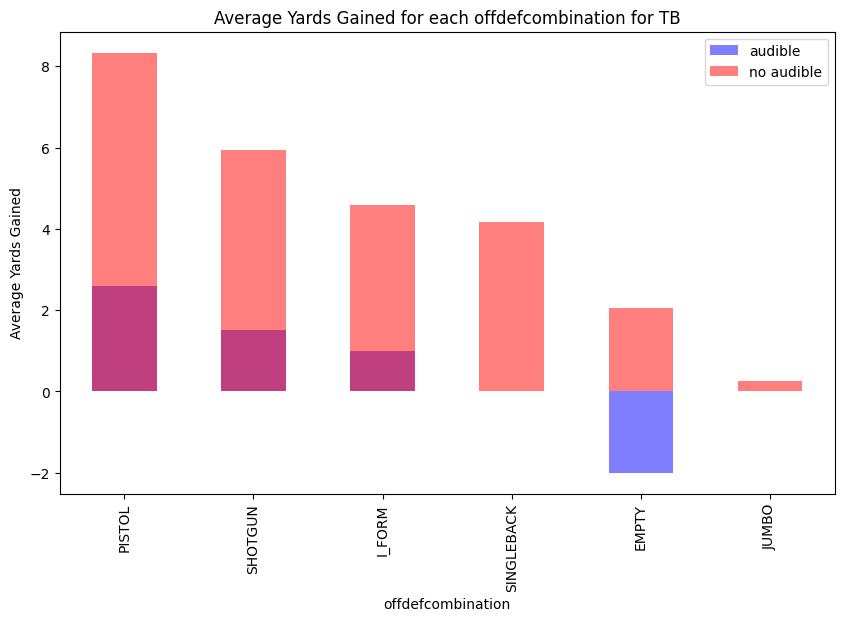

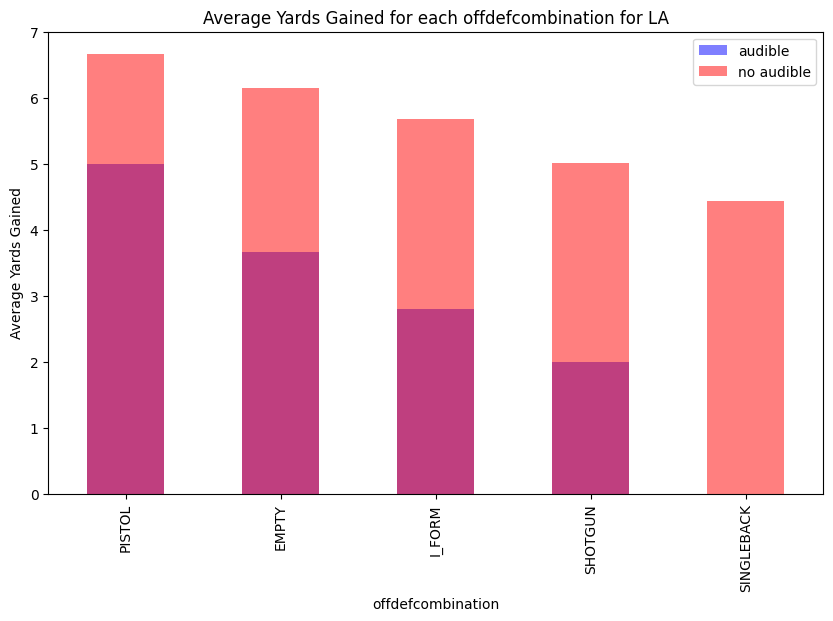

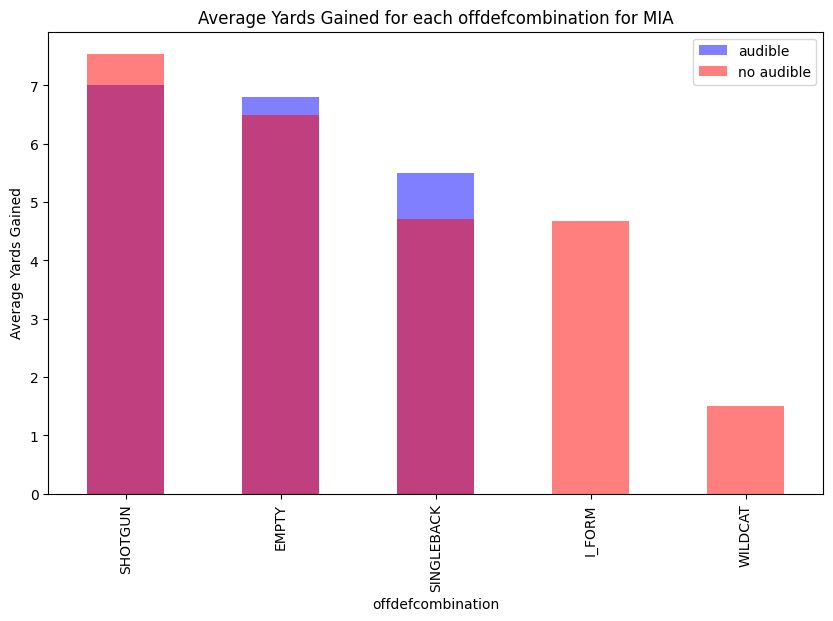

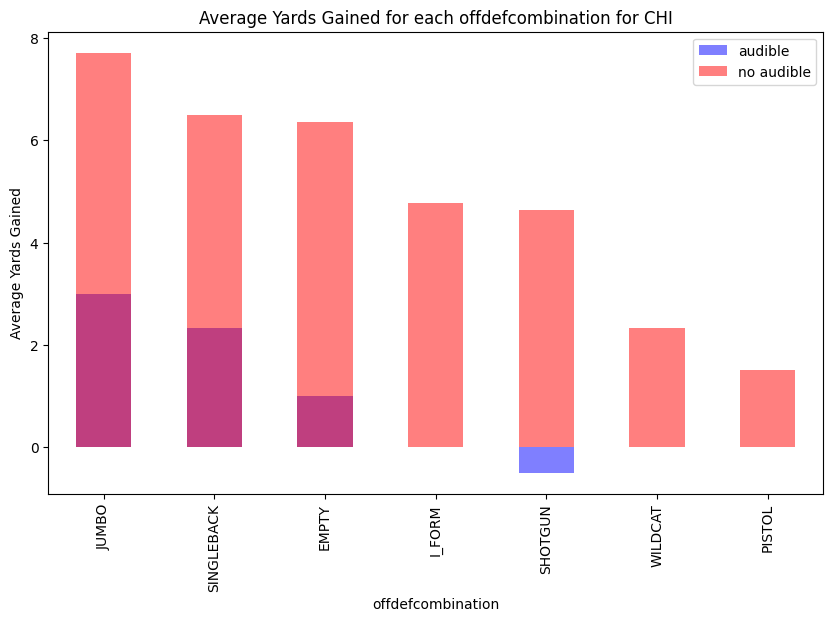

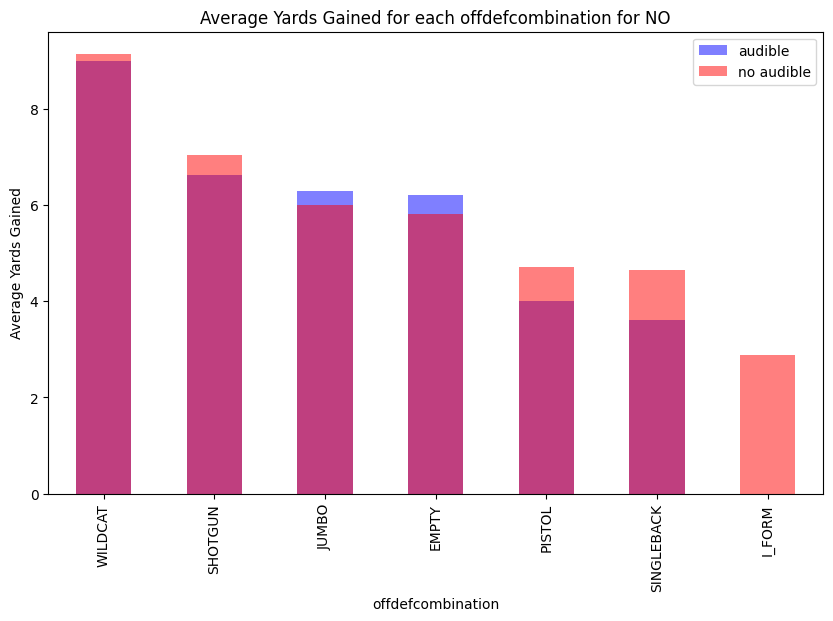

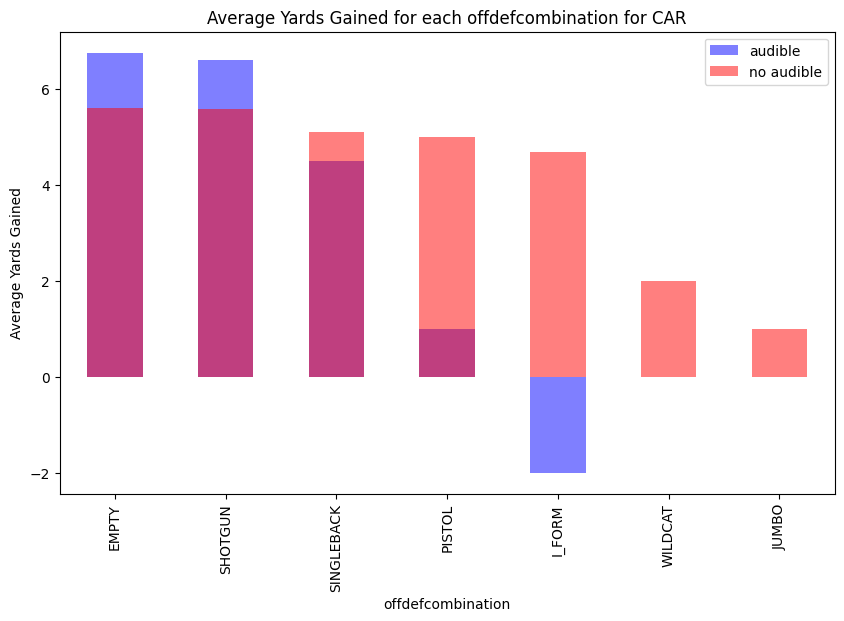

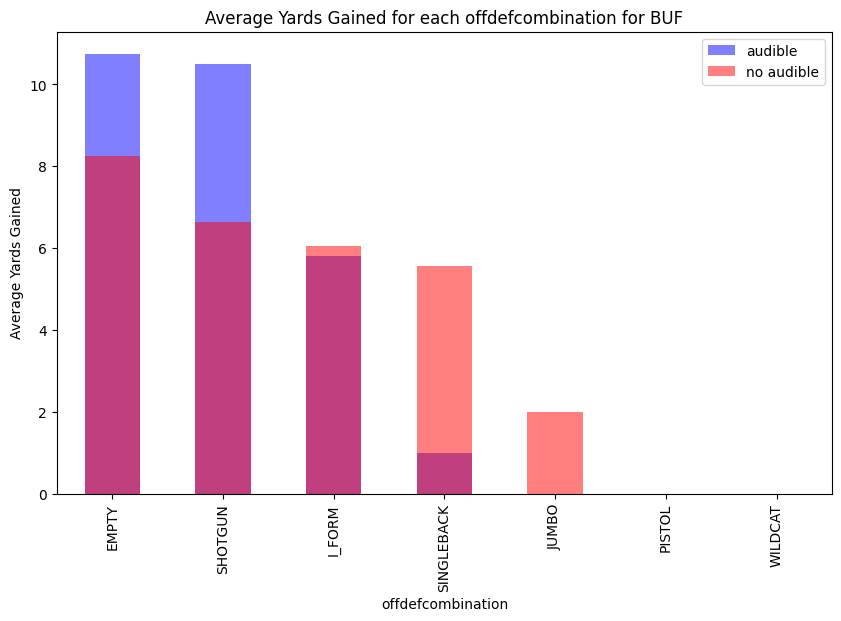

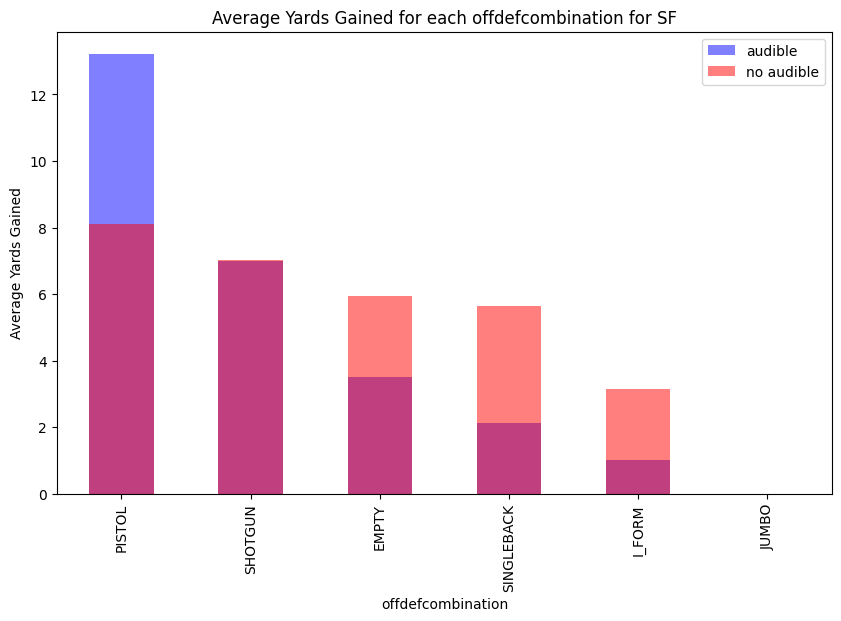

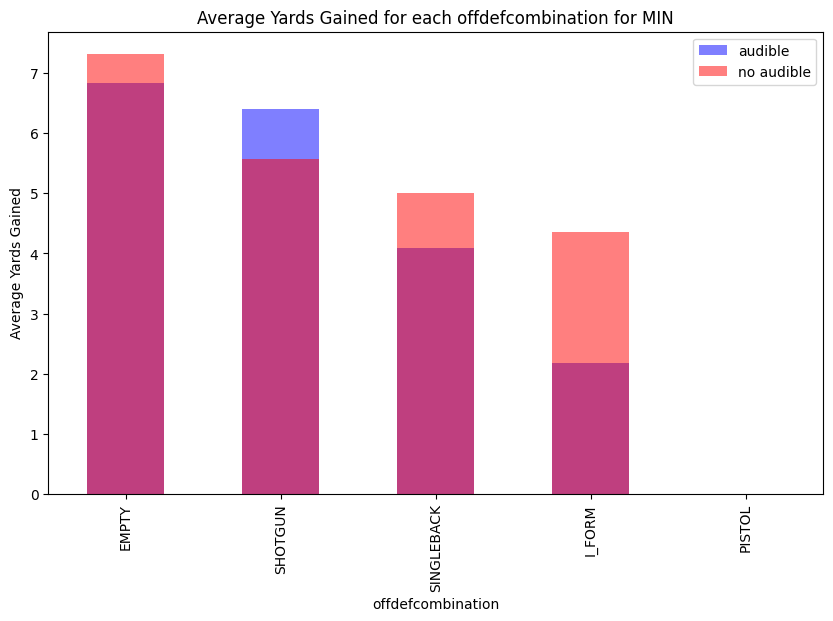

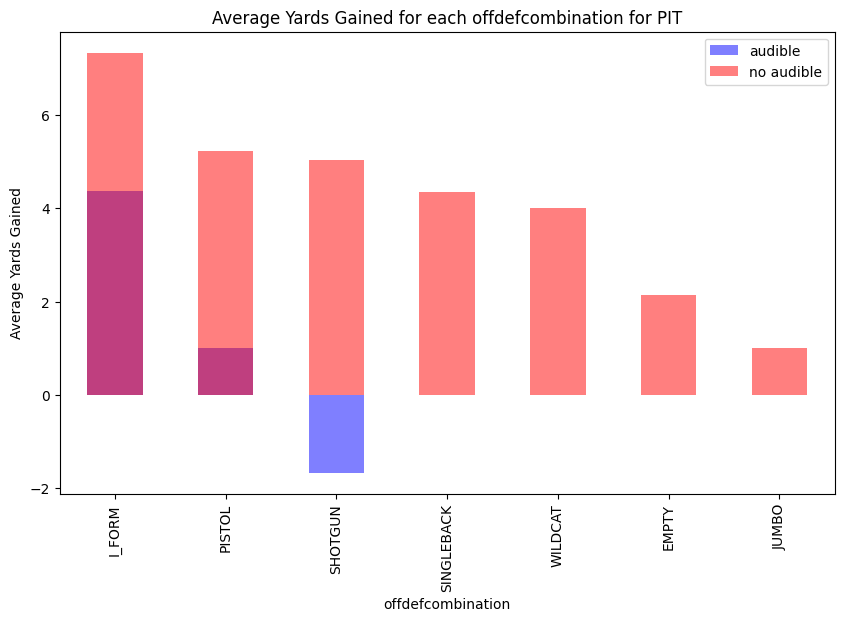

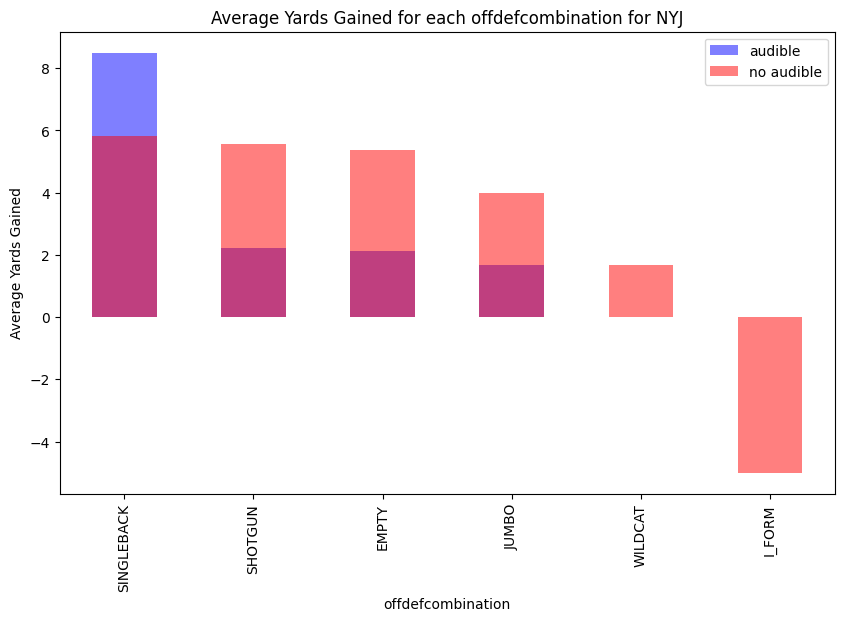

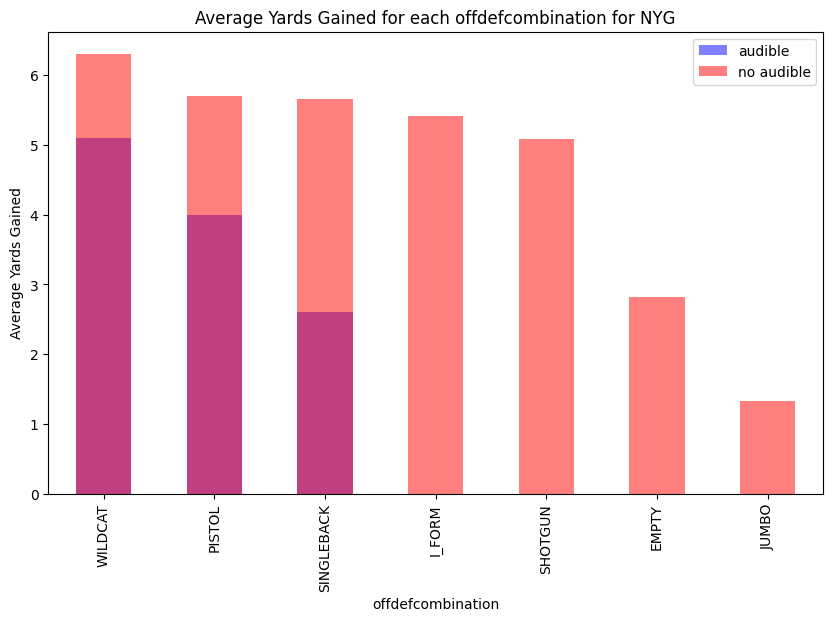

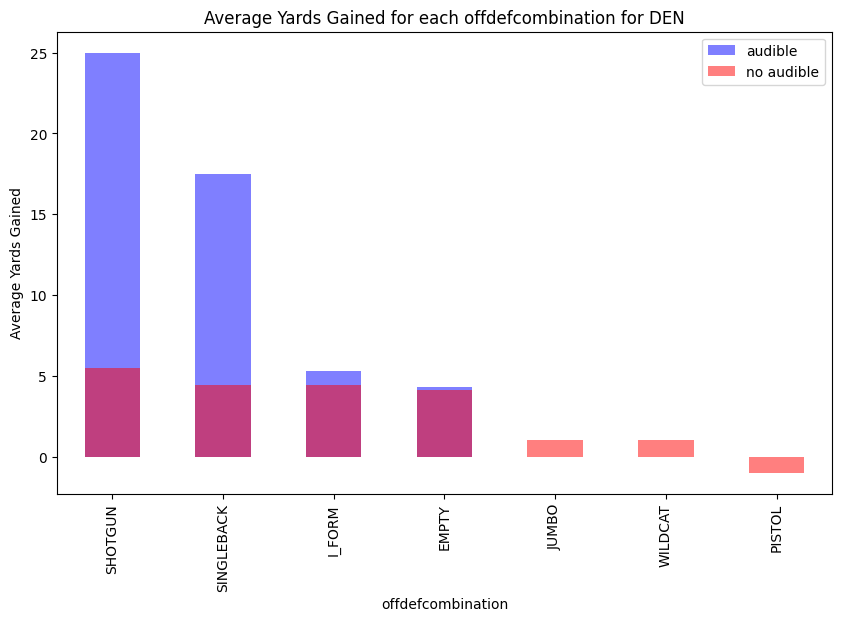

In [297]:
# Calculate average yards gained for each offdefcombination when audible is called for each team
avg_yards_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 1].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()

# Calculate average yards gained for each offdefcombination when audible is not called for each team
avg_yards_no_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 0].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()

# Sort by average yards gained
avg_yards_audible_team = avg_yards_audible_team.sort_values(ascending=False)
avg_yards_no_audible_team = avg_yards_no_audible_team.sort_values(ascending=False)

# Print top 10 and bottom 10 for audibles
print("Top 10 average yards gained when audible is called:")
print(avg_yards_audible_team.head(10))
print("\nBottom 10 average yards gained when audible is called:")
print(avg_yards_audible_team.tail(10))

# Print top 10 and bottom 10 for no audibles
print("\nTop 10 average yards gained when audible is not called:")
print(avg_yards_no_audible_team.head(10))
print("\nBottom 10 average yards gained when audible is not called:")
print(avg_yards_no_audible_team.tail(10))

#graph each teams data individually
for team in plays_audible_data['possessionTeam'].unique():
    avg_yards_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 1) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()
    avg_yards_no_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 0) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()

    #drop combinations with less than 2 audible plays
    #avg_yards_audible_team = avg_yards_audible_team[avg_yards_audible_team > 2]
    
    #drop all commbinations from no audible list that are on not on the audible list
    #avg_yards_no_audible_team = avg_yards_no_audible_team.drop(avg_yards_no_audible_team[~avg_yards_no_audible_team.index.isin(avg_yards_audible_team.index)].index)


    # Sort by average yards gained
    avg_yards_audible_team = avg_yards_audible_team.sort_values(ascending=False)
    avg_yards_no_audible_team = avg_yards_no_audible_team.sort_values(ascending=False)

    # Graph average yards gained for each offdefcombination
    plt.figure(figsize=(10, 6))
    avg_yards_audible_team.plot(kind='bar', alpha=0.5, label='audible', color='blue')
    avg_yards_no_audible_team.plot(kind='bar', alpha=0.5, label='no audible', color='red')
    plt.xlabel('offdefcombination')
    plt.ylabel('Average Yards Gained')
    plt.title('Average Yards Gained for each offdefcombination for ' + team)
    plt.legend(loc='upper right')
    plt.show()

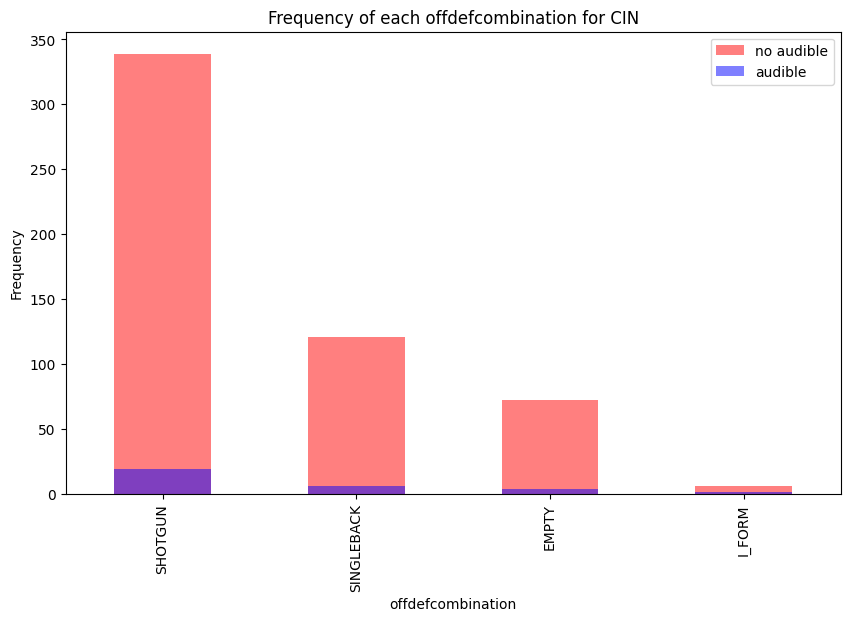

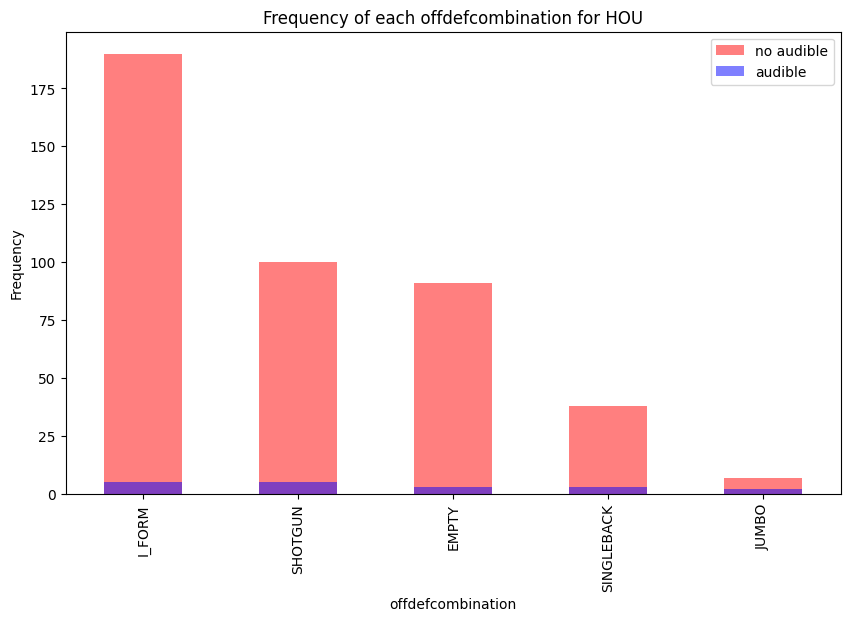

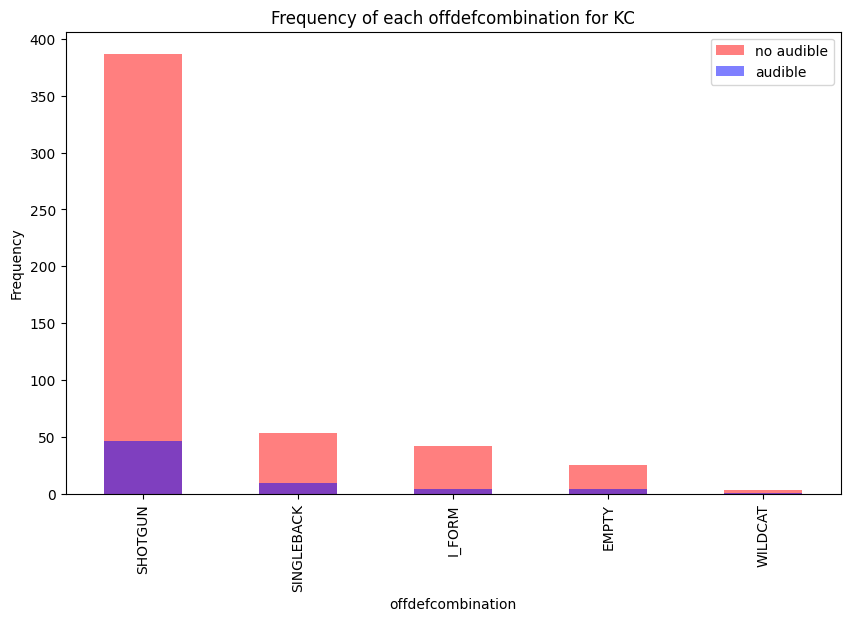

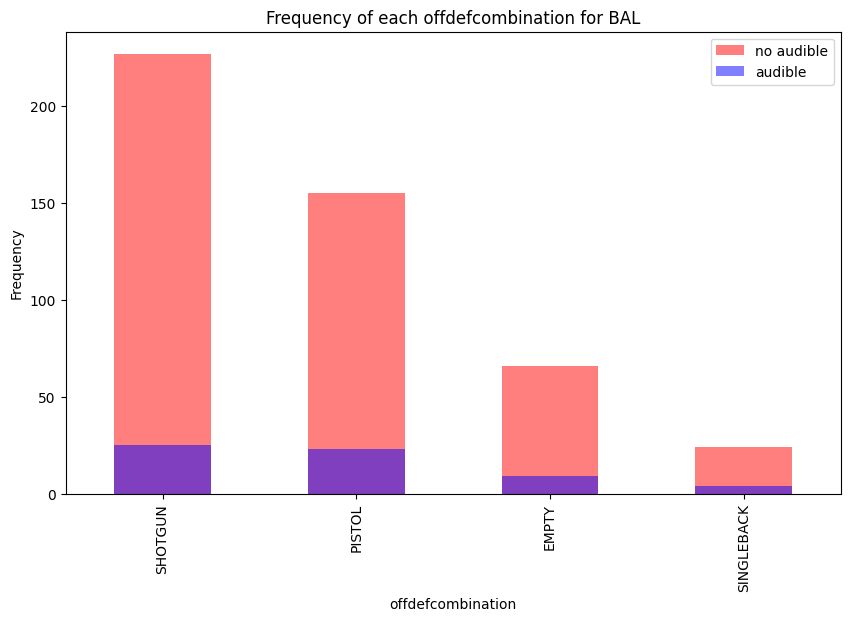

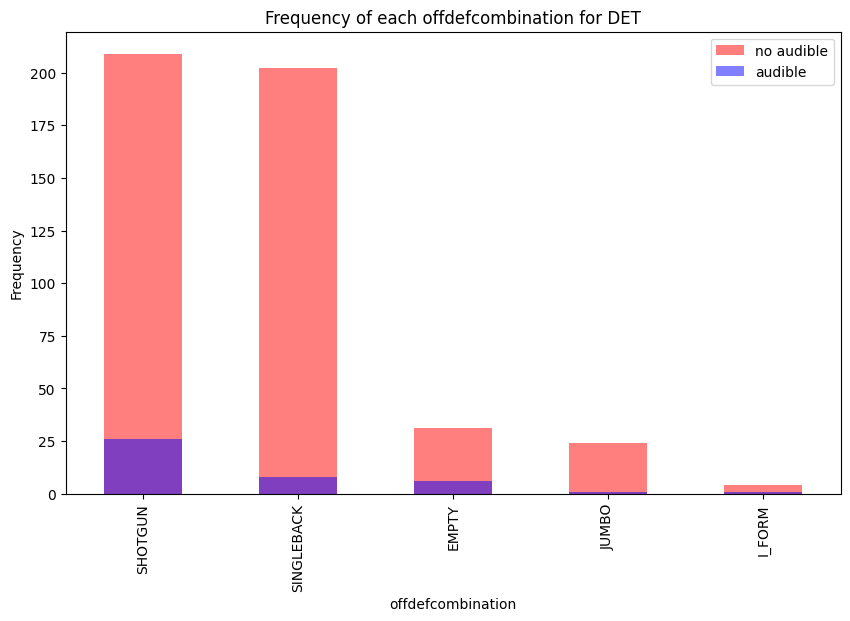

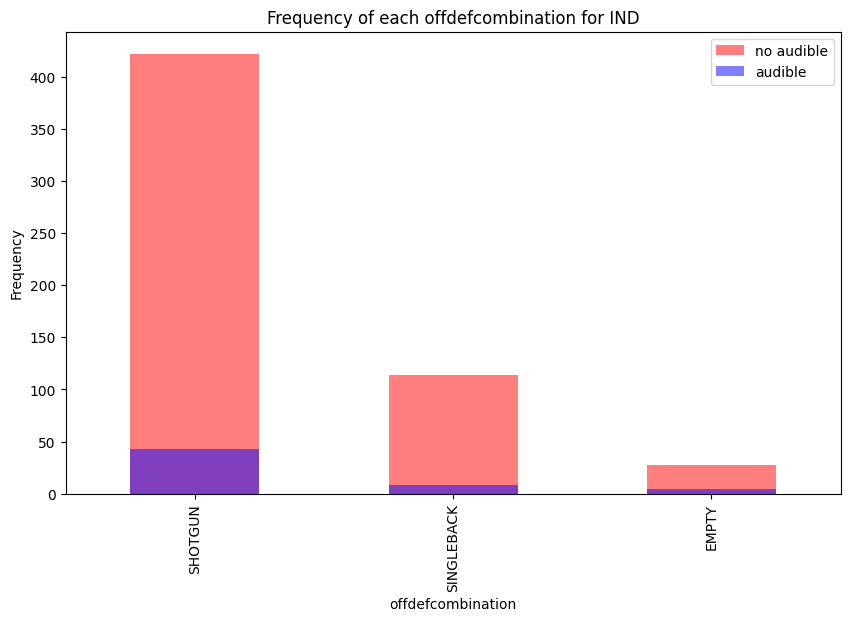

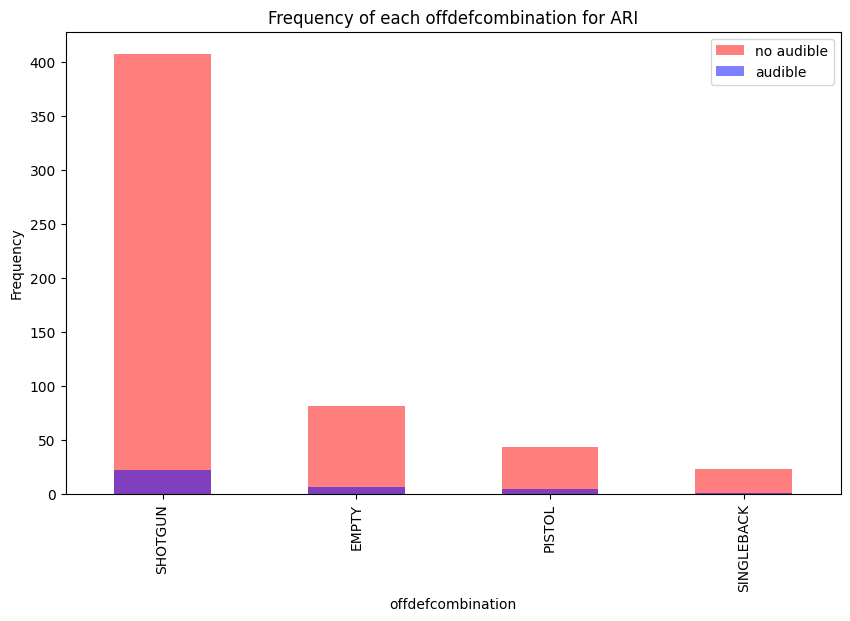

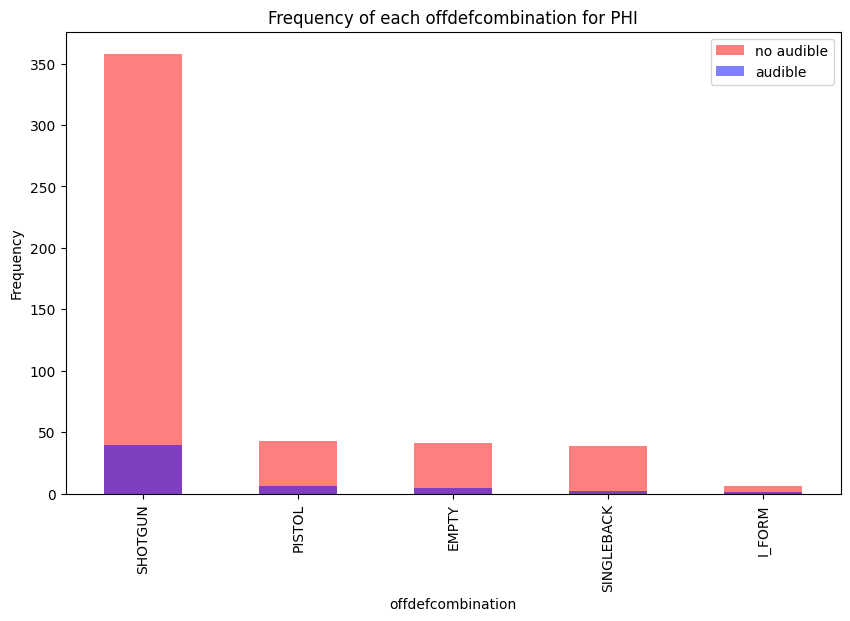

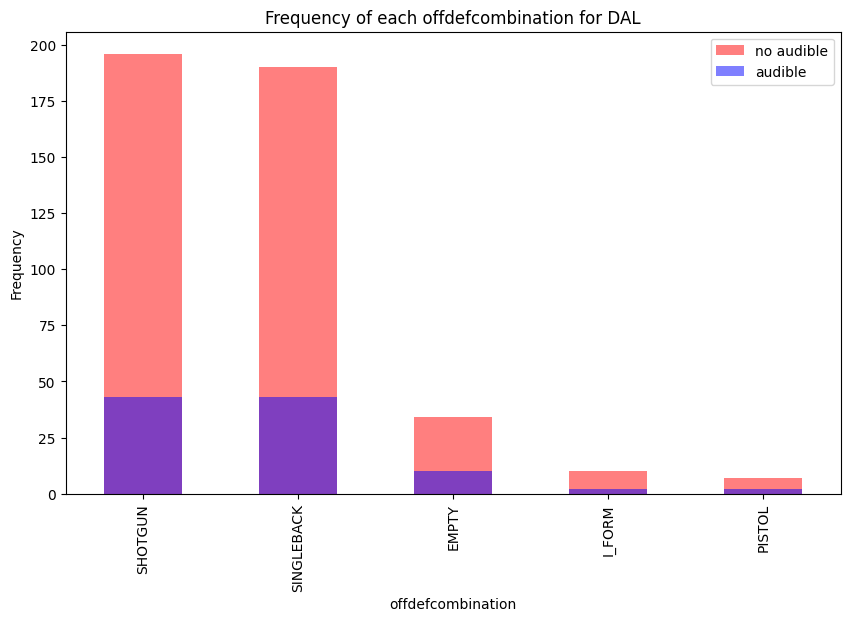

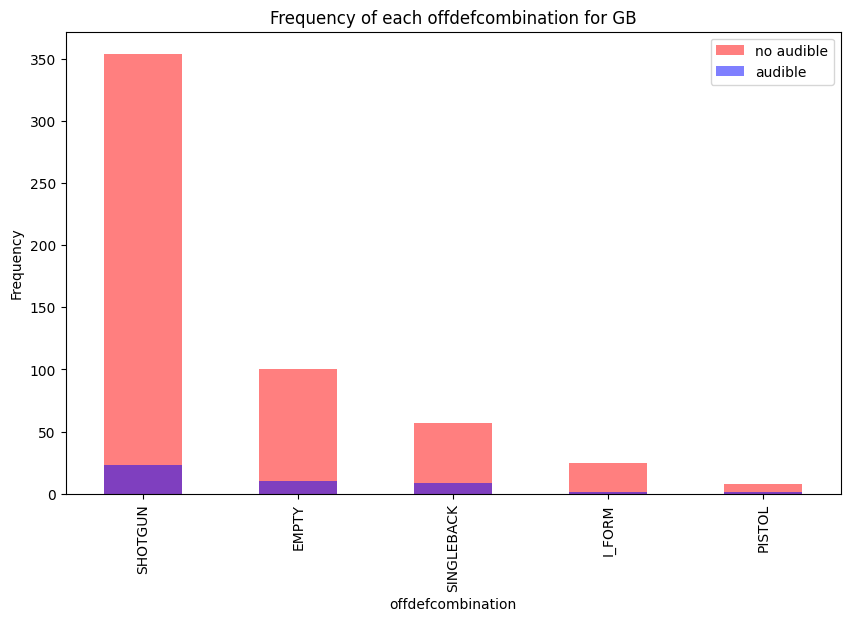

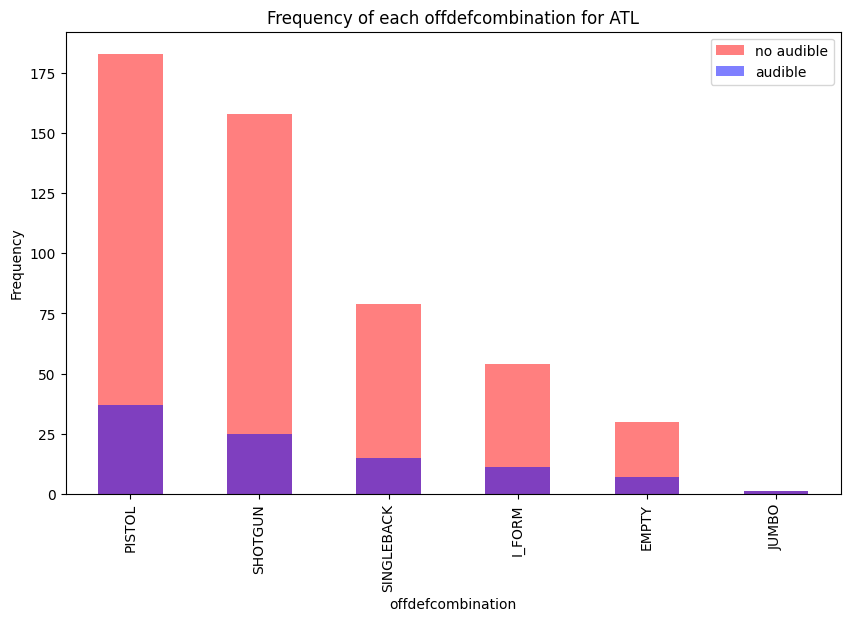

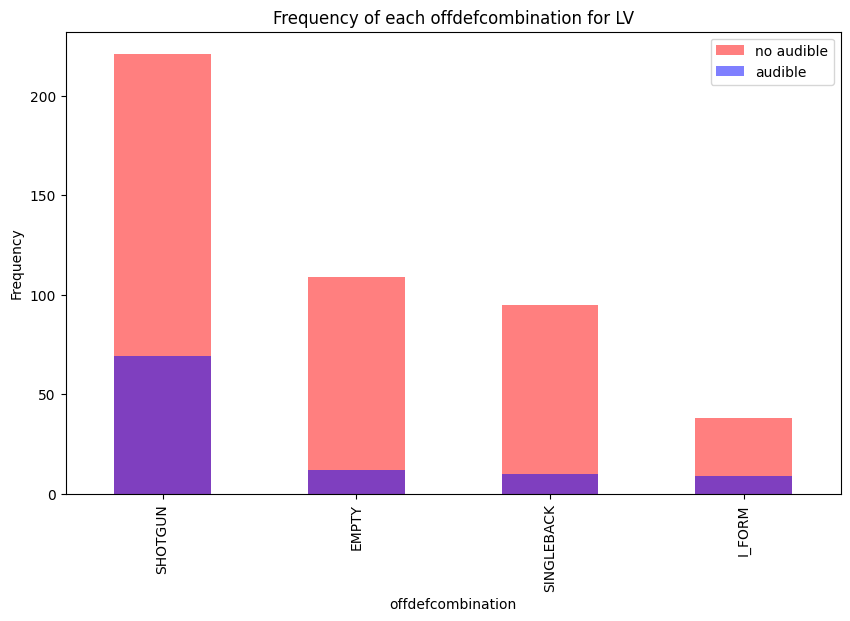

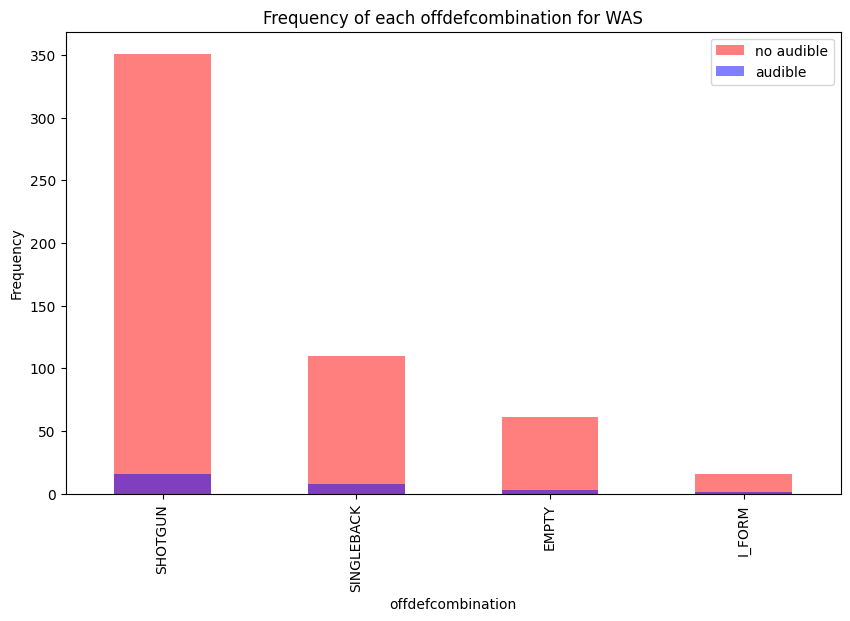

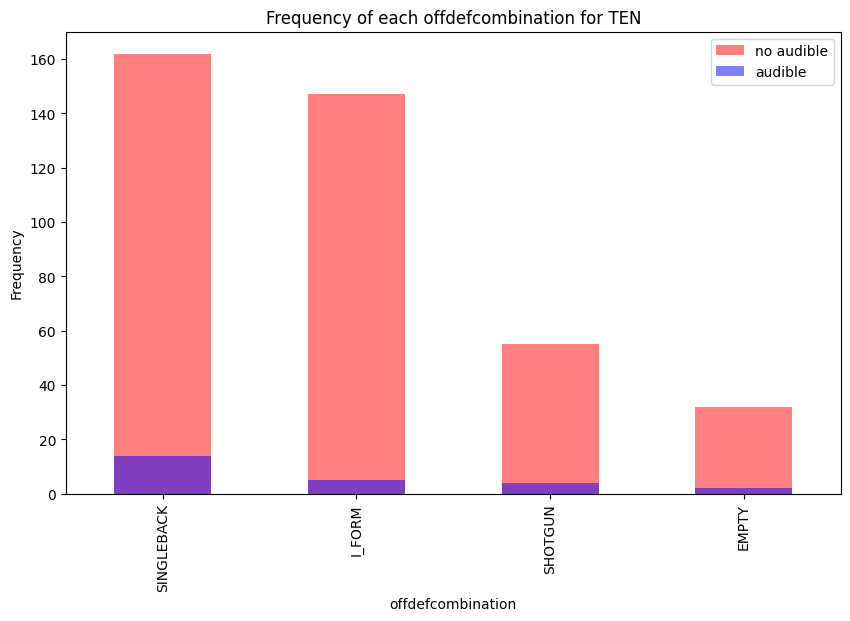

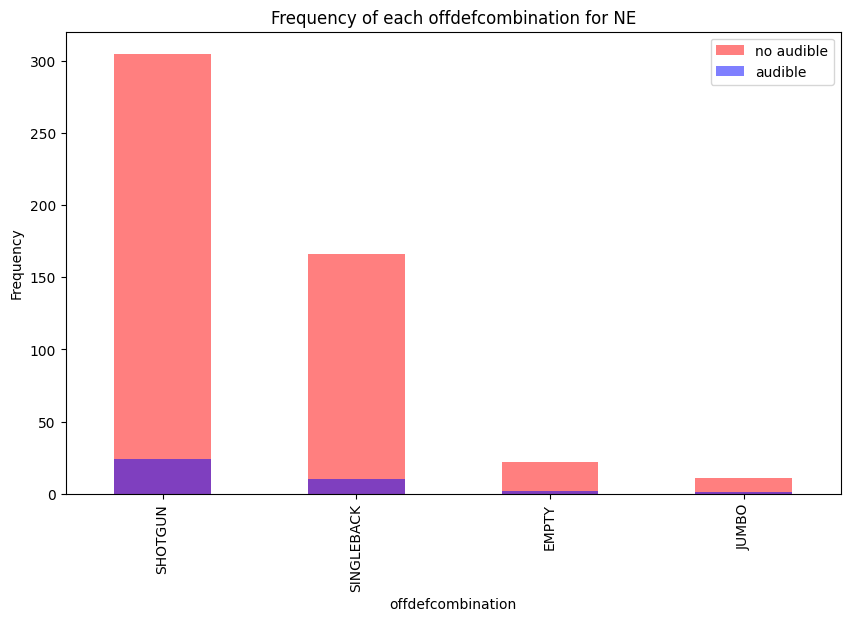

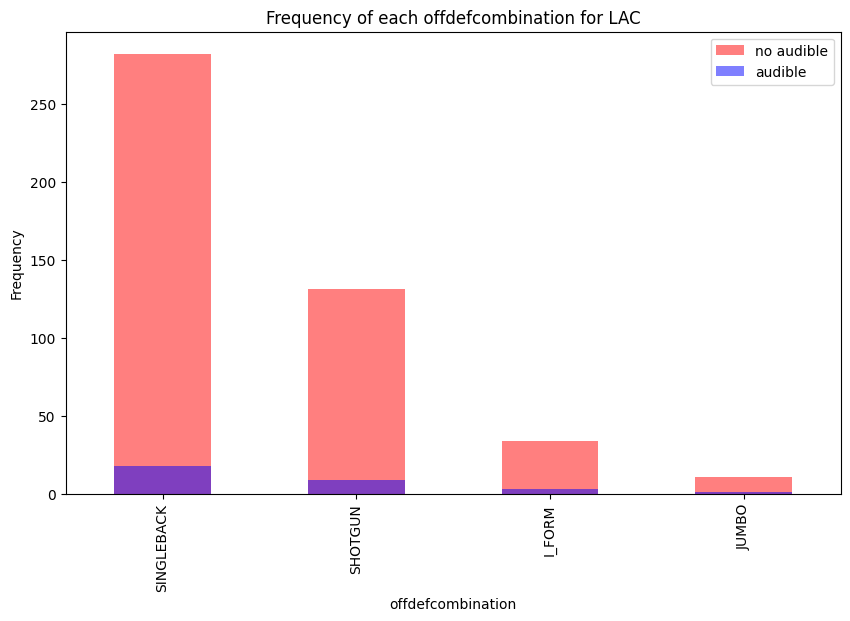

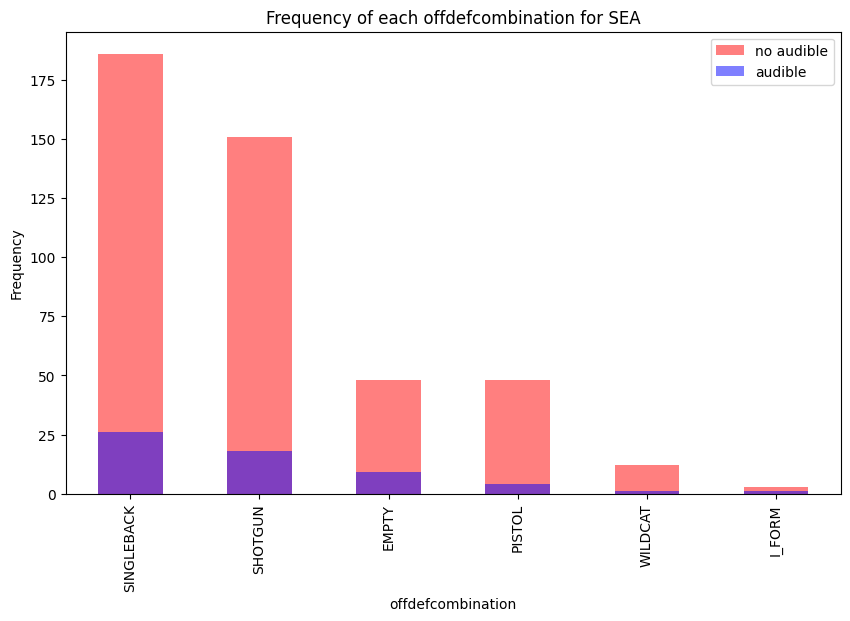

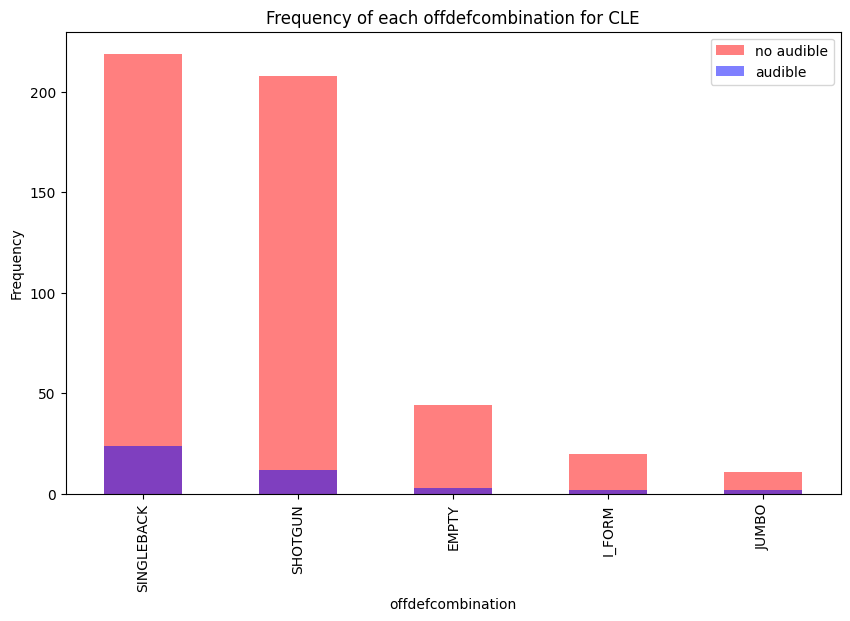

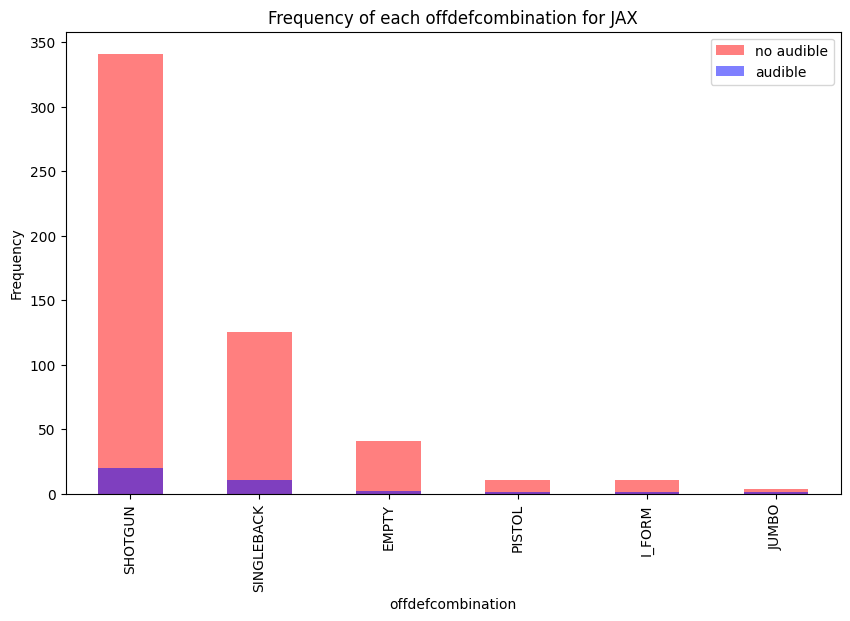

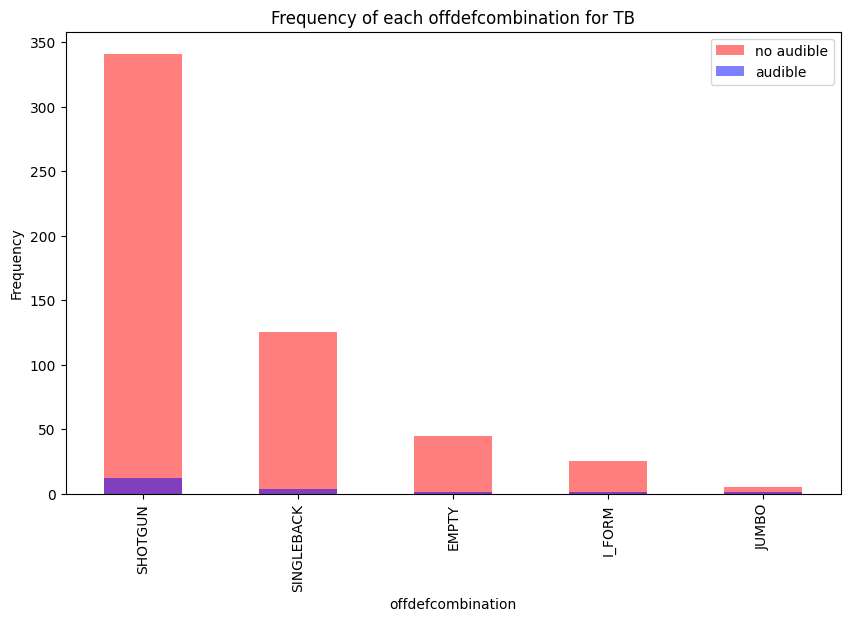

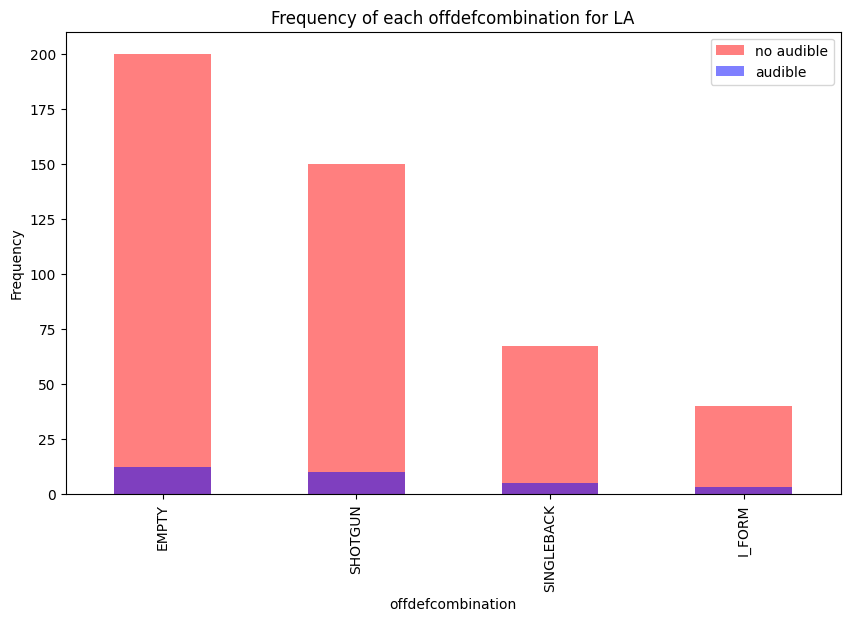

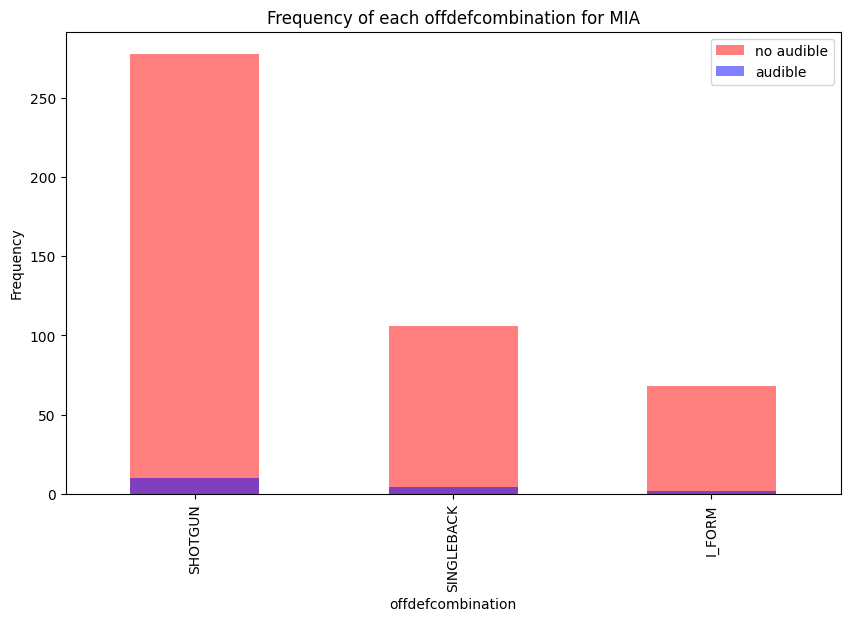

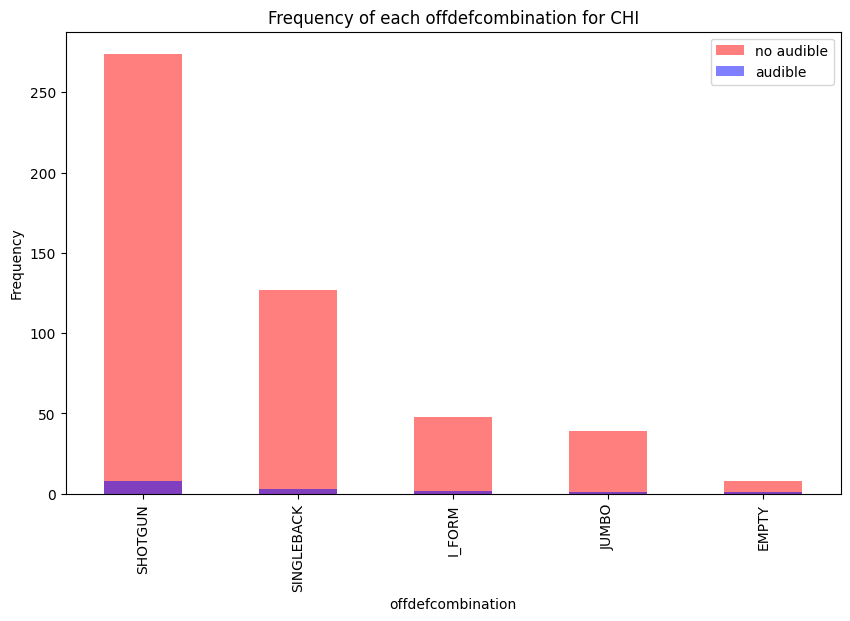

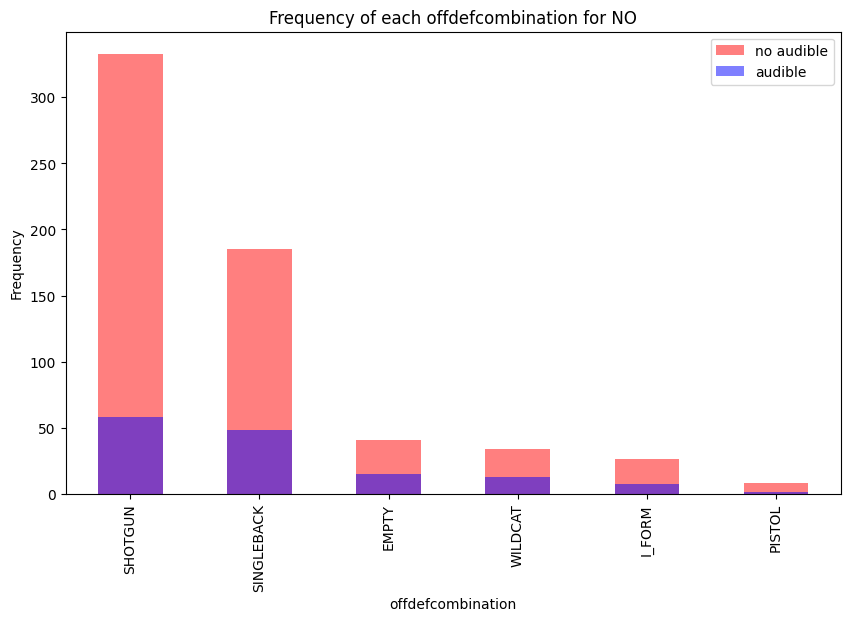

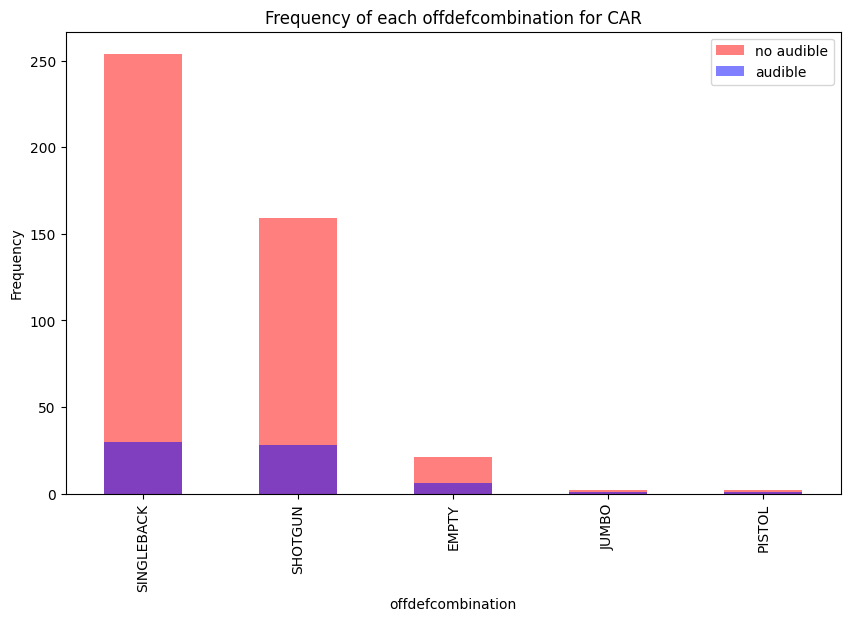

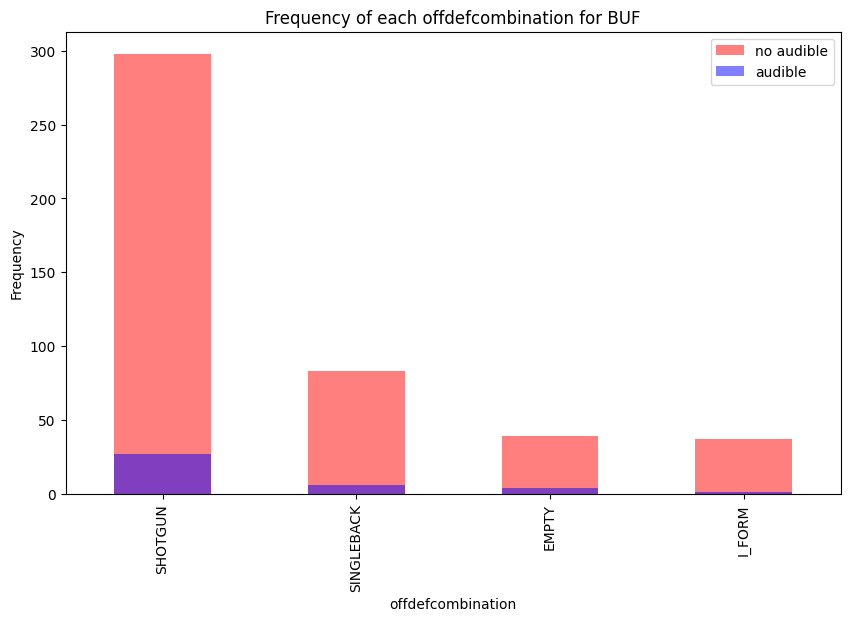

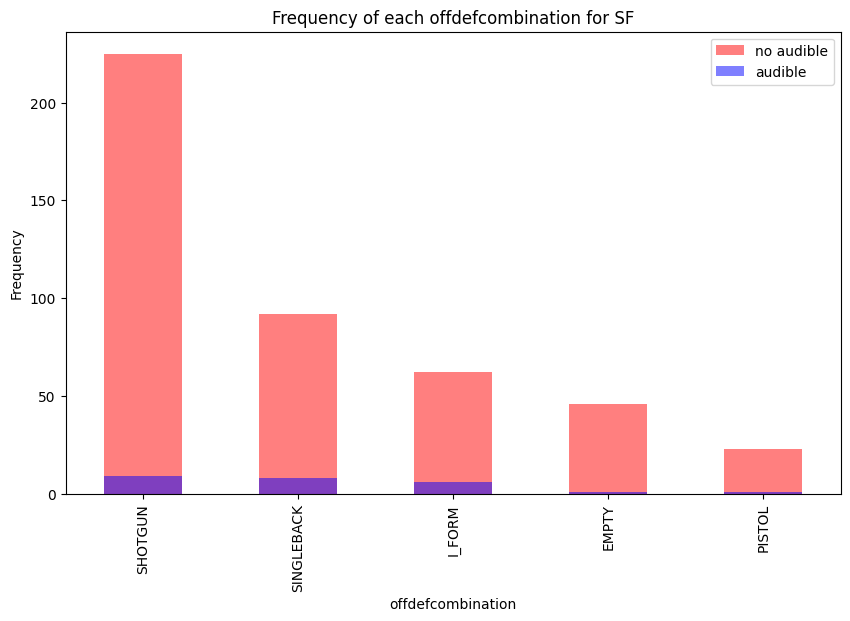

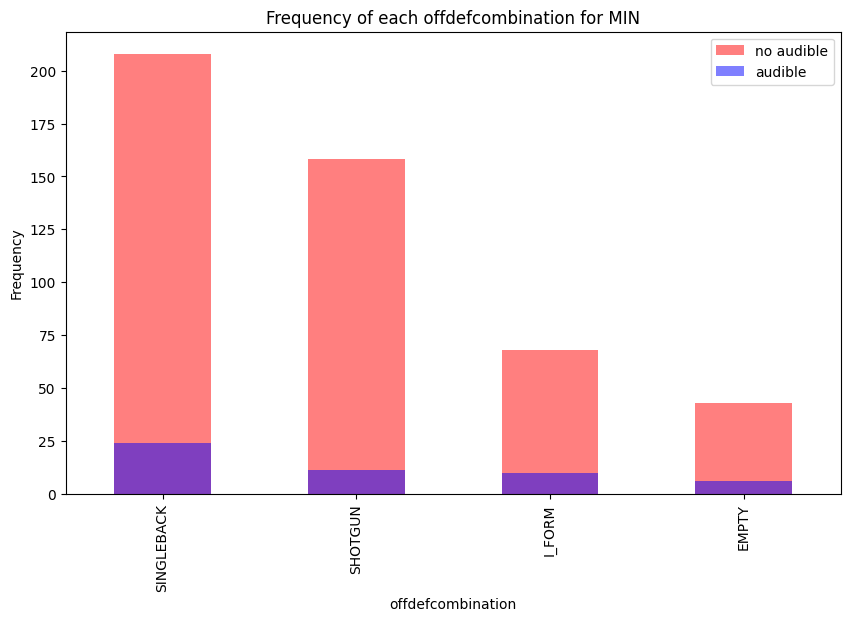

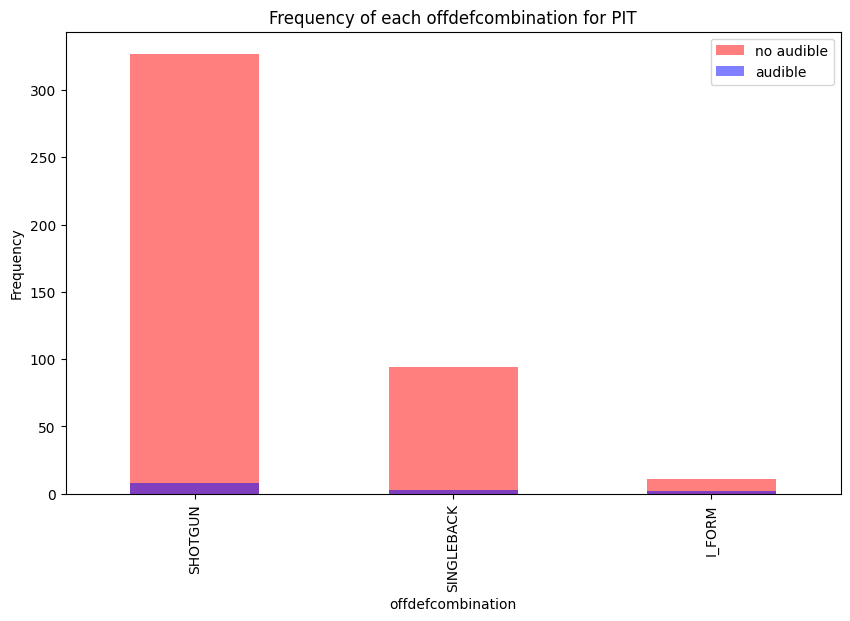

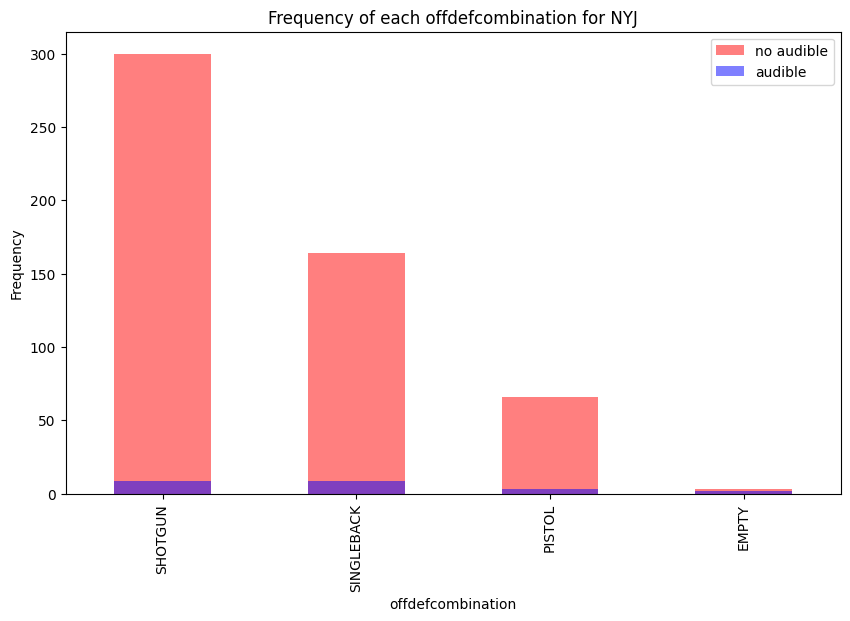

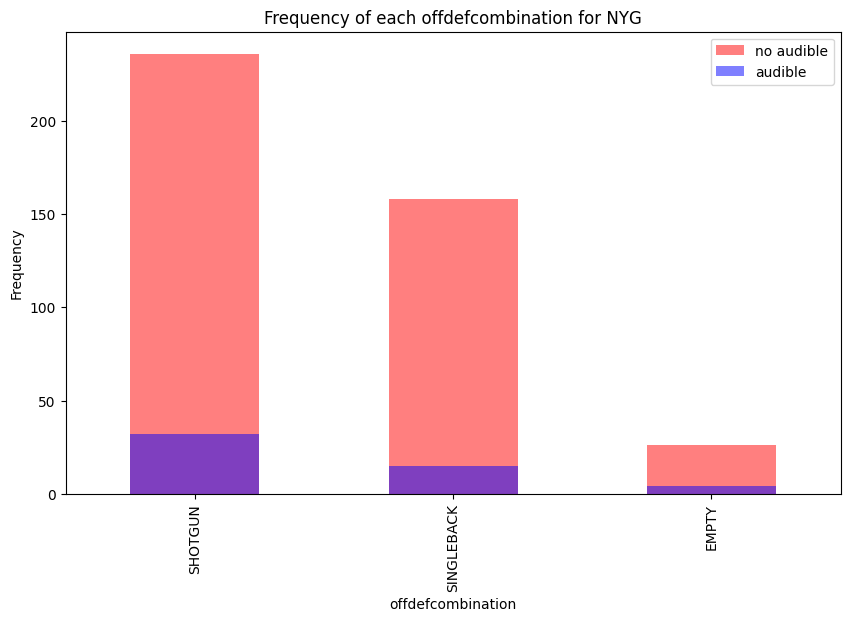

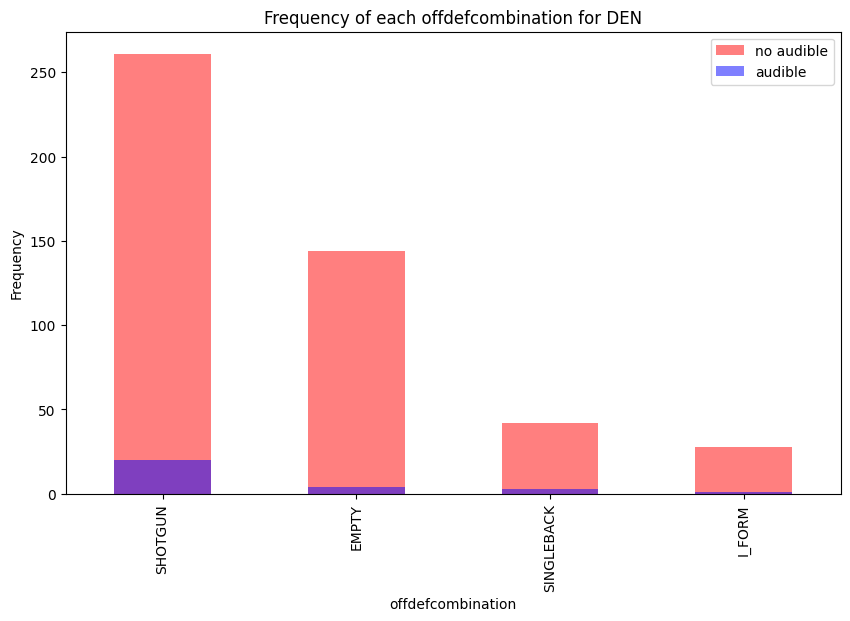

In [298]:
# Calculate average yards gained for each offdefcombination when audible is called for each team
avg_yards_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 1].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()

# Calculate average yards gained for each offdefcombination when audible is not called for each team
avg_yards_no_audible_team = plays_audible_data[plays_audible_data['is_audible'] == 0].groupby(['offdefcombination', 'possessionTeam'])['yardsGained'].mean()





#graph the average yards for 10 most common offdefcombinations for each team
for team in plays_audible_data['possessionTeam'].unique():
    audible_counts = plays_audible_data[(plays_audible_data['possessionTeam'] == team) & (plays_audible_data['is_audible'] == 1)]['offdefcombination'].value_counts().head(10)
    offdefcombination_counts = plays_audible_data[plays_audible_data['offdefcombination'].isin(audible_counts.index) & (plays_audible_data['possessionTeam'] == team)]['offdefcombination'].value_counts().head(10)

    #graph frequency of each offdefcombination with and without audibles
    plt.figure(figsize=(10, 6))
    offdefcombination_counts.plot(kind='bar', alpha=0.5, label='no audible', color='red')
    audible_counts.plot(kind='bar', alpha=0.5, label='audible', color='blue')
    plt.xlabel('offdefcombination')
    plt.ylabel('Frequency')
    plt.title('Frequency of each offdefcombination for ' + team)
    plt.legend(loc='upper right')
    plt.show()

 

    

In [299]:
#merge with player_play data to find target reciever
#plays_audible_data = pd.merge(plays_audible_data, player_play_data, on=['gameId', 'playId'], how='left')


#drop all rows with 'wasTargetedReceiver' == False
#plays_audible_data = plays_audible_data[plays_audible_data['wasTargettedReceiver'].isin([True,np.nan])]

#plays_audible_data.head()

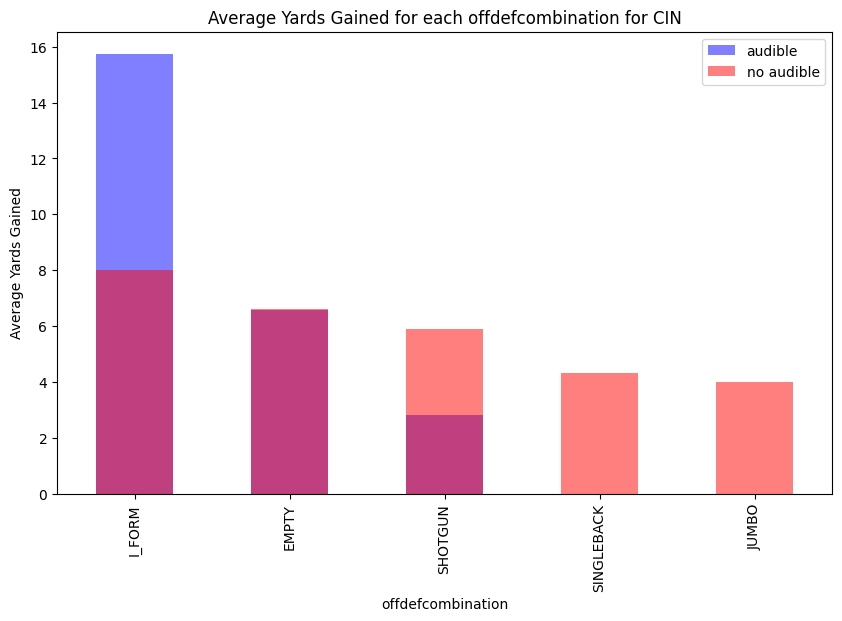

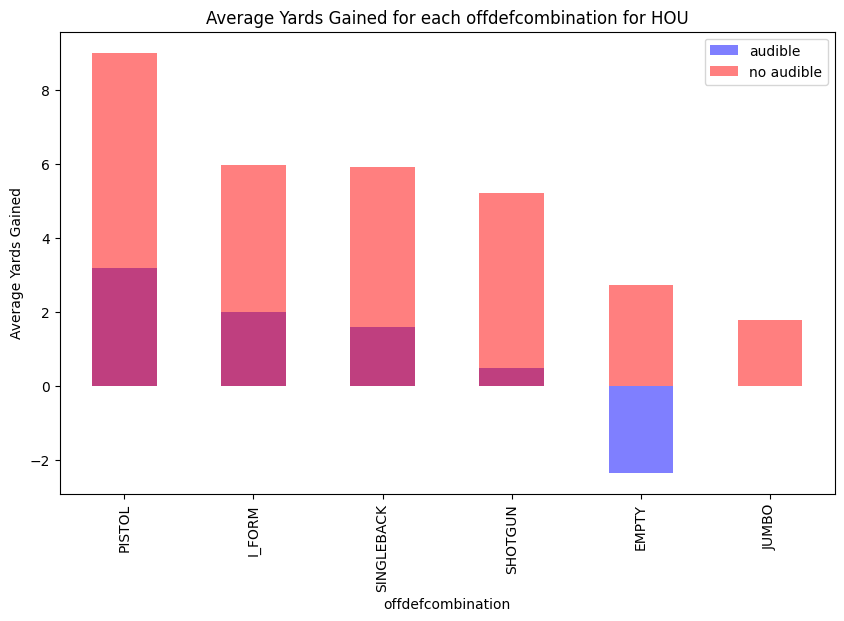

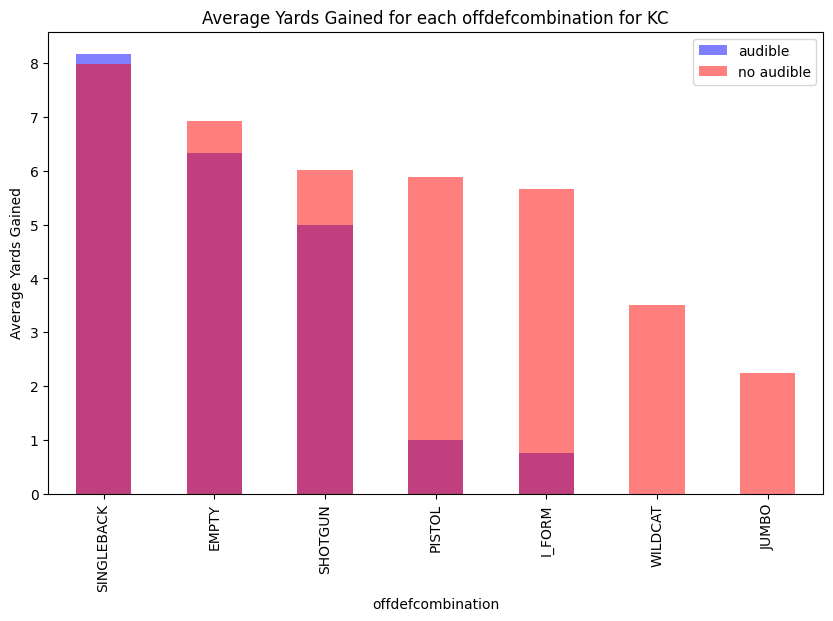

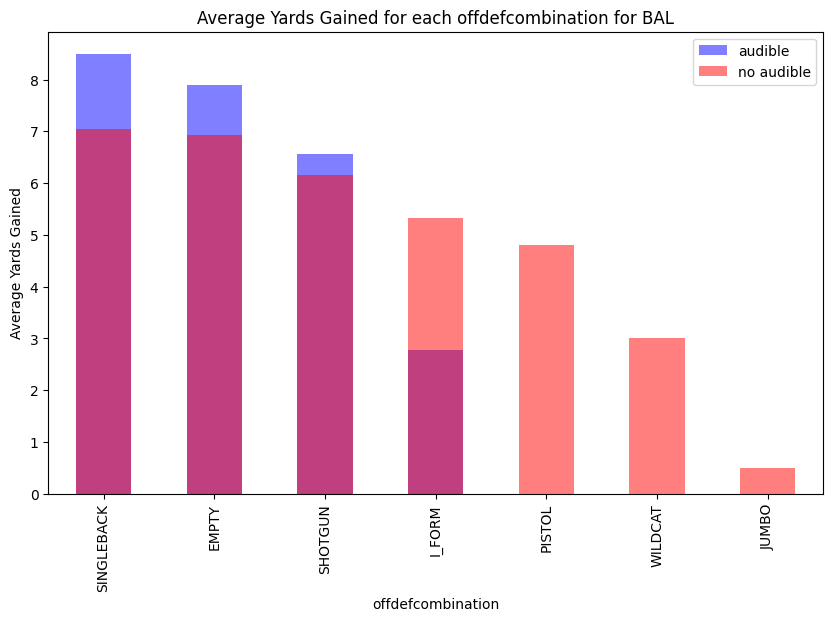

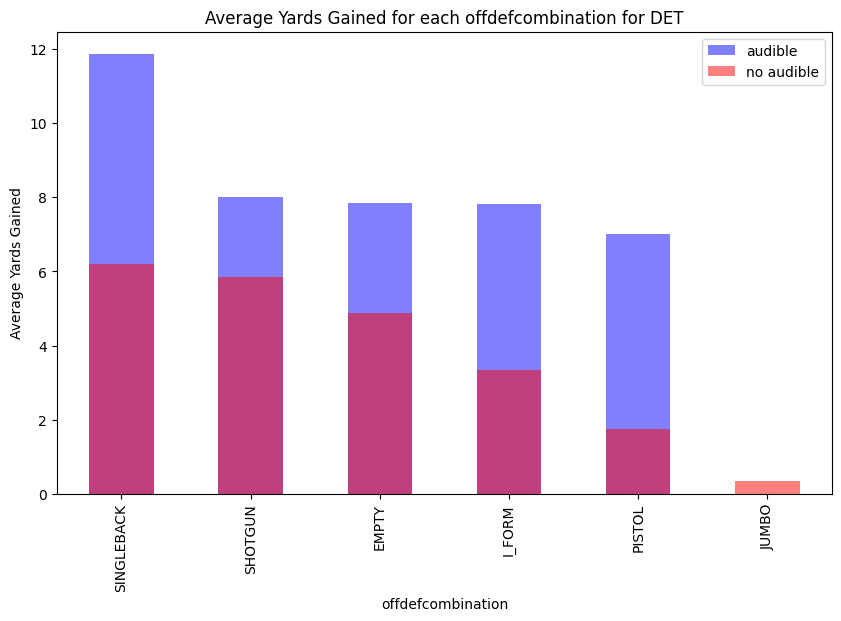

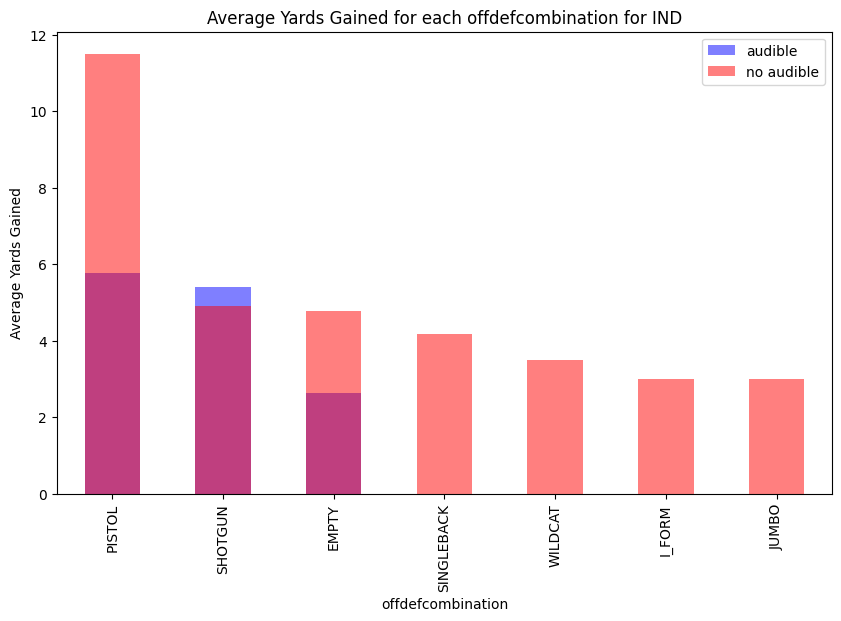

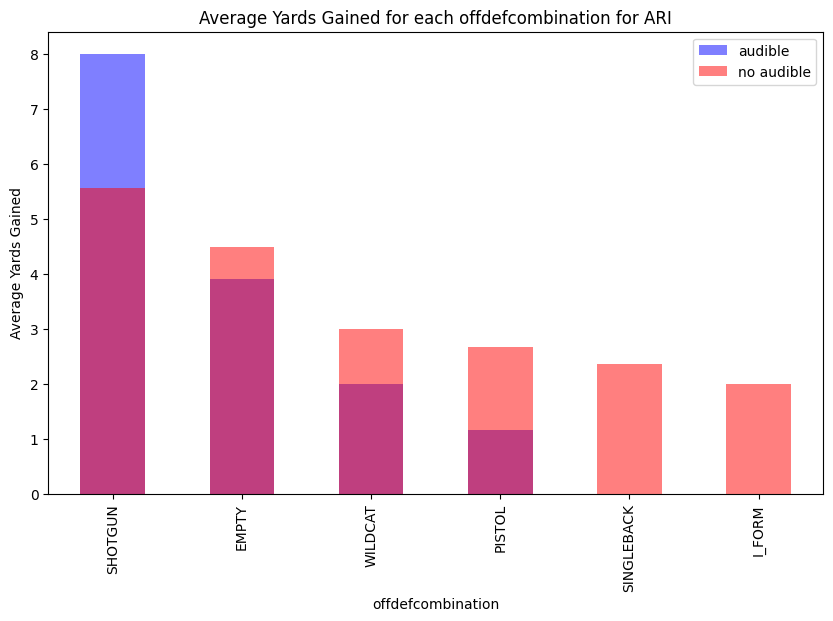

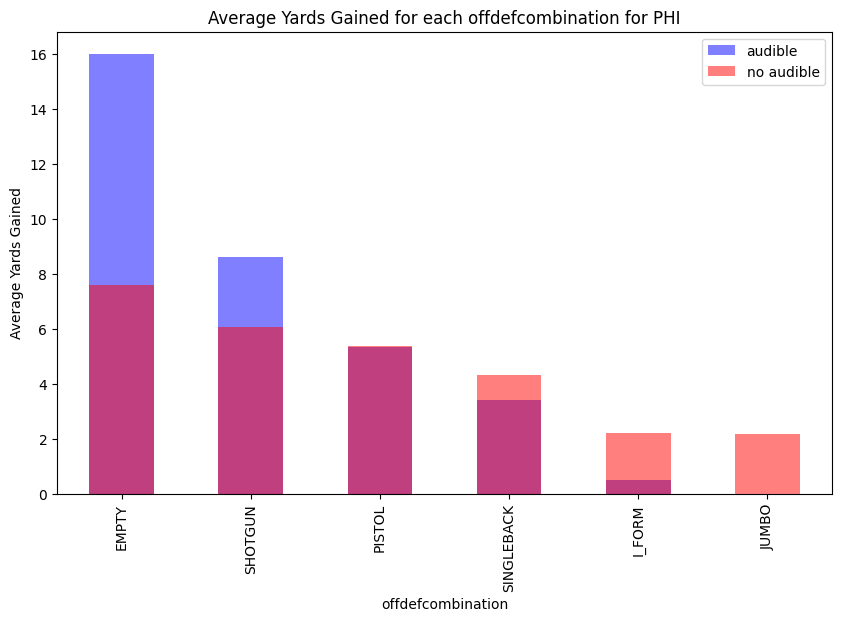

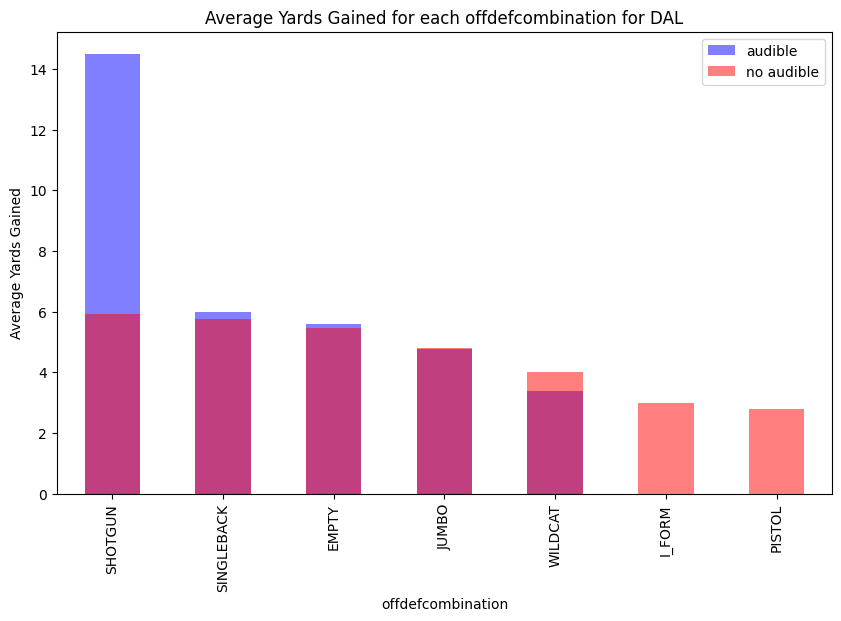

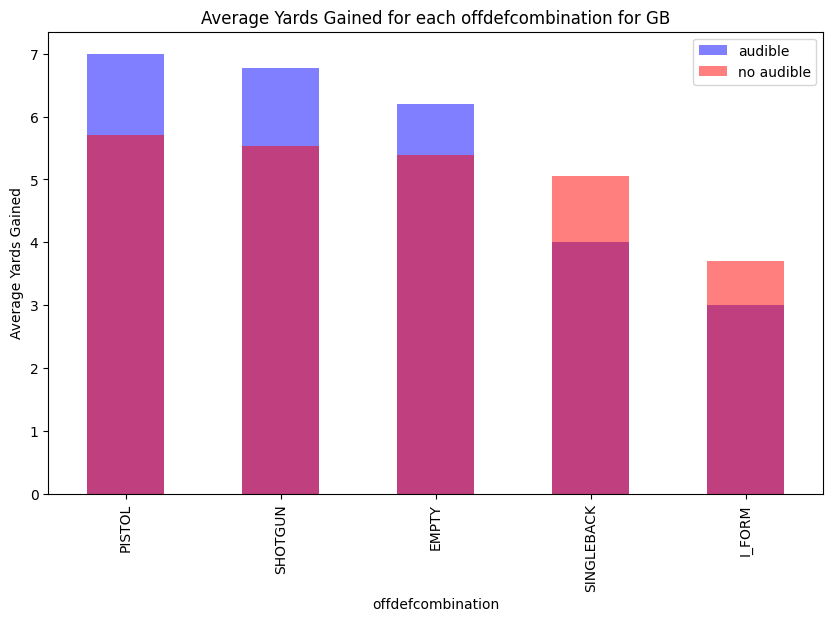

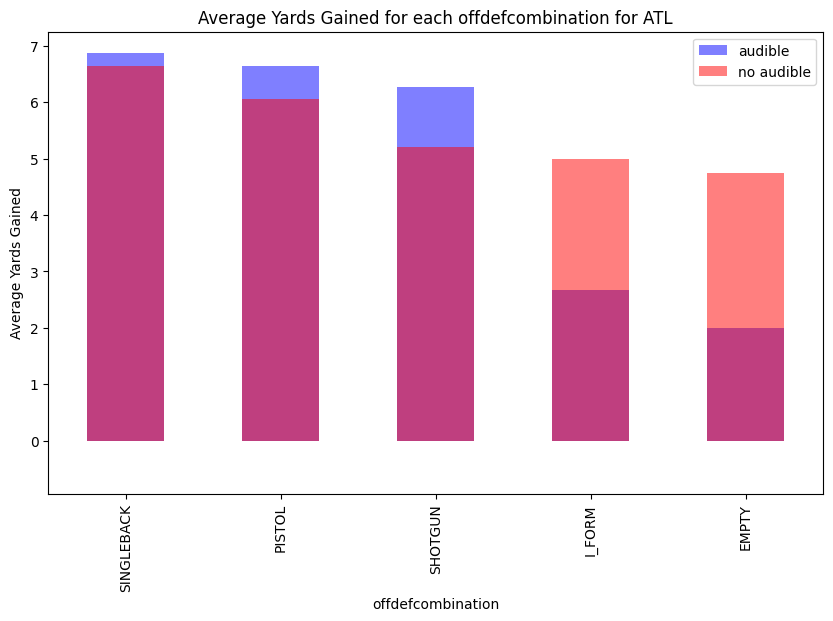

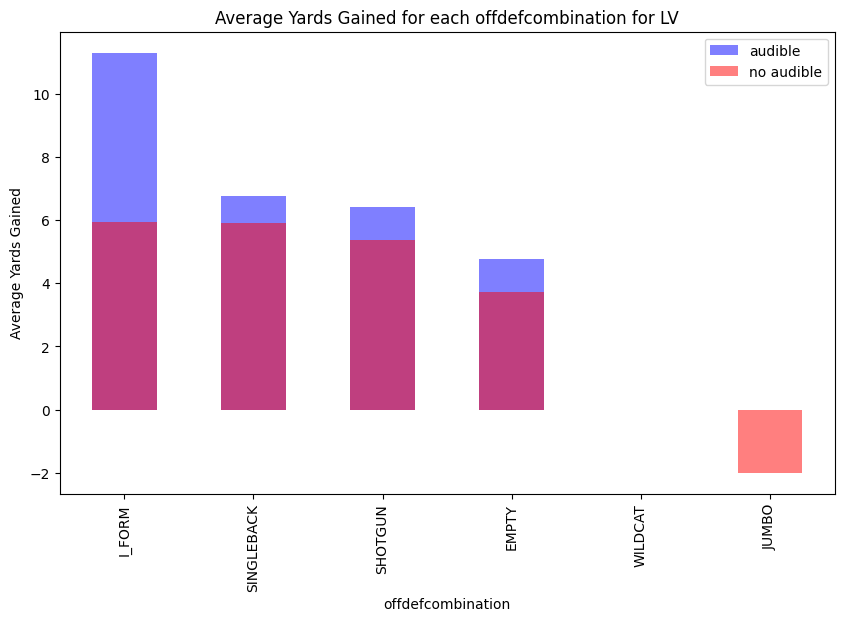

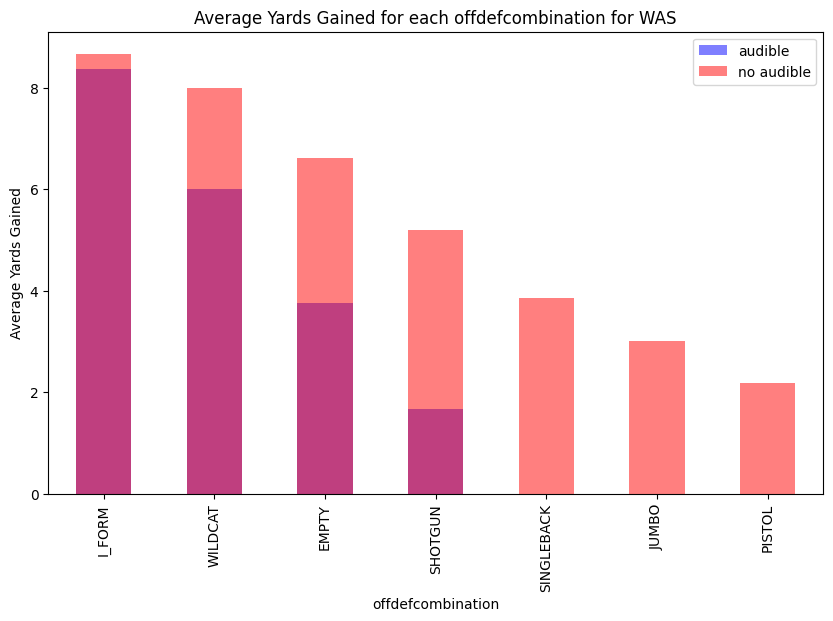

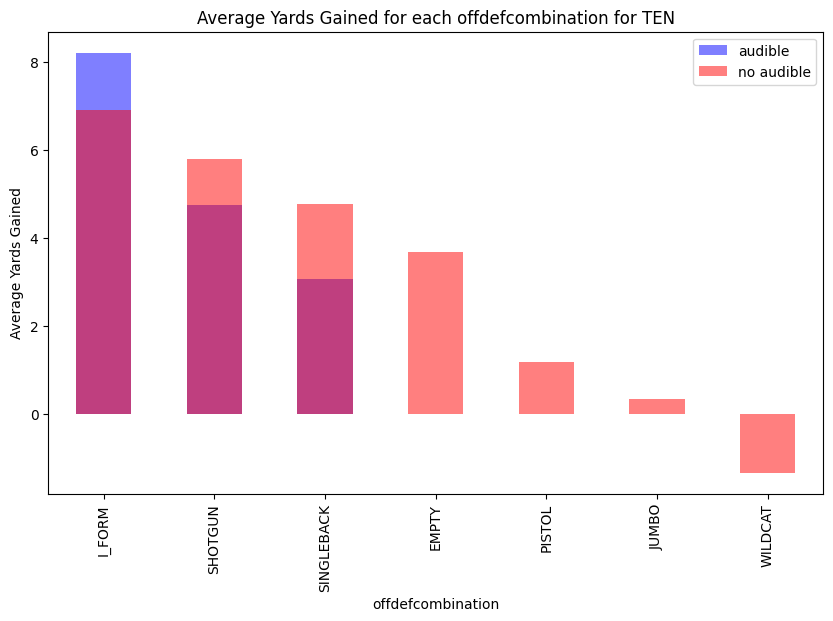

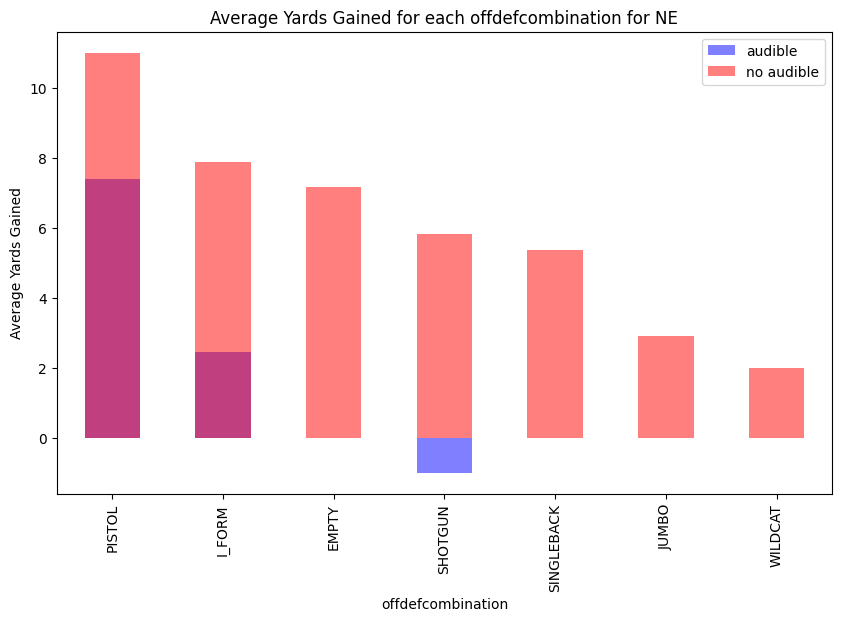

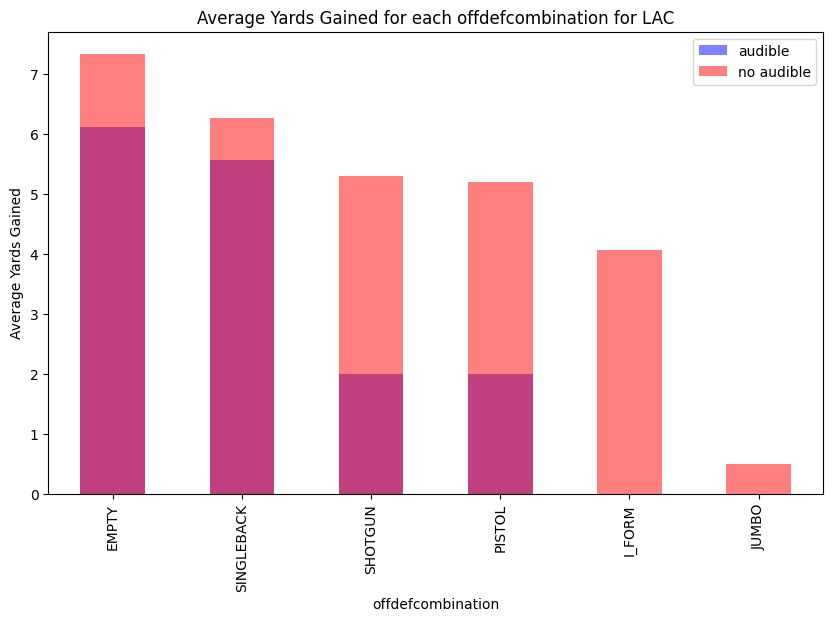

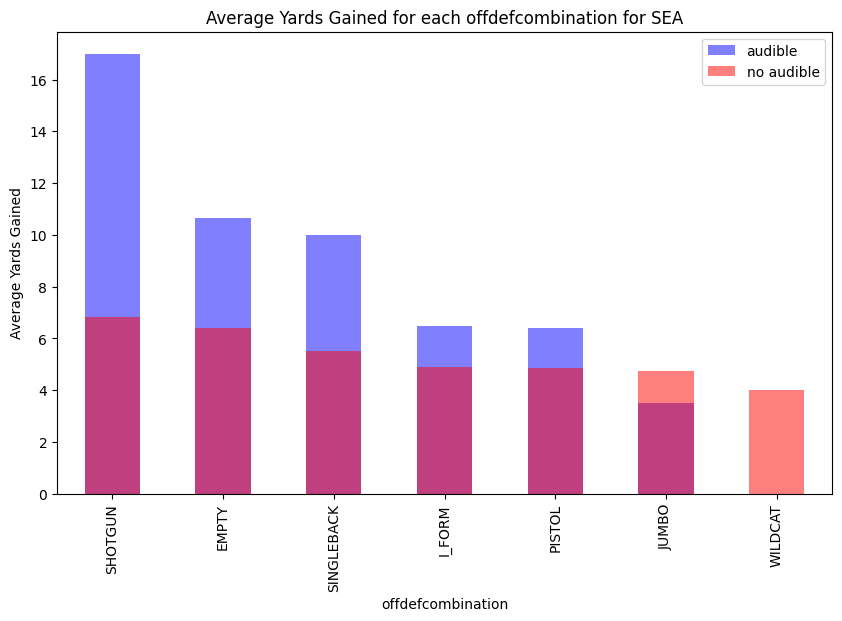

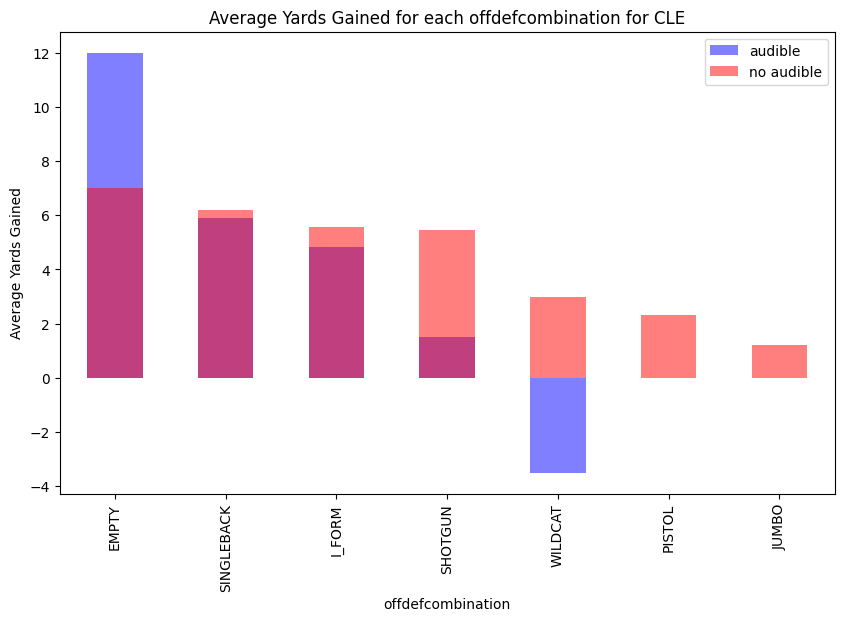

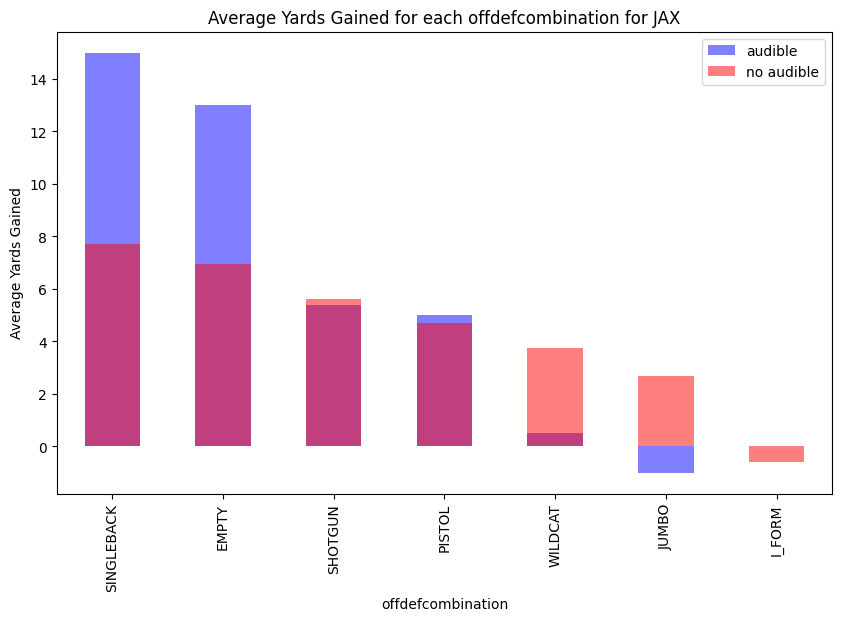

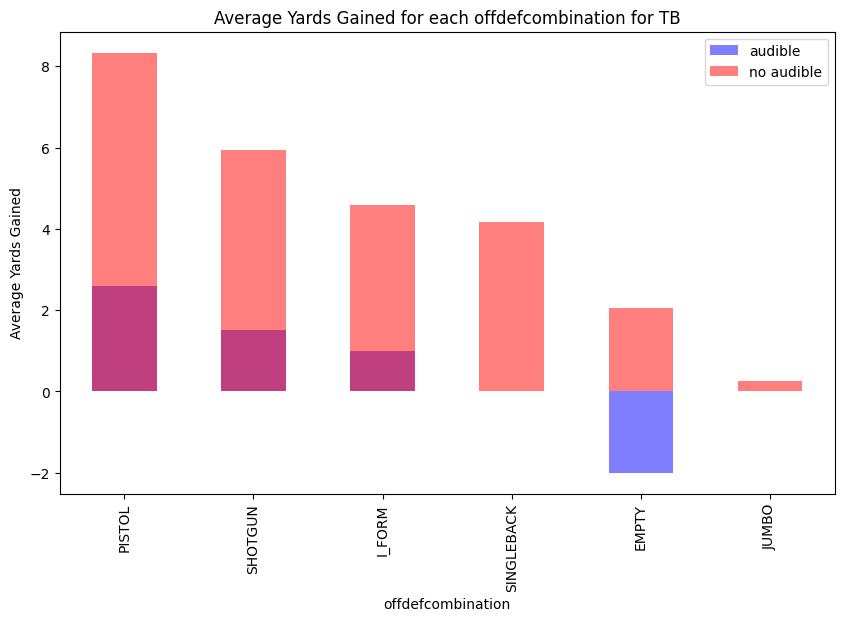

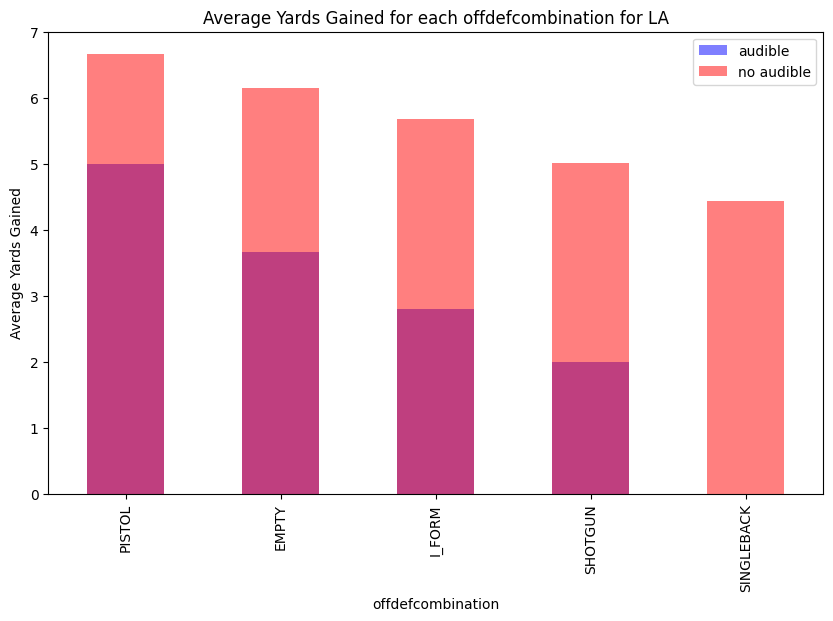

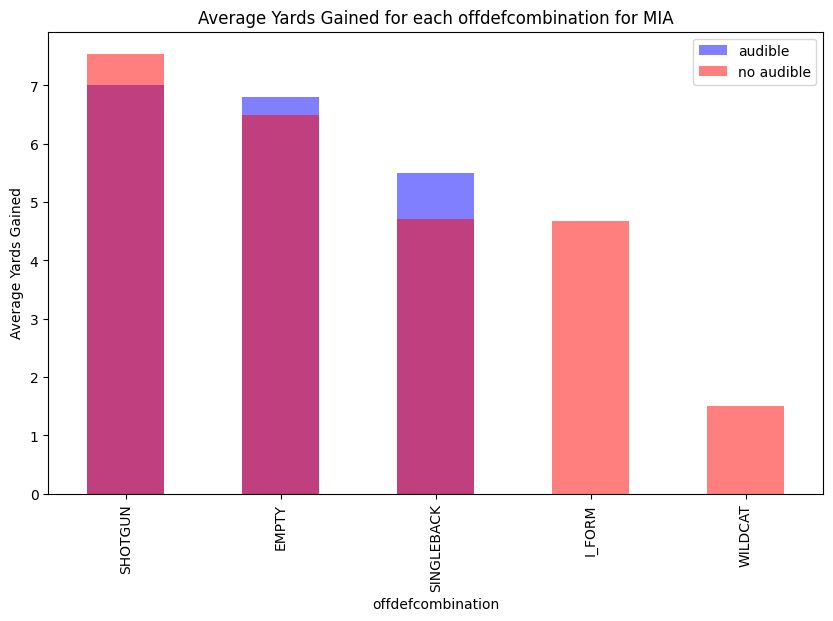

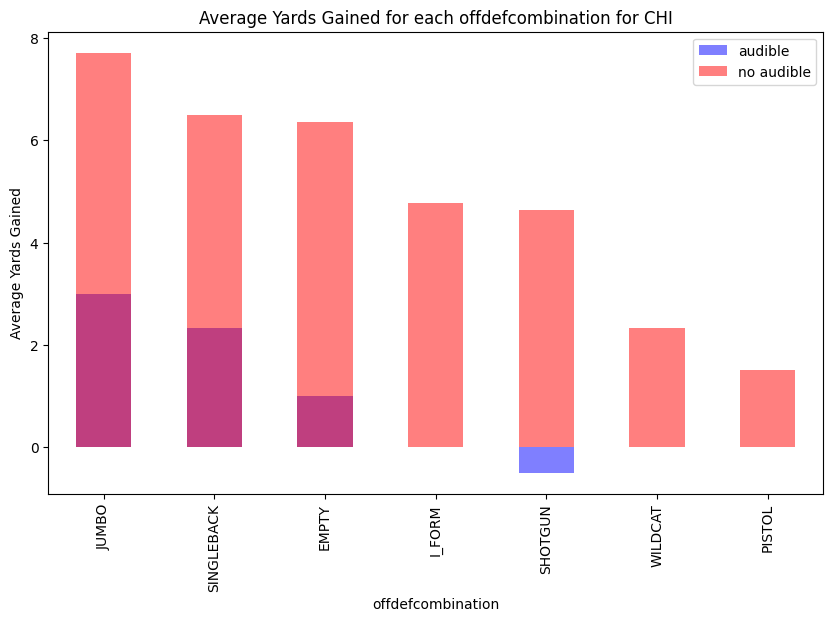

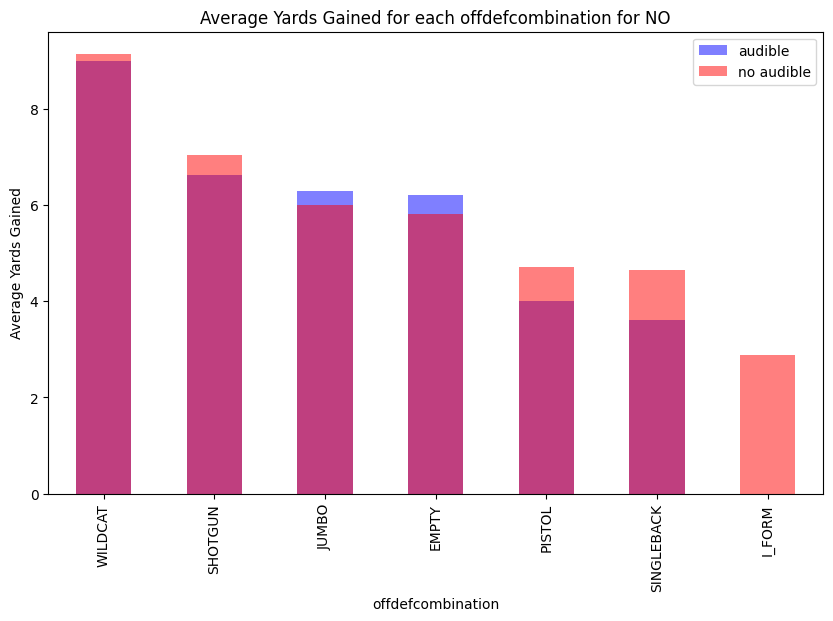

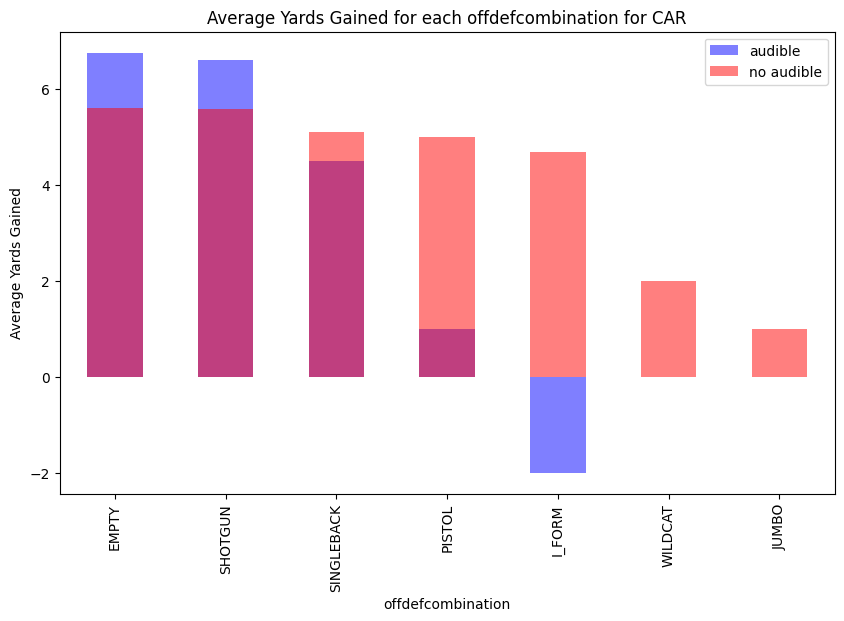

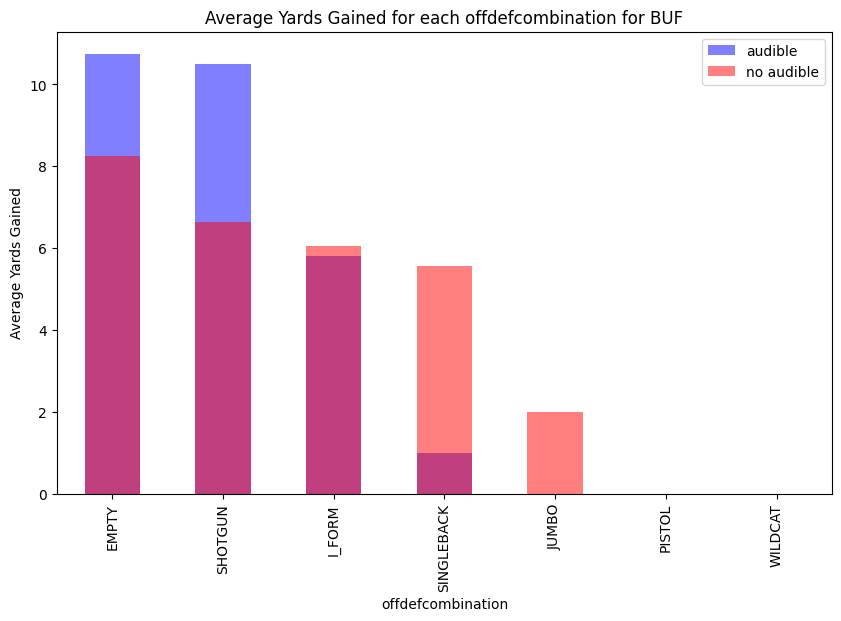

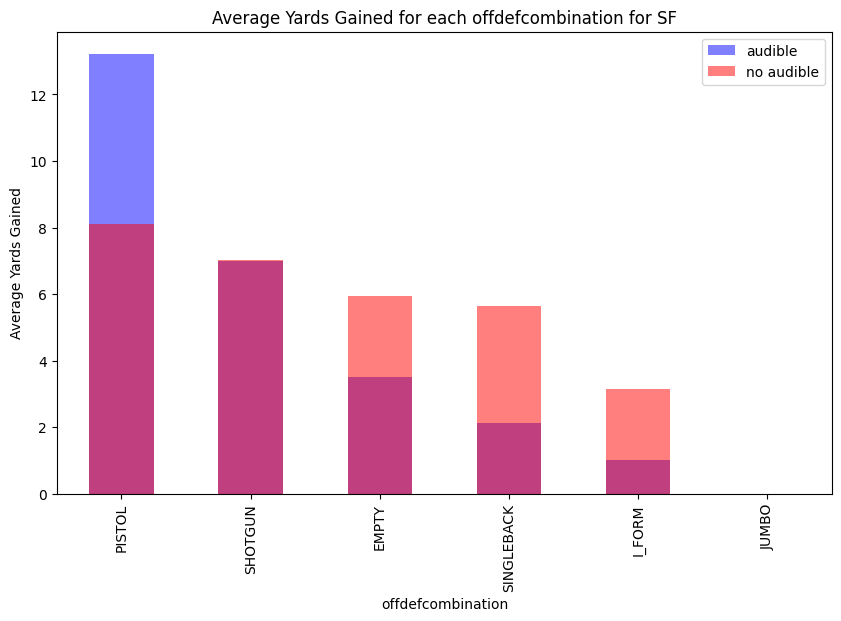

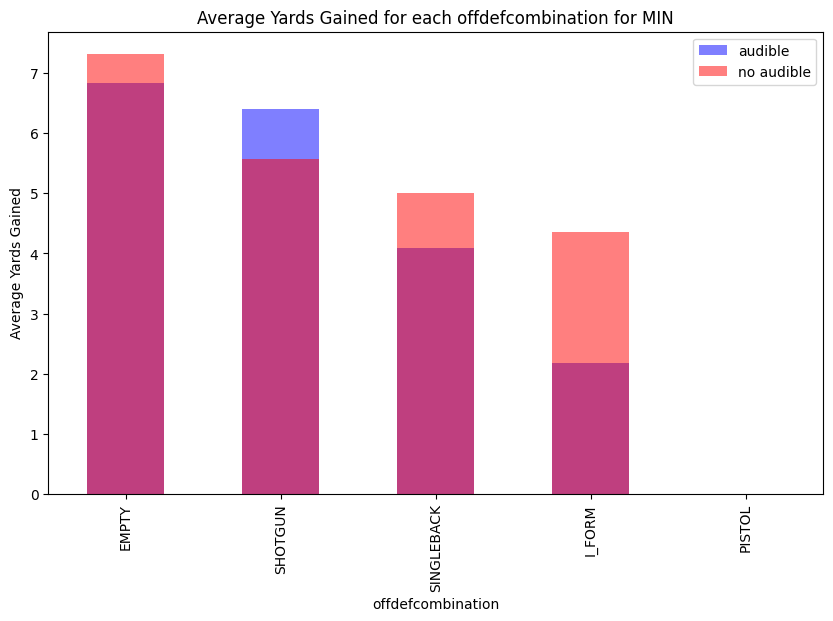

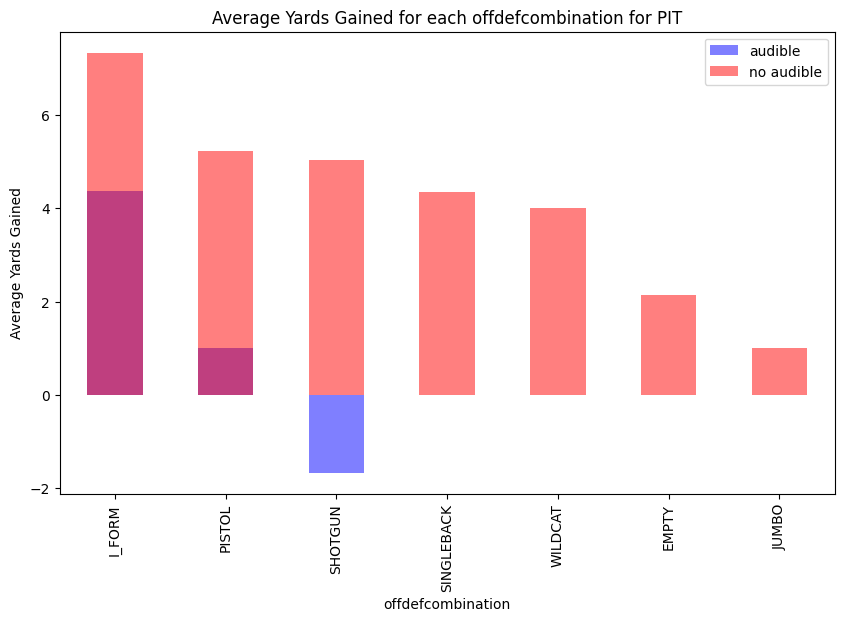

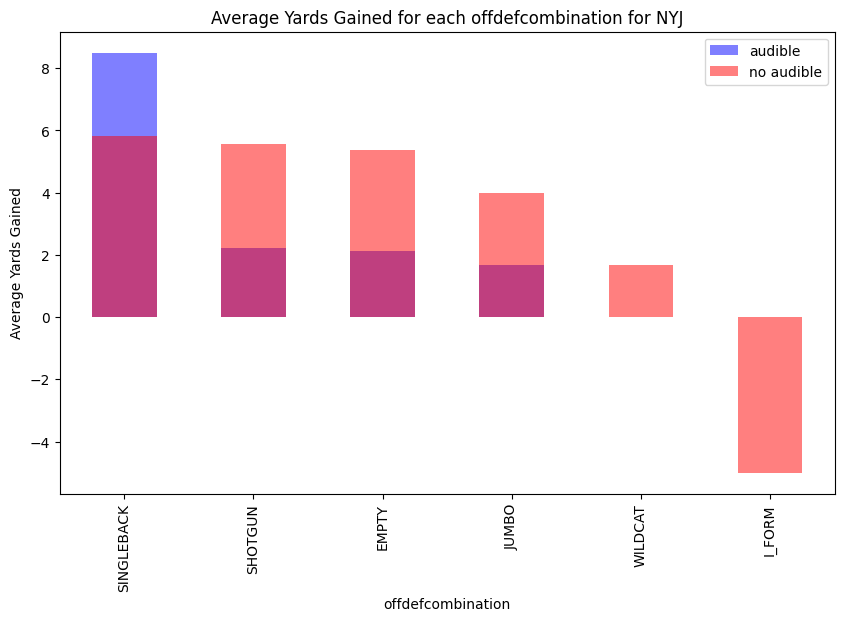

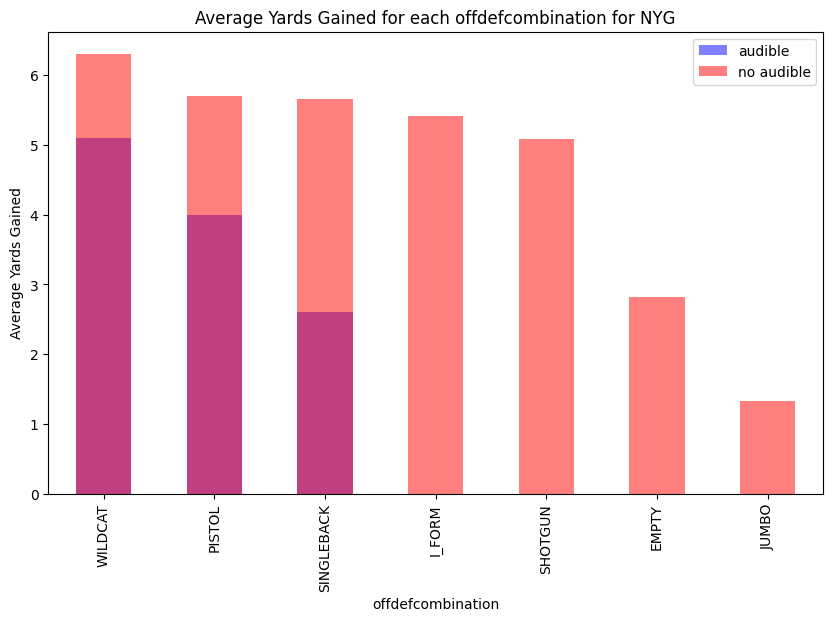

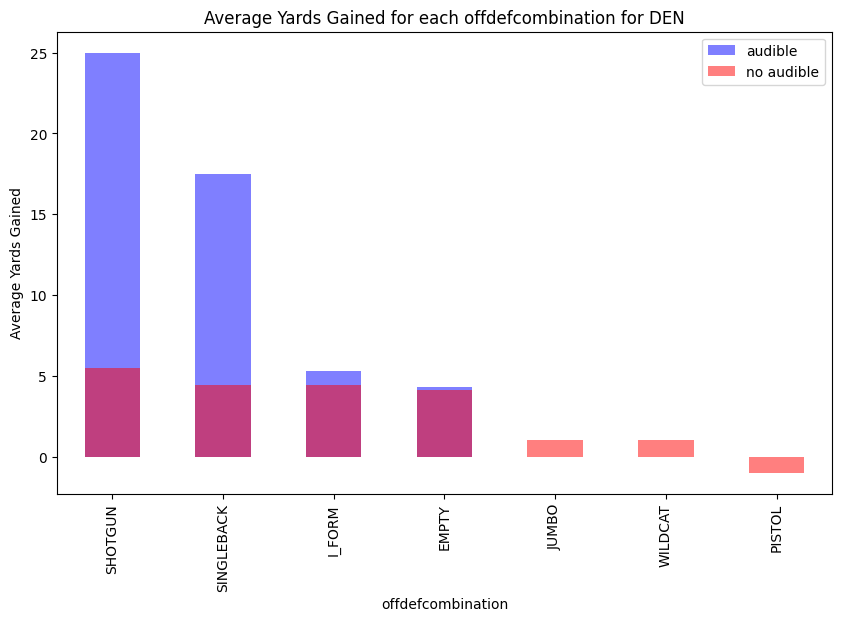

In [300]:
#graph the average yards for the 10 most common offdefcombinations for each team
for team in plays_audible_data['possessionTeam'].unique():
    avg_yards_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 1) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()
    avg_yards_no_audible_team = plays_audible_data[(plays_audible_data['is_audible'] == 0) & (plays_audible_data['possessionTeam'] == team)].groupby('offdefcombination')['yardsGained'].mean()

    # Sort by average yards gained
    avg_yards_audible_team = avg_yards_audible_team.sort_values(ascending=False)
    avg_yards_no_audible_team = avg_yards_no_audible_team.sort_values(ascending=False)

    # Graph average yards gained for each offdefcombination
    plt.figure(figsize=(10, 6))
    avg_yards_audible_team.head(10).plot(kind='bar', alpha=0.5, label='audible', color='blue')
    avg_yards_no_audible_team.head(10).plot(kind='bar', alpha=0.5, label='no audible', color='red')
    plt.xlabel('offdefcombination')
    plt.ylabel('Average Yards Gained')
    plt.title('Average Yards Gained for each offdefcombination for ' + team)
    plt.legend(loc='upper right')
    plt.show()

In [301]:
##Single Team single combination anlysis

Team_audible_data = plays_audible_data[plays_audible_data['possessionTeam'] == 'KC']

single_combination = Team_audible_data[Team_audible_data['offdefcombination'] == 'SINGLEBACK']




#print offdefcombination name
print(Team_audible_data['gameId'].unique())
print(single_combination['offdefcombination'].unique())

#print is_dropback distribution for single combination
print(single_combination['isDropback'].value_counts())

result = single_combination[['gameId', 'playId', 'quarter','yardsGained','defensiveTeam', 'gameClock','deffensiveFomrationFull','is_audible', 'isDropback', 'rushLocationType','pff_runConceptPrimary','pff_runConceptSecondary' ,'playDescription',]]

#sort result by is_audible and isDropback
result = result.sort_values(['is_audible', 'isDropback'])

#only keep 3 columns ['isDropback', 'is_audible', 'rushLocationType']
result = result[[ 'is_audible','gameId', 'playId', 'yardsGained','quarter', 'gameClock', 'deffensiveFomrationFull','isDropback','rushLocationType', 'pff_runConceptPrimary','pff_runConceptSecondary']]

#convert isDropback to string run or pass
result['isDropback'] = result['isDropback'].replace({False: 'run', True: 'pass'})

#drop rows where is_auudible is 0
result = result[result['is_audible'] == 1]

#drop is_audible column
result = result.drop('is_audible', axis=1)

display(result)

#save data to csv
result.to_csv('BAL_PISTOL5_audible_data.csv')


[2022110610 2022101610 2022101000 2022100213 2022091110 2022102310
 2022092502 2022091500]
['SINGLEBACK']
isDropback
False    37
True     16
Name: count, dtype: int64


gameId  playId  yardsGained  quarter gameClock  \
996    2022091110    3797           22        4     04:24   
5490   2022091110    3879           -2        4     02:08   
8466   2022092502    2358            1        3     09:21   
8984   2022091110    3423           19        4     10:02   
13135  2022092502    2196            4        3     12:35   
14599  2022091110     102            7        1     13:52   
15157  2022102310    3586            3        4     10:48   
3042   2022091500    2685            0        3     03:59   
13712  2022091110     195            3        1     11:54   

      deffensiveFomrationFull isDropback rushLocationType  \
996                       541        run     INSIDE_RIGHT   
5490                      703        run      INSIDE_LEFT   
8466                      441        run     OUTSIDE_LEFT   
8984                      440        run      INSIDE_LEFT   
13135                     442        run     OUTSIDE_LEFT   
14599                     432        run      INSIDE_LEFT   
15157                     430        run     OUTSIDE_LEFT   
3042                      233       pass              NaN   
13712                     433       pass              NaN   

      pff_runConceptPrimary pff_runConceptSecondary  
996                 COUNTER              CROSS LEAD  
5490           OUTSIDE ZONE                     NaN  
8466            INSIDE ZONE                   SPLIT  
8984           OUTSIDE ZONE                     NaN  
13135          OUTSIDE ZONE                     NaN  
14599               COUNTER              CROSS LEAD  
15157                 TRICK                     NaN  
3042           OUTSIDE ZONE                     NaN  
13712                 TRICK                     NaN

In [302]:
##Single Team single combination anlysis

Team_audible_data = plays_audible_data[plays_audible_data['possessionTeam'] == 'BAL']

single_combination = Team_audible_data[Team_audible_data['offdefcombination'] == 'PISTOL5']




#print offdefcombination name
print(Team_audible_data['gameId'].unique())
print(single_combination['offdefcombination'].unique())

#print is_dropback distribution for single combination
print(single_combination['isDropback'].value_counts())

result = single_combination[['gameId', 'playId', 'quarter','yardsGained','defensiveTeam','gameClock','deffensiveFomrationFull','is_audible', 'isDropback', 'rushLocationType','pff_runConceptPrimary','pff_runConceptSecondary' ,'playDescription',]]

#sort result by is_audible and isDropback
result = result.sort_values(['is_audible', 'isDropback'])

#only keep 3 columns ['isDropback', 'is_audible', 'rushLocationType']
result = result[[ 'is_audible','gameId', 'playId', 'yardsGained','quarter', 'gameClock', 'isDropback','rushLocationType', 'pff_runConceptPrimary','pff_runConceptSecondary']]

#convert isDropback to string run or pass
result['isDropback'] = result['isDropback'].replace({False: 'run', True: 'pass'})

#drop rows where is_auudible is 0
result = result[result['is_audible'] == 1]

#drop is_audible column
result = result.drop('is_audible', axis=1)

display(result)

#save data to csv
result.to_csv('BAL_PISTOL5_audible_data.csv')


[2022102700 2022100202 2022100913 2022091107 2022092505 2022091800
 2022101606 2022110700 2022102300]
[]
Series([], Name: count, dtype: int64)


Empty DataFrame
Columns: [gameId, playId, yardsGained, quarter, gameClock, isDropback, rushLocationType, pff_runConceptPrimary, pff_runConceptSecondary]
Index: []

In [303]:
##
for team in plays_audible_data['possessionTeam'].unique(): 
  
    Team_audible_data = plays_audible_data[plays_audible_data['possessionTeam'] == team]
    
    combinations = Team_audible_data['offdefcombination'].unique()
    for combination in combinations:
        single_combination = Team_audible_data[Team_audible_data['offdefcombination'] == combination]

        result = single_combination[['is_audible', 'isDropback', 'rushLocationType','pff_runConceptPrimary','pff_runConceptSecondary' ,'playDescription']]

        #sort result by is_audible and isDropback
        result = result.sort_values(['is_audible', 'isDropback'])

        # if length or result is greater than 1 and contains both audible values and the number of true is_audible is equal to number of isDropback true 
        if (result.shape[1] > 1 and len(result['is_audible'].unique()) > 1 ) and ( (result['is_audible'] == result['isDropback']).all() or ( result['is_audible'] != result['isDropback']).all()):
            print(team)
            print(combination)
            print(result)

            


        


PHI
I_FORM
       is_audible  isDropback rushLocationType pff_runConceptPrimary  \
47              0       False     INSIDE_RIGHT                 SNEAK   
2177            0       False      INSIDE_LEFT                 SNEAK   
6999            0       False    OUTSIDE_RIGHT             PULL LEAD   
11052           0       False      INSIDE_LEFT                 SNEAK   
16045           0       False      INSIDE_LEFT                 SNEAK   
12112           1        True              NaN             PULL LEAD   

      pff_runConceptSecondary  \
47                        NaN   
2177                      NaN   
6999                    PITCH   
11052                     NaN   
16045                     NaN   
12112                     NaN   

                                         playDescription  
47     (1:06) J.Hurts up the middle to DET 39 for 1 y...  
2177   (1:10) J.Hurts up the middle to JAX 10 for 2 y...  
6999   (15:00) M.Sanders right end pushed ob at PHI 4...  
11052  (1:36) J.